# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=10_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_final'


# Baseline

Lasketaan työllisyysasteet nykymallissa.

Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.984    |
| fps                | 1519     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0915   |
| total_tim

---------------------------------
| explained_variance | 0.989    |
| fps                | 2014     |
| nupdates           | 250      |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0938  |
| total_timesteps    | 603825   |
| value_loss         | 0.13     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2014     |
| nupdates           | 260      |
| policy_entropy     | 0.983    |
| policy_loss        | 0.149    |
| total_timesteps    | 628075   |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2013     |
| nupdates           | 270      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0583  |
| total_timesteps    | 652325   |
| value_loss         | 0.18     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2011     |
| nupdates           | 520      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0138  |
| total_timesteps    | 1258575  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2011     |
| nupdates           | 530      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.106   |
| total_timesteps    | 1282825  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2011     |
| nupdates           | 540      |
| policy_entropy     | 0.959    |
| policy_loss        | -0.0144  |
| total_timesteps    | 1307075  |
| value_loss         | 0.234    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2012     |
| nupdates           | 790      |
| policy_entropy     | 0.943    |
| policy_loss        | -0.137   |
| total_timesteps    | 1913325  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2012     |
| nupdates           | 800      |
| policy_entropy     | 0.916    |
| policy_loss        | 0.0596   |
| total_timesteps    | 1937575  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2012     |
| nupdates           | 810      |
| policy_entropy     | 0.963    |
| policy_loss        | -0.196   |
| total_timesteps    | 1961825  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2015     |
| nupdates           | 1060     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0774  |
| total_timesteps    | 2568075  |
| value_loss         | 0.447    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2015     |
| nupdates           | 1070     |
| policy_entropy     | 0.861    |
| policy_loss        | 0.0515   |
| total_timesteps    | 2592325  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2015     |
| nupdates           | 1080     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.109   |
| total_timesteps    | 2616575  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2020     |
| nupdates           | 1330     |
| policy_entropy     | 0.895    |
| policy_loss        | 0.000962 |
| total_timesteps    | 3222825  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2020     |
| nupdates           | 1340     |
| policy_entropy     | 0.832    |
| policy_loss        | 0.0595   |
| total_timesteps    | 3247075  |
| value_loss         | 0.114    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2020     |
| nupdates           | 1350     |
| policy_entropy     | 0.877    |
| policy_loss        | -0.049   |
| total_timesteps    | 3271325  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2024     |
| nupdates           | 1600     |
| policy_entropy     | 0.894    |
| policy_loss        | -0.0543  |
| total_timesteps    | 3877575  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2024     |
| nupdates           | 1610     |
| policy_entropy     | 0.88     |
| policy_loss        | 0.0814   |
| total_timesteps    | 3901825  |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2024     |
| nupdates           | 1620     |
| policy_entropy     | 0.908    |
| policy_loss        | 0.0649   |
| total_timesteps    | 3926075  |
| value_loss         | 0.187    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2027     |
| nupdates           | 1870     |
| policy_entropy     | 0.941    |
| policy_loss        | 0.000763 |
| total_timesteps    | 4532325  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2027     |
| nupdates           | 1880     |
| policy_entropy     | 0.913    |
| policy_loss        | 0.0439   |
| total_timesteps    | 4556575  |
| value_loss         | 0.193    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2027     |
| nupdates           | 1890     |
| policy_entropy     | 0.899    |
| policy_loss        | 0.0489   |
| total_timesteps    | 4580825  |
| value_loss         | 0.193    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2030     |
| nupdates           | 2140     |
| policy_entropy     | 0.977    |
| policy_loss        | 0.0903   |
| total_timesteps    | 5187075  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2030     |
| nupdates           | 2150     |
| policy_entropy     | 0.973    |
| policy_loss        | -0.1     |
| total_timesteps    | 5211325  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2030     |
| nupdates           | 2160     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0125   |
| total_timesteps    | 5235575  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2032     |
| nupdates           | 2410     |
| policy_entropy     | 1        |
| policy_loss        | 0.118    |
| total_timesteps    | 5841825  |
| value_loss         | 0.151    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2032     |
| nupdates           | 2420     |
| policy_entropy     | 0.926    |
| policy_loss        | -0.0491  |
| total_timesteps    | 5866075  |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2032     |
| nupdates           | 2430     |
| policy_entropy     | 0.864    |
| policy_loss        | 0.0783   |
| total_timesteps    | 5890325  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2032     |
| nupdates           | 2680     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0145  |
| total_timesteps    | 6496575  |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2032     |
| nupdates           | 2690     |
| policy_entropy     | 0.906    |
| policy_loss        | -0.0739  |
| total_timesteps    | 6520825  |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2032     |
| nupdates           | 2700     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.034   |
| total_timesteps    | 6545075  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2031     |
| nupdates           | 2950     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0306  |
| total_timesteps    | 7151325  |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2031     |
| nupdates           | 2960     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.0306  |
| total_timesteps    | 7175575  |
| value_loss         | 0.21     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2031     |
| nupdates           | 2970     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0978  |
| total_timesteps    | 7199825  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2027     |
| nupdates           | 3220     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0312  |
| total_timesteps    | 7806075  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2027     |
| nupdates           | 3230     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.15    |
| total_timesteps    | 7830325  |
| value_loss         | 0.507    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2026     |
| nupdates           | 3240     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0822  |
| total_timesteps    | 7854575  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2020     |
| nupdates           | 3490     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.046   |
| total_timesteps    | 8460825  |
| value_loss         | 0.229    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2020     |
| nupdates           | 3500     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.119   |
| total_timesteps    | 8485075  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2019     |
| nupdates           | 3510     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.0414  |
| total_timesteps    | 8509325  |
| value_loss         | 0.403    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2009     |
| nupdates           | 3760     |
| policy_entropy     | 1        |
| policy_loss        | -0.101   |
| total_timesteps    | 9115575  |
| value_loss         | 0.511    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2009     |
| nupdates           | 3770     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0245  |
| total_timesteps    | 9139825  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2008     |
| nupdates           | 3780     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0961  |
| total_timesteps    | 9164075  |
| value_loss         | 0.487    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1994     |
| nupdates           | 4030     |
| policy_entropy     | 1        |
| policy_loss        | -0.188   |
| total_timesteps    | 9770325  |
| value_loss         | 0.547    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1993     |
| nupdates           | 4040     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.00376  |
| total_timesteps    | 9794575  |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 1993     |
| nupdates           | 4050     |
| policy_entropy     | 0.943    |
| policy_loss        | 0.0383   |
| total_timesteps    | 9818825  |
| value_loss         | 0.127    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.982    |
| fps                | 1522     |
| nupdates           | 1        |
| policy_entropy     | 0.938    |
| policy_loss        | -0.00124 |
| total_timesteps    | 0        |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.919    |
| fps                | 2557     |
| nupdates           | 10       |
| policy_entropy     | 1.02     |
| policy_loss        | 0.773    |
| total_timesteps    | 21825    |
| value_loss         | 1.76     |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2238     |
| nupdates           | 20       |
| policy_entropy     | 0.972    |
| policy_loss        | -0.151   |
| total_timesteps    | 46075    |
| value_loss         | 0.523    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.979    |
| fps                | 2019     |
| nupdates           | 270      |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0912   |
| total_timesteps    | 652325   |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2019     |
| nupdates           | 280      |
| policy_entropy     | 0.938    |
| policy_loss        | 0.129    |
| total_timesteps    | 676575   |
| value_loss         | 0.115    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2018     |
| nupdates           | 290      |
| policy_entropy     | 0.926    |
| policy_loss        | -0.0334  |
| total_timesteps    | 700825   |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2016     |
| nupdates           | 540      |
| policy_entropy     | 0.92     |
| policy_loss        | -0.0316  |
| total_timesteps    | 1307075  |
| value_loss         | 0.166    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2016     |
| nupdates           | 550      |
| policy_entropy     | 0.941    |
| policy_loss        | -0.0362  |
| total_timesteps    | 1331325  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2016     |
| nupdates           | 560      |
| policy_entropy     | 0.931    |
| policy_loss        | 0.0755   |
| total_timesteps    | 1355575  |
| value_loss         | 0.0713   |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2018     |
| nupdates           | 810      |
| policy_entropy     | 0.861    |
| policy_loss        | -0.0332  |
| total_timesteps    | 1961825  |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2018     |
| nupdates           | 820      |
| policy_entropy     | 0.914    |
| policy_loss        | -0.0169  |
| total_timesteps    | 1986075  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2018     |
| nupdates           | 830      |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0355  |
| total_timesteps    | 2010325  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2020     |
| nupdates           | 1080     |
| policy_entropy     | 0.895    |
| policy_loss        | -0.117   |
| total_timesteps    | 2616575  |
| value_loss         | 0.439    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2020     |
| nupdates           | 1090     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0978  |
| total_timesteps    | 2640825  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2020     |
| nupdates           | 1100     |
| policy_entropy     | 0.862    |
| policy_loss        | 0.0831   |
| total_timesteps    | 2665075  |
| value_loss         | 0.14     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2023     |
| nupdates           | 1350     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.0598  |
| total_timesteps    | 3271325  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2023     |
| nupdates           | 1360     |
| policy_entropy     | 0.967    |
| policy_loss        | 0.0447   |
| total_timesteps    | 3295575  |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2024     |
| nupdates           | 1370     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0446  |
| total_timesteps    | 3319825  |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2027     |
| nupdates           | 1620     |
| policy_entropy     | 0.967    |
| policy_loss        | 0.0545   |
| total_timesteps    | 3926075  |
| value_loss         | 0.367    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2027     |
| nupdates           | 1630     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0907  |
| total_timesteps    | 3950325  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2027     |
| nupdates           | 1640     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.166   |
| total_timesteps    | 3974575  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2029     |
| nupdates           | 1890     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.129    |
| total_timesteps    | 4580825  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2029     |
| nupdates           | 1900     |
| policy_entropy     | 0.919    |
| policy_loss        | -0.147   |
| total_timesteps    | 4605075  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2029     |
| nupdates           | 1910     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0376   |
| total_timesteps    | 4629325  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2031     |
| nupdates           | 2160     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.139   |
| total_timesteps    | 5235575  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2031     |
| nupdates           | 2170     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.00237 |
| total_timesteps    | 5259825  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2031     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.017   |
| total_timesteps    | 5284075  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 2033     |
| nupdates           | 2430     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.168    |
| total_timesteps    | 5890325  |
| value_loss         | 0.127    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2033     |
| nupdates           | 2440     |
| policy_entropy     | 0.966    |
| policy_loss        | -0.173   |
| total_timesteps    | 5914575  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2033     |
| nupdates           | 2450     |
| policy_entropy     | 0.947    |
| policy_loss        | 0.0571   |
| total_timesteps    | 5938825  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 2033     |
| nupdates           | 2700     |
| policy_entropy     | 0.872    |
| policy_loss        | 0.0612   |
| total_timesteps    | 6545075  |
| value_loss         | 0.491    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2033     |
| nupdates           | 2710     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0691  |
| total_timesteps    | 6569325  |
| value_loss         | 0.314    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2033     |
| nupdates           | 2720     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.143   |
| total_timesteps    | 6593575  |
| value_loss         | 0.433    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2033     |
| nupdates           | 2970     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.113   |
| total_timesteps    | 7199825  |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2032     |
| nupdates           | 2980     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0317  |
| total_timesteps    | 7224075  |
| value_loss         | 0.57     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2032     |
| nupdates           | 2990     |
| policy_entropy     | 0.947    |
| policy_loss        | 0.0829   |
| total_timesteps    | 7248325  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2030     |
| nupdates           | 3240     |
| policy_entropy     | 1        |
| policy_loss        | 0.0334   |
| total_timesteps    | 7854575  |
| value_loss         | 0.237    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2030     |
| nupdates           | 3250     |
| policy_entropy     | 0.935    |
| policy_loss        | 0.0404   |
| total_timesteps    | 7878825  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2030     |
| nupdates           | 3260     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0679  |
| total_timesteps    | 7903075  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2025     |
| nupdates           | 3510     |
| policy_entropy     | 0.893    |
| policy_loss        | 0.0733   |
| total_timesteps    | 8509325  |
| value_loss         | 0.124    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2025     |
| nupdates           | 3520     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0613  |
| total_timesteps    | 8533575  |
| value_loss         | 0.163    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2025     |
| nupdates           | 3530     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.0356   |
| total_timesteps    | 8557825  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2017     |
| nupdates           | 3780     |
| policy_entropy     | 0.913    |
| policy_loss        | -0.0638  |
| total_timesteps    | 9164075  |
| value_loss         | 0.405    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2017     |
| nupdates           | 3790     |
| policy_entropy     | 0.939    |
| policy_loss        | -0.045   |
| total_timesteps    | 9188325  |
| value_loss         | 0.427    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2016     |
| nupdates           | 3800     |
| policy_entropy     | 0.886    |
| policy_loss        | 0.149    |
| total_timesteps    | 9212575  |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2005     |
| nupdates           | 4050     |
| policy_entropy     | 0.915    |
| policy_loss        | -0.0813  |
| total_timesteps    | 9818825  |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2004     |
| nupdates           | 4060     |
| policy_entropy     | 0.91     |
| policy_loss        | -0.025   |
| total_timesteps    | 9843075  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2004     |
| nupdates           | 4070     |
| policy_entropy     | 0.947    |
| policy_loss        | -0.062   |
| total_timesteps    | 9867325  |
| value_loss         | 0.48     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.977    |
| fps                | 1542     |
| nupdates           | 1        |
| policy_entropy     | 0.92     |
| policy_loss        | -0.102   |
| total_timesteps    | 0        |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 2563     |
| nupdates           | 10       |
| policy_entropy     | 0.8      |
| policy_loss        | 1.43     |
| total_timesteps    | 21825    |
| value_loss         | 4.02     |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 2234     |
| nupdates           | 20       |
| policy_entropy     | 0.757    |
| policy_loss        | -0.41    |
| total_timesteps    | 46075    |
| value_loss         | 1.11     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.988    |
| fps                | 2012     |
| nupdates           | 270      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0141  |
| total_timesteps    | 652325   |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2012     |
| nupdates           | 280      |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0542  |
| total_timesteps    | 676575   |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2012     |
| nupdates           | 290      |
| policy_entropy     | 0.976    |
| policy_loss        | -0.247   |
| total_timesteps    | 700825   |
| value_loss         | 0.656    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2010     |
| nupdates           | 540      |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0769  |
| total_timesteps    | 1307075  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2010     |
| nupdates           | 550      |
| policy_entropy     | 0.94     |
| policy_loss        | 0.000789 |
| total_timesteps    | 1331325  |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2010     |
| nupdates           | 560      |
| policy_entropy     | 0.938    |
| policy_loss        | 0.0434   |
| total_timesteps    | 1355575  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2012     |
| nupdates           | 810      |
| policy_entropy     | 0.845    |
| policy_loss        | 0.0748   |
| total_timesteps    | 1961825  |
| value_loss         | 0.118    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2012     |
| nupdates           | 820      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.163   |
| total_timesteps    | 1986075  |
| value_loss         | 0.459    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2012     |
| nupdates           | 830      |
| policy_entropy     | 0.921    |
| policy_loss        | -0.0656  |
| total_timesteps    | 2010325  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2016     |
| nupdates           | 1080     |
| policy_entropy     | 0.899    |
| policy_loss        | 0.0497   |
| total_timesteps    | 2616575  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2016     |
| nupdates           | 1090     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0462  |
| total_timesteps    | 2640825  |
| value_loss         | 0.333    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2016     |
| nupdates           | 1100     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.00218 |
| total_timesteps    | 2665075  |
| value_loss         | 0.169    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2020     |
| nupdates           | 1350     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.0446  |
| total_timesteps    | 3271325  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2020     |
| nupdates           | 1360     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0115  |
| total_timesteps    | 3295575  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2020     |
| nupdates           | 1370     |
| policy_entropy     | 0.963    |
| policy_loss        | 0.0156   |
| total_timesteps    | 3319825  |
| value_loss         | 0.145    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2024     |
| nupdates           | 1620     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.0141   |
| total_timesteps    | 3926075  |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2024     |
| nupdates           | 1630     |
| policy_entropy     | 0.901    |
| policy_loss        | 0.0914   |
| total_timesteps    | 3950325  |
| value_loss         | 0.218    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2025     |
| nupdates           | 1640     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0604  |
| total_timesteps    | 3974575  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2028     |
| nupdates           | 1890     |
| policy_entropy     | 1        |
| policy_loss        | -0.114   |
| total_timesteps    | 4580825  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2028     |
| nupdates           | 1900     |
| policy_entropy     | 0.964    |
| policy_loss        | 0.11     |
| total_timesteps    | 4605075  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2028     |
| nupdates           | 1910     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.017   |
| total_timesteps    | 4629325  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2031     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0275  |
| total_timesteps    | 5235575  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2031     |
| nupdates           | 2170     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.0236  |
| total_timesteps    | 5259825  |
| value_loss         | 0.379    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2031     |
| nupdates           | 2180     |
| policy_entropy     | 0.917    |
| policy_loss        | -0.0192  |
| total_timesteps    | 5284075  |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2033     |
| nupdates           | 2430     |
| policy_entropy     | 0.906    |
| policy_loss        | -0.12    |
| total_timesteps    | 5890325  |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2033     |
| nupdates           | 2440     |
| policy_entropy     | 0.866    |
| policy_loss        | 0.0102   |
| total_timesteps    | 5914575  |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2033     |
| nupdates           | 2450     |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0523   |
| total_timesteps    | 5938825  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2034     |
| nupdates           | 2700     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0456  |
| total_timesteps    | 6545075  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2034     |
| nupdates           | 2710     |
| policy_entropy     | 0.926    |
| policy_loss        | 0.0645   |
| total_timesteps    | 6569325  |
| value_loss         | 0.243    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2034     |
| nupdates           | 2720     |
| policy_entropy     | 0.954    |
| policy_loss        | -0.00287 |
| total_timesteps    | 6593575  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2035     |
| nupdates           | 2970     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0366  |
| total_timesteps    | 7199825  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2034     |
| nupdates           | 2980     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.0301   |
| total_timesteps    | 7224075  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 2990     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.0767  |
| total_timesteps    | 7248325  |
| value_loss         | 0.181    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2032     |
| nupdates           | 3240     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.0202  |
| total_timesteps    | 7854575  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2032     |
| nupdates           | 3250     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.134   |
| total_timesteps    | 7878825  |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2032     |
| nupdates           | 3260     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.0252   |
| total_timesteps    | 7903075  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2029     |
| nupdates           | 3510     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0611  |
| total_timesteps    | 8509325  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2029     |
| nupdates           | 3520     |
| policy_entropy     | 0.908    |
| policy_loss        | -0.0538  |
| total_timesteps    | 8533575  |
| value_loss         | 0.467    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2028     |
| nupdates           | 3530     |
| policy_entropy     | 0.946    |
| policy_loss        | 0.0799   |
| total_timesteps    | 8557825  |
| value_loss         | 0.13     |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2022     |
| nupdates           | 3780     |
| policy_entropy     | 0.896    |
| policy_loss        | 0.0519   |
| total_timesteps    | 9164075  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2021     |
| nupdates           | 3790     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.0245   |
| total_timesteps    | 9188325  |
| value_loss         | 0.197    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2021     |
| nupdates           | 3800     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0632   |
| total_timesteps    | 9212575  |
| value_loss         | 0.197    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2010     |
| nupdates           | 4050     |
| policy_entropy     | 0.92     |
| policy_loss        | 0.0622   |
| total_timesteps    | 9818825  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2009     |
| nupdates           | 4060     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.049   |
| total_timesteps    | 9843075  |
| value_loss         | 0.472    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2009     |
| nupdates           | 4070     |
| policy_entropy     | 0.956    |
| policy_loss        | -0.126   |
| total_timesteps    | 9867325  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.977    |
| fps                | 1547     |
| nupdates           | 1        |
| policy_entropy     | 0.943    |
| policy_loss        | 0.0283   |
| total_timesteps    | 0        |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.841    |
| fps                | 2537     |
| nupdates           | 10       |
| policy_entropy     | 0.707    |
| policy_loss        | -0.619   |
| total_timesteps    | 21825    |
| value_loss         | 2.31     |
---------------------------------
---------------------------------
| explained_variance | 0.406    |
| fps                | 2229     |
| nupdates           | 20       |
| policy_entropy     | 0.71     |
| policy_loss        | 4.74     |
| total_timesteps    | 46075    |
| value_loss         | 52.1     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.975    |
| fps                | 2008     |
| nupdates           | 270      |
| policy_entropy     | 0.924    |
| policy_loss        | -0.0701  |
| total_timesteps    | 652325   |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2008     |
| nupdates           | 280      |
| policy_entropy     | 0.986    |
| policy_loss        | -0.183   |
| total_timesteps    | 676575   |
| value_loss         | 0.562    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2008     |
| nupdates           | 290      |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0297  |
| total_timesteps    | 700825   |
| value_loss         | 0.241    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2009     |
| nupdates           | 540      |
| policy_entropy     | 0.949    |
| policy_loss        | 0.0181   |
| total_timesteps    | 1307075  |
| value_loss         | 0.119    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2009     |
| nupdates           | 550      |
| policy_entropy     | 0.926    |
| policy_loss        | -0.15    |
| total_timesteps    | 1331325  |
| value_loss         | 0.41     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2009     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0709   |
| total_timesteps    | 1355575  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2011     |
| nupdates           | 810      |
| policy_entropy     | 1.03     |
| policy_loss        | 0.227    |
| total_timesteps    | 1961825  |
| value_loss         | 0.229    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2012     |
| nupdates           | 820      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.117   |
| total_timesteps    | 1986075  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2012     |
| nupdates           | 830      |
| policy_entropy     | 0.929    |
| policy_loss        | 0.103    |
| total_timesteps    | 2010325  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2016     |
| nupdates           | 1080     |
| policy_entropy     | 0.889    |
| policy_loss        | 0.0461   |
| total_timesteps    | 2616575  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2016     |
| nupdates           | 1090     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0809  |
| total_timesteps    | 2640825  |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2016     |
| nupdates           | 1100     |
| policy_entropy     | 0.943    |
| policy_loss        | -0.18    |
| total_timesteps    | 2665075  |
| value_loss         | 0.532    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2021     |
| nupdates           | 1350     |
| policy_entropy     | 0.972    |
| policy_loss        | 0.0241   |
| total_timesteps    | 3271325  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2021     |
| nupdates           | 1360     |
| policy_entropy     | 0.977    |
| policy_loss        | 0.0699   |
| total_timesteps    | 3295575  |
| value_loss         | 0.116    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2021     |
| nupdates           | 1370     |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0558  |
| total_timesteps    | 3319825  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.95     |
| fps                | 2025     |
| nupdates           | 1620     |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0563  |
| total_timesteps    | 3926075  |
| value_loss         | 0.618    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2025     |
| nupdates           | 1630     |
| policy_entropy     | 0.964    |
| policy_loss        | -0.135   |
| total_timesteps    | 3950325  |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2025     |
| nupdates           | 1640     |
| policy_entropy     | 0.904    |
| policy_loss        | -0.0225  |
| total_timesteps    | 3974575  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2028     |
| nupdates           | 1890     |
| policy_entropy     | 0.848    |
| policy_loss        | -0.0306  |
| total_timesteps    | 4580825  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2028     |
| nupdates           | 1900     |
| policy_entropy     | 0.877    |
| policy_loss        | -0.00901 |
| total_timesteps    | 4605075  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2028     |
| nupdates           | 1910     |
| policy_entropy     | 0.934    |
| policy_loss        | 0.114    |
| total_timesteps    | 4629325  |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2031     |
| nupdates           | 2160     |
| policy_entropy     | 0.864    |
| policy_loss        | 0.0131   |
| total_timesteps    | 5235575  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2031     |
| nupdates           | 2170     |
| policy_entropy     | 0.824    |
| policy_loss        | 0.0947   |
| total_timesteps    | 5259825  |
| value_loss         | 0.106    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2031     |
| nupdates           | 2180     |
| policy_entropy     | 0.851    |
| policy_loss        | -0.0927  |
| total_timesteps    | 5284075  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 2033     |
| nupdates           | 2430     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.184   |
| total_timesteps    | 5890325  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2033     |
| nupdates           | 2440     |
| policy_entropy     | 0.933    |
| policy_loss        | 0.0969   |
| total_timesteps    | 5914575  |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2033     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.144   |
| total_timesteps    | 5938825  |
| value_loss         | 0.523    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2035     |
| nupdates           | 2700     |
| policy_entropy     | 0.948    |
| policy_loss        | 0.0516   |
| total_timesteps    | 6545075  |
| value_loss         | 0.0604   |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2035     |
| nupdates           | 2710     |
| policy_entropy     | 0.917    |
| policy_loss        | -0.0227  |
| total_timesteps    | 6569325  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2035     |
| nupdates           | 2720     |
| policy_entropy     | 0.941    |
| policy_loss        | 0.0683   |
| total_timesteps    | 6593575  |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 2970     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.0239   |
| total_timesteps    | 7199825  |
| value_loss         | 0.174    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2034     |
| nupdates           | 2980     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.12    |
| total_timesteps    | 7224075  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2034     |
| nupdates           | 2990     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.0353   |
| total_timesteps    | 7248325  |
| value_loss         | 0.147    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2031     |
| nupdates           | 3240     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.145   |
| total_timesteps    | 7854575  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2031     |
| nupdates           | 3250     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0663  |
| total_timesteps    | 7878825  |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2031     |
| nupdates           | 3260     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.056    |
| total_timesteps    | 7903075  |
| value_loss         | 0.151    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2024     |
| nupdates           | 3510     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0209  |
| total_timesteps    | 8509325  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2024     |
| nupdates           | 3520     |
| policy_entropy     | 0.913    |
| policy_loss        | 0.0786   |
| total_timesteps    | 8533575  |
| value_loss         | 0.139    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2023     |
| nupdates           | 3530     |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0417   |
| total_timesteps    | 8557825  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2013     |
| nupdates           | 3780     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0267  |
| total_timesteps    | 9164075  |
| value_loss         | 0.291    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2012     |
| nupdates           | 3790     |
| policy_entropy     | 0.975    |
| policy_loss        | 0.106    |
| total_timesteps    | 9188325  |
| value_loss         | 0.121    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2012     |
| nupdates           | 3800     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0225  |
| total_timesteps    | 9212575  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 1995     |
| nupdates           | 4050     |
| policy_entropy     | 0.919    |
| policy_loss        | 0.0821   |
| total_timesteps    | 9818825  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1994     |
| nupdates           | 4060     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0275  |
| total_timesteps    | 9843075  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 1994     |
| nupdates           | 4070     |
| policy_entropy     | 0.937    |
| policy_loss        | 0.0167   |
| total_timesteps    | 9867325  |
| value_loss         | 0.129    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.961    |
| fps                | 1554     |
| nupdates           | 1        |
| policy_entropy     | 0.909    |
| policy_loss        | -0.15    |
| total_timesteps    | 0        |
| value_loss         | 0.526    |
---------------------------------
---------------------------------
| explained_variance | 0.79     |
| fps                | 2570     |
| nupdates           | 10       |
| policy_entropy     | 0.822    |
| policy_loss        | 0.478    |
| total_timesteps    | 21825    |
| value_loss         | 3.11     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2245     |
| nupdates           | 20       |
| policy_entropy     | 0.751    |
| policy_loss        | 0.0473   |
| total_timesteps    | 46075    |
| value_loss         | 0.445    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.99     |
| fps                | 2023     |
| nupdates           | 270      |
| policy_entropy     | 0.881    |
| policy_loss        | 0.106    |
| total_timesteps    | 652325   |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 2023     |
| nupdates           | 280      |
| policy_entropy     | 0.938    |
| policy_loss        | -0.185   |
| total_timesteps    | 676575   |
| value_loss         | 0.594    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2023     |
| nupdates           | 290      |
| policy_entropy     | 0.941    |
| policy_loss        | -0.0212  |
| total_timesteps    | 700825   |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2021     |
| nupdates           | 540      |
| policy_entropy     | 0.929    |
| policy_loss        | 0.144    |
| total_timesteps    | 1307075  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2021     |
| nupdates           | 550      |
| policy_entropy     | 0.877    |
| policy_loss        | -0.085   |
| total_timesteps    | 1331325  |
| value_loss         | 0.362    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2021     |
| nupdates           | 560      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.213   |
| total_timesteps    | 1355575  |
| value_loss         | 0.834    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2022     |
| nupdates           | 810      |
| policy_entropy     | 0.967    |
| policy_loss        | 0.418    |
| total_timesteps    | 1961825  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2022     |
| nupdates           | 820      |
| policy_entropy     | 0.928    |
| policy_loss        | -0.178   |
| total_timesteps    | 1986075  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2023     |
| nupdates           | 830      |
| policy_entropy     | 0.916    |
| policy_loss        | 0.00393  |
| total_timesteps    | 2010325  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2026     |
| nupdates           | 1080     |
| policy_entropy     | 0.911    |
| policy_loss        | 0.0058   |
| total_timesteps    | 2616575  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2026     |
| nupdates           | 1090     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.0451  |
| total_timesteps    | 2640825  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2026     |
| nupdates           | 1100     |
| policy_entropy     | 0.949    |
| policy_loss        | 0.0232   |
| total_timesteps    | 2665075  |
| value_loss         | 0.224    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2030     |
| nupdates           | 1350     |
| policy_entropy     | 0.986    |
| policy_loss        | 0.0116   |
| total_timesteps    | 3271325  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2030     |
| nupdates           | 1360     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0339  |
| total_timesteps    | 3295575  |
| value_loss         | 0.351    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2030     |
| nupdates           | 1370     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.138   |
| total_timesteps    | 3319825  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2033     |
| nupdates           | 1620     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.138   |
| total_timesteps    | 3926075  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2033     |
| nupdates           | 1630     |
| policy_entropy     | 0.9      |
| policy_loss        | -0.00945 |
| total_timesteps    | 3950325  |
| value_loss         | 0.349    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2033     |
| nupdates           | 1640     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0127  |
| total_timesteps    | 3974575  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 2036     |
| nupdates           | 1890     |
| policy_entropy     | 0.934    |
| policy_loss        | -0.242   |
| total_timesteps    | 4580825  |
| value_loss         | 0.667    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2036     |
| nupdates           | 1900     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0331  |
| total_timesteps    | 4605075  |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2036     |
| nupdates           | 1910     |
| policy_entropy     | 0.949    |
| policy_loss        | 0.0405   |
| total_timesteps    | 4629325  |
| value_loss         | 0.224    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2038     |
| nupdates           | 2160     |
| policy_entropy     | 0.876    |
| policy_loss        | 0.00716  |
| total_timesteps    | 5235575  |
| value_loss         | 0.132    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2038     |
| nupdates           | 2170     |
| policy_entropy     | 0.887    |
| policy_loss        | -0.0201  |
| total_timesteps    | 5259825  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2038     |
| nupdates           | 2180     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.153   |
| total_timesteps    | 5284075  |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2040     |
| nupdates           | 2430     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0468   |
| total_timesteps    | 5890325  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2040     |
| nupdates           | 2440     |
| policy_entropy     | 0.891    |
| policy_loss        | 0.239    |
| total_timesteps    | 5914575  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2040     |
| nupdates           | 2450     |
| policy_entropy     | 0.862    |
| policy_loss        | 0.0674   |
| total_timesteps    | 5938825  |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2041     |
| nupdates           | 2700     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0855  |
| total_timesteps    | 6545075  |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2041     |
| nupdates           | 2710     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0941   |
| total_timesteps    | 6569325  |
| value_loss         | 0.149    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2041     |
| nupdates           | 2720     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0757  |
| total_timesteps    | 6593575  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2042     |
| nupdates           | 2970     |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0117   |
| total_timesteps    | 7199825  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2042     |
| nupdates           | 2980     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.103   |
| total_timesteps    | 7224075  |
| value_loss         | 0.271    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2042     |
| nupdates           | 2990     |
| policy_entropy     | 0.919    |
| policy_loss        | 0.138    |
| total_timesteps    | 7248325  |
| value_loss         | 0.146    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2039     |
| nupdates           | 3240     |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0935  |
| total_timesteps    | 7854575  |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2039     |
| nupdates           | 3250     |
| policy_entropy     | 0.973    |
| policy_loss        | -0.00142 |
| total_timesteps    | 7878825  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2039     |
| nupdates           | 3260     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0388  |
| total_timesteps    | 7903075  |
| value_loss         | 0.365    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2034     |
| nupdates           | 3510     |
| policy_entropy     | 0.905    |
| policy_loss        | -0.0163  |
| total_timesteps    | 8509325  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2034     |
| nupdates           | 3520     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0758  |
| total_timesteps    | 8533575  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2034     |
| nupdates           | 3530     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0247   |
| total_timesteps    | 8557825  |
| value_loss         | 0.23     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2025     |
| nupdates           | 3780     |
| policy_entropy     | 0.929    |
| policy_loss        | 0.103    |
| total_timesteps    | 9164075  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2025     |
| nupdates           | 3790     |
| policy_entropy     | 0.905    |
| policy_loss        | -0.0404  |
| total_timesteps    | 9188325  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2024     |
| nupdates           | 3800     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0724  |
| total_timesteps    | 9212575  |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2010     |
| nupdates           | 4050     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.0606  |
| total_timesteps    | 9818825  |
| value_loss         | 0.241    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2009     |
| nupdates           | 4060     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0246  |
| total_timesteps    | 9843075  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2009     |
| nupdates           | 4070     |
| policy_entropy     | 0.929    |
| policy_loss        | 0.0471   |
| total_timesteps    | 9867325  |
| value_loss         | 0.183    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.982    |
| fps                | 1509     |
| nupdates           | 1        |
| policy_entropy     | 0.956    |
| policy_loss        | 0.0239   |
| total_timesteps    | 0        |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.852    |
| fps                | 2548     |
| nupdates           | 10       |
| policy_entropy     | 0.548    |
| policy_loss        | -0.787   |
| total_timesteps    | 21825    |
| value_loss         | 7        |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2228     |
| nupdates           | 20       |
| policy_entropy     | 0.382    |
| policy_loss        | 0.024    |
| total_timesteps    | 46075    |
| value_loss         | 0.435    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.984    |
| fps                | 2019     |
| nupdates           | 270      |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0699  |
| total_timesteps    | 652325   |
| value_loss         | 0.223    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2018     |
| nupdates           | 280      |
| policy_entropy     | 0.943    |
| policy_loss        | -0.00175 |
| total_timesteps    | 676575   |
| value_loss         | 0.264    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2018     |
| nupdates           | 290      |
| policy_entropy     | 0.968    |
| policy_loss        | -0.149   |
| total_timesteps    | 700825   |
| value_loss         | 0.501    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2017     |
| nupdates           | 540      |
| policy_entropy     | 0.99     |
| policy_loss        | 0.0345   |
| total_timesteps    | 1307075  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2017     |
| nupdates           | 550      |
| policy_entropy     | 0.958    |
| policy_loss        | -0.117   |
| total_timesteps    | 1331325  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2017     |
| nupdates           | 560      |
| policy_entropy     | 0.882    |
| policy_loss        | -0.0273  |
| total_timesteps    | 1355575  |
| value_loss         | 0.193    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2020     |
| nupdates           | 810      |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0477  |
| total_timesteps    | 1961825  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2020     |
| nupdates           | 820      |
| policy_entropy     | 0.872    |
| policy_loss        | -0.241   |
| total_timesteps    | 1986075  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2020     |
| nupdates           | 830      |
| policy_entropy     | 0.902    |
| policy_loss        | -0.00355 |
| total_timesteps    | 2010325  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2024     |
| nupdates           | 1080     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.189   |
| total_timesteps    | 2616575  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2024     |
| nupdates           | 1090     |
| policy_entropy     | 0.912    |
| policy_loss        | 0.134    |
| total_timesteps    | 2640825  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2024     |
| nupdates           | 1100     |
| policy_entropy     | 0.905    |
| policy_loss        | -0.0726  |
| total_timesteps    | 2665075  |
| value_loss         | 0.409    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2027     |
| nupdates           | 1350     |
| policy_entropy     | 0.861    |
| policy_loss        | 0.0205   |
| total_timesteps    | 3271325  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2027     |
| nupdates           | 1360     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0987  |
| total_timesteps    | 3295575  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2027     |
| nupdates           | 1370     |
| policy_entropy     | 0.92     |
| policy_loss        | 0.211    |
| total_timesteps    | 3319825  |
| value_loss         | 0.165    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2030     |
| nupdates           | 1620     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0795  |
| total_timesteps    | 3926075  |
| value_loss         | 0.191    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2030     |
| nupdates           | 1630     |
| policy_entropy     | 0.974    |
| policy_loss        | 0.0257   |
| total_timesteps    | 3950325  |
| value_loss         | 0.203    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2030     |
| nupdates           | 1640     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.106   |
| total_timesteps    | 3974575  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2032     |
| nupdates           | 1890     |
| policy_entropy     | 0.993    |
| policy_loss        | 0.0524   |
| total_timesteps    | 4580825  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2032     |
| nupdates           | 1900     |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0308  |
| total_timesteps    | 4605075  |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2033     |
| nupdates           | 1910     |
| policy_entropy     | 0.974    |
| policy_loss        | 0.0332   |
| total_timesteps    | 4629325  |
| value_loss         | 0.13     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2035     |
| nupdates           | 2160     |
| policy_entropy     | 0.878    |
| policy_loss        | -0.00813 |
| total_timesteps    | 5235575  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2035     |
| nupdates           | 2170     |
| policy_entropy     | 0.893    |
| policy_loss        | 0.0729   |
| total_timesteps    | 5259825  |
| value_loss         | 0.1      |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2035     |
| nupdates           | 2180     |
| policy_entropy     | 0.909    |
| policy_loss        | -0.0281  |
| total_timesteps    | 5284075  |
| value_loss         | 0.146    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2037     |
| nupdates           | 2430     |
| policy_entropy     | 0.883    |
| policy_loss        | -0.108   |
| total_timesteps    | 5890325  |
| value_loss         | 0.504    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2037     |
| nupdates           | 2440     |
| policy_entropy     | 0.868    |
| policy_loss        | -0.0376  |
| total_timesteps    | 5914575  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2037     |
| nupdates           | 2450     |
| policy_entropy     | 0.867    |
| policy_loss        | -0.0135  |
| total_timesteps    | 5938825  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2038     |
| nupdates           | 2700     |
| policy_entropy     | 0.868    |
| policy_loss        | -0.0361  |
| total_timesteps    | 6545075  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2038     |
| nupdates           | 2710     |
| policy_entropy     | 0.918    |
| policy_loss        | -0.132   |
| total_timesteps    | 6569325  |
| value_loss         | 0.523    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2038     |
| nupdates           | 2720     |
| policy_entropy     | 0.869    |
| policy_loss        | -0.159   |
| total_timesteps    | 6593575  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2039     |
| nupdates           | 2970     |
| policy_entropy     | 0.898    |
| policy_loss        | -0.00556 |
| total_timesteps    | 7199825  |
| value_loss         | 0.103    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2039     |
| nupdates           | 2980     |
| policy_entropy     | 0.903    |
| policy_loss        | -0.011   |
| total_timesteps    | 7224075  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2039     |
| nupdates           | 2990     |
| policy_entropy     | 0.877    |
| policy_loss        | -0.125   |
| total_timesteps    | 7248325  |
| value_loss         | 0.335    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2037     |
| nupdates           | 3240     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.142   |
| total_timesteps    | 7854575  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2037     |
| nupdates           | 3250     |
| policy_entropy     | 0.939    |
| policy_loss        | -0.0476  |
| total_timesteps    | 7878825  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2037     |
| nupdates           | 3260     |
| policy_entropy     | 0.921    |
| policy_loss        | 0.0462   |
| total_timesteps    | 7903075  |
| value_loss         | 0.181    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 3510     |
| policy_entropy     | 0.951    |
| policy_loss        | 0.0802   |
| total_timesteps    | 8509325  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2034     |
| nupdates           | 3520     |
| policy_entropy     | 0.893    |
| policy_loss        | 0.0468   |
| total_timesteps    | 8533575  |
| value_loss         | 0.0791   |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2034     |
| nupdates           | 3530     |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0538   |
| total_timesteps    | 8557825  |
| value_loss         | 0.208    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2028     |
| nupdates           | 3780     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.0406  |
| total_timesteps    | 9164075  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2028     |
| nupdates           | 3790     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0479   |
| total_timesteps    | 9188325  |
| value_loss         | 0.204    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2027     |
| nupdates           | 3800     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0712  |
| total_timesteps    | 9212575  |
| value_loss         | 0.461    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2017     |
| nupdates           | 4050     |
| policy_entropy     | 0.93     |
| policy_loss        | 0.0477   |
| total_timesteps    | 9818825  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2017     |
| nupdates           | 4060     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0143  |
| total_timesteps    | 9843075  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2016     |
| nupdates           | 4070     |
| policy_entropy     | 0.931    |
| policy_loss        | 0.0415   |
| total_timesteps    | 9867325  |
| value_loss         | 0.204    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.978    |
| fps                | 1531     |
| nupdates           | 1        |
| policy_entropy     | 0.976    |
| policy_loss        | -0.0605  |
| total_timesteps    | 0        |
| value_loss         | 0.318    |
---------------------------------
---------------------------------
| explained_variance | 0.872    |
| fps                | 2553     |
| nupdates           | 10       |
| policy_entropy     | 0.894    |
| policy_loss        | 1.74     |
| total_timesteps    | 21825    |
| value_loss         | 5.84     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2230     |
| nupdates           | 20       |
| policy_entropy     | 0.793    |
| policy_loss        | -0.178   |
| total_timesteps    | 46075    |
| value_loss         | 0.241    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.984    |
| fps                | 2012     |
| nupdates           | 270      |
| policy_entropy     | 0.854    |
| policy_loss        | 0.204    |
| total_timesteps    | 652325   |
| value_loss         | 0.252    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2012     |
| nupdates           | 280      |
| policy_entropy     | 0.898    |
| policy_loss        | -0.0295  |
| total_timesteps    | 676575   |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2012     |
| nupdates           | 290      |
| policy_entropy     | 0.899    |
| policy_loss        | -0.0509  |
| total_timesteps    | 700825   |
| value_loss         | 0.343    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2012     |
| nupdates           | 540      |
| policy_entropy     | 0.897    |
| policy_loss        | 0.00408  |
| total_timesteps    | 1307075  |
| value_loss         | 0.271    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2013     |
| nupdates           | 550      |
| policy_entropy     | 0.854    |
| policy_loss        | 0.026    |
| total_timesteps    | 1331325  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2013     |
| nupdates           | 560      |
| policy_entropy     | 0.84     |
| policy_loss        | 0.0318   |
| total_timesteps    | 1355575  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2016     |
| nupdates           | 810      |
| policy_entropy     | 0.888    |
| policy_loss        | -0.0621  |
| total_timesteps    | 1961825  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2017     |
| nupdates           | 820      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0725  |
| total_timesteps    | 1986075  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2017     |
| nupdates           | 830      |
| policy_entropy     | 0.908    |
| policy_loss        | -0.0562  |
| total_timesteps    | 2010325  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2020     |
| nupdates           | 1080     |
| policy_entropy     | 0.878    |
| policy_loss        | -0.00628 |
| total_timesteps    | 2616575  |
| value_loss         | 0.471    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2020     |
| nupdates           | 1090     |
| policy_entropy     | 0.834    |
| policy_loss        | 0.013    |
| total_timesteps    | 2640825  |
| value_loss         | 0.162    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2020     |
| nupdates           | 1100     |
| policy_entropy     | 0.8      |
| policy_loss        | 0.0207   |
| total_timesteps    | 2665075  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2022     |
| nupdates           | 1350     |
| policy_entropy     | 0.861    |
| policy_loss        | -0.0669  |
| total_timesteps    | 3271325  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2022     |
| nupdates           | 1360     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.0653   |
| total_timesteps    | 3295575  |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2023     |
| nupdates           | 1370     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.136   |
| total_timesteps    | 3319825  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2025     |
| nupdates           | 1620     |
| policy_entropy     | 0.796    |
| policy_loss        | 0.00993  |
| total_timesteps    | 3926075  |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2025     |
| nupdates           | 1630     |
| policy_entropy     | 0.842    |
| policy_loss        | -0.0775  |
| total_timesteps    | 3950325  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2025     |
| nupdates           | 1640     |
| policy_entropy     | 0.844    |
| policy_loss        | -0.175   |
| total_timesteps    | 3974575  |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2027     |
| nupdates           | 1890     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.0167   |
| total_timesteps    | 4580825  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2027     |
| nupdates           | 1900     |
| policy_entropy     | 0.954    |
| policy_loss        | 0.117    |
| total_timesteps    | 4605075  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2027     |
| nupdates           | 1910     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.152   |
| total_timesteps    | 4629325  |
| value_loss         | 0.513    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2028     |
| nupdates           | 2160     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0228  |
| total_timesteps    | 5235575  |
| value_loss         | 0.224    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2028     |
| nupdates           | 2170     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.194   |
| total_timesteps    | 5259825  |
| value_loss         | 0.548    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2028     |
| nupdates           | 2180     |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0563  |
| total_timesteps    | 5284075  |
| value_loss         | 0.362    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2030     |
| nupdates           | 2430     |
| policy_entropy     | 0.862    |
| policy_loss        | 0.0295   |
| total_timesteps    | 5890325  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2030     |
| nupdates           | 2440     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0901  |
| total_timesteps    | 5914575  |
| value_loss         | 0.407    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2030     |
| nupdates           | 2450     |
| policy_entropy     | 0.925    |
| policy_loss        | 0.0454   |
| total_timesteps    | 5938825  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2031     |
| nupdates           | 2700     |
| policy_entropy     | 0.87     |
| policy_loss        | -0.0428  |
| total_timesteps    | 6545075  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2031     |
| nupdates           | 2710     |
| policy_entropy     | 0.848    |
| policy_loss        | 0.0228   |
| total_timesteps    | 6569325  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2031     |
| nupdates           | 2720     |
| policy_entropy     | 0.877    |
| policy_loss        | 0.0352   |
| total_timesteps    | 6593575  |
| value_loss         | 0.165    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2031     |
| nupdates           | 2970     |
| policy_entropy     | 0.895    |
| policy_loss        | 0.117    |
| total_timesteps    | 7199825  |
| value_loss         | 0.0727   |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2031     |
| nupdates           | 2980     |
| policy_entropy     | 0.908    |
| policy_loss        | 0.114    |
| total_timesteps    | 7224075  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2031     |
| nupdates           | 2990     |
| policy_entropy     | 0.935    |
| policy_loss        | 0.0399   |
| total_timesteps    | 7248325  |
| value_loss         | 0.149    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2030     |
| nupdates           | 3240     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.131   |
| total_timesteps    | 7854575  |
| value_loss         | 0.499    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2029     |
| nupdates           | 3250     |
| policy_entropy     | 0.935    |
| policy_loss        | 0.0233   |
| total_timesteps    | 7878825  |
| value_loss         | 0.241    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2029     |
| nupdates           | 3260     |
| policy_entropy     | 0.869    |
| policy_loss        | -0.106   |
| total_timesteps    | 7903075  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2025     |
| nupdates           | 3510     |
| policy_entropy     | 0.912    |
| policy_loss        | -0.082   |
| total_timesteps    | 8509325  |
| value_loss         | 0.304    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2025     |
| nupdates           | 3520     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0328  |
| total_timesteps    | 8533575  |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2025     |
| nupdates           | 3530     |
| policy_entropy     | 0.882    |
| policy_loss        | 0.0747   |
| total_timesteps    | 8557825  |
| value_loss         | 0.138    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2017     |
| nupdates           | 3780     |
| policy_entropy     | 0.887    |
| policy_loss        | -0.00246 |
| total_timesteps    | 9164075  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2016     |
| nupdates           | 3790     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.143   |
| total_timesteps    | 9188325  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2016     |
| nupdates           | 3800     |
| policy_entropy     | 0.883    |
| policy_loss        | 0.0718   |
| total_timesteps    | 9212575  |
| value_loss         | 0.103    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2004     |
| nupdates           | 4050     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.192   |
| total_timesteps    | 9818825  |
| value_loss         | 0.553    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2003     |
| nupdates           | 4060     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0127  |
| total_timesteps    | 9843075  |
| value_loss         | 0.451    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2003     |
| nupdates           | 4070     |
| policy_entropy     | 0.9      |
| policy_loss        | 0.022    |
| total_timesteps    | 9867325  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.982    |
| fps                | 1535     |
| nupdates           | 1        |
| policy_entropy     | 0.996    |
| policy_loss        | -0.0536  |
| total_timesteps    | 0        |
| value_loss         | 0.239    |
---------------------------------
---------------------------------
| explained_variance | 0.496    |
| fps                | 2539     |
| nupdates           | 10       |
| policy_entropy     | 0.726    |
| policy_loss        | -0.921   |
| total_timesteps    | 21825    |
| value_loss         | 7.53     |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 2230     |
| nupdates           | 20       |
| policy_entropy     | 0.555    |
| policy_loss        | -1.36    |
| total_timesteps    | 46075    |
| value_loss         | 7.46     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.981    |
| fps                | 2020     |
| nupdates           | 270      |
| policy_entropy     | 0.983    |
| policy_loss        | 0.0731   |
| total_timesteps    | 652325   |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2020     |
| nupdates           | 280      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0942  |
| total_timesteps    | 676575   |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2019     |
| nupdates           | 290      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.00811 |
| total_timesteps    | 700825   |
| value_loss         | 0.278    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 2018     |
| nupdates           | 540      |
| policy_entropy     | 0.896    |
| policy_loss        | 0.0228   |
| total_timesteps    | 1307075  |
| value_loss         | 0.113    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2018     |
| nupdates           | 550      |
| policy_entropy     | 0.911    |
| policy_loss        | -0.0363  |
| total_timesteps    | 1331325  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2018     |
| nupdates           | 560      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.138   |
| total_timesteps    | 1355575  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2020     |
| nupdates           | 810      |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0734  |
| total_timesteps    | 1961825  |
| value_loss         | 0.372    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2020     |
| nupdates           | 820      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0265  |
| total_timesteps    | 1986075  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2020     |
| nupdates           | 830      |
| policy_entropy     | 0.922    |
| policy_loss        | -0.145   |
| total_timesteps    | 2010325  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2023     |
| nupdates           | 1080     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0416  |
| total_timesteps    | 2616575  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2023     |
| nupdates           | 1090     |
| policy_entropy     | 0.892    |
| policy_loss        | -0.0432  |
| total_timesteps    | 2640825  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2023     |
| nupdates           | 1100     |
| policy_entropy     | 0.938    |
| policy_loss        | 0.0199   |
| total_timesteps    | 2665075  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2026     |
| nupdates           | 1350     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0777  |
| total_timesteps    | 3271325  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2026     |
| nupdates           | 1360     |
| policy_entropy     | 0.951    |
| policy_loss        | 0.092    |
| total_timesteps    | 3295575  |
| value_loss         | 0.17     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2027     |
| nupdates           | 1370     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.067    |
| total_timesteps    | 3319825  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2029     |
| nupdates           | 1620     |
| policy_entropy     | 0.918    |
| policy_loss        | -0.131   |
| total_timesteps    | 3926075  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2029     |
| nupdates           | 1630     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.137   |
| total_timesteps    | 3950325  |
| value_loss         | 0.444    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2030     |
| nupdates           | 1640     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.085   |
| total_timesteps    | 3974575  |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2031     |
| nupdates           | 1890     |
| policy_entropy     | 0.855    |
| policy_loss        | -0.0868  |
| total_timesteps    | 4580825  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2031     |
| nupdates           | 1900     |
| policy_entropy     | 0.872    |
| policy_loss        | 0.184    |
| total_timesteps    | 4605075  |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2032     |
| nupdates           | 1910     |
| policy_entropy     | 0.934    |
| policy_loss        | -0.0177  |
| total_timesteps    | 4629325  |
| value_loss         | 0.173    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2033     |
| nupdates           | 2160     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.176   |
| total_timesteps    | 5235575  |
| value_loss         | 0.429    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2033     |
| nupdates           | 2170     |
| policy_entropy     | 0.886    |
| policy_loss        | 0.132    |
| total_timesteps    | 5259825  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2033     |
| nupdates           | 2180     |
| policy_entropy     | 0.939    |
| policy_loss        | -0.178   |
| total_timesteps    | 5284075  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2033     |
| nupdates           | 2430     |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0613   |
| total_timesteps    | 5890325  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2033     |
| nupdates           | 2440     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.15    |
| total_timesteps    | 5914575  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2032     |
| nupdates           | 2450     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0804  |
| total_timesteps    | 5938825  |
| value_loss         | 0.556    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2031     |
| nupdates           | 2700     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.123   |
| total_timesteps    | 6545075  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2031     |
| nupdates           | 2710     |
| policy_entropy     | 0.925    |
| policy_loss        | 0.102    |
| total_timesteps    | 6569325  |
| value_loss         | 0.163    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2031     |
| nupdates           | 2720     |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0685  |
| total_timesteps    | 6593575  |
| value_loss         | 0.151    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2028     |
| nupdates           | 2970     |
| policy_entropy     | 0.906    |
| policy_loss        | -0.0595  |
| total_timesteps    | 7199825  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2028     |
| nupdates           | 2980     |
| policy_entropy     | 0.98     |
| policy_loss        | 0.0614   |
| total_timesteps    | 7224075  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2028     |
| nupdates           | 2990     |
| policy_entropy     | 0.94     |
| policy_loss        | -0.0489  |
| total_timesteps    | 7248325  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2022     |
| nupdates           | 3240     |
| policy_entropy     | 0.941    |
| policy_loss        | 0.0197   |
| total_timesteps    | 7854575  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2022     |
| nupdates           | 3250     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0259  |
| total_timesteps    | 7878825  |
| value_loss         | 0.321    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2021     |
| nupdates           | 3260     |
| policy_entropy     | 1        |
| policy_loss        | -0.0493  |
| total_timesteps    | 7903075  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2011     |
| nupdates           | 3510     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0499  |
| total_timesteps    | 8509325  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2011     |
| nupdates           | 3520     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0671  |
| total_timesteps    | 8533575  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2010     |
| nupdates           | 3530     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0916  |
| total_timesteps    | 8557825  |
| value_loss         | 0.29     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 1996     |
| nupdates           | 3780     |
| policy_entropy     | 0.983    |
| policy_loss        | 0.0383   |
| total_timesteps    | 9164075  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1995     |
| nupdates           | 3790     |
| policy_entropy     | 0.926    |
| policy_loss        | -0.187   |
| total_timesteps    | 9188325  |
| value_loss         | 0.501    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1994     |
| nupdates           | 3800     |
| policy_entropy     | 0.917    |
| policy_loss        | 0.093    |
| total_timesteps    | 9212575  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1976     |
| nupdates           | 4050     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.044   |
| total_timesteps    | 9818825  |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 1975     |
| nupdates           | 4060     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.138    |
| total_timesteps    | 9843075  |
| value_loss         | 0.145    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1974     |
| nupdates           | 4070     |
| policy_entropy     | 0.954    |
| policy_loss        | -0.0813  |
| total_timesteps    | 9867325  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.976    |
| fps                | 1538     |
| nupdates           | 1        |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0456  |
| total_timesteps    | 0        |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.94     |
| fps                | 2557     |
| nupdates           | 10       |
| policy_entropy     | 0.654    |
| policy_loss        | 0.0189   |
| total_timesteps    | 21825    |
| value_loss         | 0.905    |
---------------------------------
---------------------------------
| explained_variance | 0.515    |
| fps                | 2235     |
| nupdates           | 20       |
| policy_entropy     | 0.415    |
| policy_loss        | -2.25    |
| total_timesteps    | 46075    |
| value_loss         | 52.9     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.952    |
| fps                | 2016     |
| nupdates           | 270      |
| policy_entropy     | 0.994    |
| policy_loss        | 0.273    |
| total_timesteps    | 652325   |
| value_loss         | 0.685    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2016     |
| nupdates           | 280      |
| policy_entropy     | 0.928    |
| policy_loss        | 0.374    |
| total_timesteps    | 676575   |
| value_loss         | 0.474    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2016     |
| nupdates           | 290      |
| policy_entropy     | 0.964    |
| policy_loss        | -0.678   |
| total_timesteps    | 700825   |
| value_loss         | 1.16     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2015     |
| nupdates           | 540      |
| policy_entropy     | 0.94     |
| policy_loss        | -0.0644  |
| total_timesteps    | 1307075  |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2015     |
| nupdates           | 550      |
| policy_entropy     | 0.94     |
| policy_loss        | -0.0169  |
| total_timesteps    | 1331325  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2015     |
| nupdates           | 560      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0451  |
| total_timesteps    | 1355575  |
| value_loss         | 0.146    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2017     |
| nupdates           | 810      |
| policy_entropy     | 0.88     |
| policy_loss        | -0.112   |
| total_timesteps    | 1961825  |
| value_loss         | 0.441    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2017     |
| nupdates           | 820      |
| policy_entropy     | 0.9      |
| policy_loss        | 0.000827 |
| total_timesteps    | 1986075  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2017     |
| nupdates           | 830      |
| policy_entropy     | 0.896    |
| policy_loss        | 0.0296   |
| total_timesteps    | 2010325  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2020     |
| nupdates           | 1080     |
| policy_entropy     | 0.965    |
| policy_loss        | 0.0243   |
| total_timesteps    | 2616575  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2021     |
| nupdates           | 1090     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.0614  |
| total_timesteps    | 2640825  |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2021     |
| nupdates           | 1100     |
| policy_entropy     | 0.922    |
| policy_loss        | -0.0444  |
| total_timesteps    | 2665075  |
| value_loss         | 0.535    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2025     |
| nupdates           | 1350     |
| policy_entropy     | 0.881    |
| policy_loss        | 0.00144  |
| total_timesteps    | 3271325  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2025     |
| nupdates           | 1360     |
| policy_entropy     | 0.973    |
| policy_loss        | -0.0506  |
| total_timesteps    | 3295575  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2025     |
| nupdates           | 1370     |
| policy_entropy     | 0.973    |
| policy_loss        | 0.0335   |
| total_timesteps    | 3319825  |
| value_loss         | 0.173    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2028     |
| nupdates           | 1620     |
| policy_entropy     | 0.914    |
| policy_loss        | 0.00765  |
| total_timesteps    | 3926075  |
| value_loss         | 0.399    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2028     |
| nupdates           | 1630     |
| policy_entropy     | 0.875    |
| policy_loss        | -0.0632  |
| total_timesteps    | 3950325  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2028     |
| nupdates           | 1640     |
| policy_entropy     | 0.855    |
| policy_loss        | 0.0976   |
| total_timesteps    | 3974575  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 1890     |
| policy_entropy     | 0.953    |
| policy_loss        | 0.0457   |
| total_timesteps    | 4580825  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2031     |
| nupdates           | 1900     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.126   |
| total_timesteps    | 4605075  |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2031     |
| nupdates           | 1910     |
| policy_entropy     | 0.951    |
| policy_loss        | -0.0334  |
| total_timesteps    | 4629325  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2033     |
| nupdates           | 2160     |
| policy_entropy     | 0.975    |
| policy_loss        | 0.00565  |
| total_timesteps    | 5235575  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2033     |
| nupdates           | 2170     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.126   |
| total_timesteps    | 5259825  |
| value_loss         | 0.41     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2033     |
| nupdates           | 2180     |
| policy_entropy     | 0.941    |
| policy_loss        | 0.136    |
| total_timesteps    | 5284075  |
| value_loss         | 0.175    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2035     |
| nupdates           | 2430     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.131    |
| total_timesteps    | 5890325  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2035     |
| nupdates           | 2440     |
| policy_entropy     | 0.834    |
| policy_loss        | 0.00887  |
| total_timesteps    | 5914575  |
| value_loss         | 0.052    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2035     |
| nupdates           | 2450     |
| policy_entropy     | 0.887    |
| policy_loss        | 0.101    |
| total_timesteps    | 5938825  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2035     |
| nupdates           | 2700     |
| policy_entropy     | 0.912    |
| policy_loss        | -0.00524 |
| total_timesteps    | 6545075  |
| value_loss         | 0.198    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2035     |
| nupdates           | 2710     |
| policy_entropy     | 0.892    |
| policy_loss        | 0.0697   |
| total_timesteps    | 6569325  |
| value_loss         | 0.184    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2035     |
| nupdates           | 2720     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0112   |
| total_timesteps    | 6593575  |
| value_loss         | 0.149    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2035     |
| nupdates           | 2970     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0463   |
| total_timesteps    | 7199825  |
| value_loss         | 0.178    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2035     |
| nupdates           | 2980     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.0117   |
| total_timesteps    | 7224075  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2035     |
| nupdates           | 2990     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0959  |
| total_timesteps    | 7248325  |
| value_loss         | 0.464    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2032     |
| nupdates           | 3240     |
| policy_entropy     | 0.899    |
| policy_loss        | -0.0559  |
| total_timesteps    | 7854575  |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2032     |
| nupdates           | 3250     |
| policy_entropy     | 0.87     |
| policy_loss        | 0.00832  |
| total_timesteps    | 7878825  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2032     |
| nupdates           | 3260     |
| policy_entropy     | 0.9      |
| policy_loss        | -0.162   |
| total_timesteps    | 7903075  |
| value_loss         | 0.532    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2027     |
| nupdates           | 3510     |
| policy_entropy     | 0.918    |
| policy_loss        | -0.0309  |
| total_timesteps    | 8509325  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2026     |
| nupdates           | 3520     |
| policy_entropy     | 0.892    |
| policy_loss        | 0.000126 |
| total_timesteps    | 8533575  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 2026     |
| nupdates           | 3530     |
| policy_entropy     | 0.855    |
| policy_loss        | -0.018   |
| total_timesteps    | 8557825  |
| value_loss         | 0.56     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2017     |
| nupdates           | 3780     |
| policy_entropy     | 0.957    |
| policy_loss        | 0.0311   |
| total_timesteps    | 9164075  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2017     |
| nupdates           | 3790     |
| policy_entropy     | 0.897    |
| policy_loss        | 0.027    |
| total_timesteps    | 9188325  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2016     |
| nupdates           | 3800     |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0373   |
| total_timesteps    | 9212575  |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.991    |
| fps                | 2003     |
| nupdates           | 4050     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0509   |
| total_timesteps    | 9818825  |
| value_loss         | 0.129    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2002     |
| nupdates           | 4060     |
| policy_entropy     | 0.92     |
| policy_loss        | 0.11     |
| total_timesteps    | 9843075  |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2002     |
| nupdates           | 4070     |
| policy_entropy     | 0.889    |
| policy_loss        | 0.0126   |
| total_timesteps    | 9867325  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.956    |
| fps                | 1523     |
| nupdates           | 1        |
| policy_entropy     | 1.02     |
| policy_loss        | -0.208   |
| total_timesteps    | 0        |
| value_loss         | 0.553    |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 2573     |
| nupdates           | 10       |
| policy_entropy     | 0.997    |
| policy_loss        | 1.18     |
| total_timesteps    | 21825    |
| value_loss         | 2.64     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2249     |
| nupdates           | 20       |
| policy_entropy     | 0.949    |
| policy_loss        | -1.14    |
| total_timesteps    | 46075    |
| value_loss         | 1.83     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.982    |
| fps                | 2022     |
| nupdates           | 270      |
| policy_entropy     | 0.999    |
| policy_loss        | 0.136    |
| total_timesteps    | 652325   |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2022     |
| nupdates           | 280      |
| policy_entropy     | 0.974    |
| policy_loss        | -0.05    |
| total_timesteps    | 676575   |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2022     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | -0.142   |
| total_timesteps    | 700825   |
| value_loss         | 0.526    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2020     |
| nupdates           | 540      |
| policy_entropy     | 0.969    |
| policy_loss        | -0.152   |
| total_timesteps    | 1307075  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2020     |
| nupdates           | 550      |
| policy_entropy     | 0.972    |
| policy_loss        | 0.0964   |
| total_timesteps    | 1331325  |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2020     |
| nupdates           | 560      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0598  |
| total_timesteps    | 1355575  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2022     |
| nupdates           | 810      |
| policy_entropy     | 0.94     |
| policy_loss        | -0.0296  |
| total_timesteps    | 1961825  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2022     |
| nupdates           | 820      |
| policy_entropy     | 0.934    |
| policy_loss        | -0.175   |
| total_timesteps    | 1986075  |
| value_loss         | 0.421    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2022     |
| nupdates           | 830      |
| policy_entropy     | 0.922    |
| policy_loss        | 0.171    |
| total_timesteps    | 2010325  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2026     |
| nupdates           | 1080     |
| policy_entropy     | 0.934    |
| policy_loss        | 0.00723  |
| total_timesteps    | 2616575  |
| value_loss         | 0.15     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2026     |
| nupdates           | 1090     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0403  |
| total_timesteps    | 2640825  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2026     |
| nupdates           | 1100     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0397  |
| total_timesteps    | 2665075  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2029     |
| nupdates           | 1350     |
| policy_entropy     | 0.956    |
| policy_loss        | -0.012   |
| total_timesteps    | 3271325  |
| value_loss         | 0.514    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2029     |
| nupdates           | 1360     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.155    |
| total_timesteps    | 3295575  |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2029     |
| nupdates           | 1370     |
| policy_entropy     | 0.838    |
| policy_loss        | -0.0314  |
| total_timesteps    | 3319825  |
| value_loss         | 0.141    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2032     |
| nupdates           | 1620     |
| policy_entropy     | 0.997    |
| policy_loss        | 0.00406  |
| total_timesteps    | 3926075  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2033     |
| nupdates           | 1630     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.117   |
| total_timesteps    | 3950325  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2033     |
| nupdates           | 1640     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.166   |
| total_timesteps    | 3974575  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 2035     |
| nupdates           | 1890     |
| policy_entropy     | 0.875    |
| policy_loss        | -0.0266  |
| total_timesteps    | 4580825  |
| value_loss         | 0.0765   |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2035     |
| nupdates           | 1900     |
| policy_entropy     | 0.872    |
| policy_loss        | 0.00504  |
| total_timesteps    | 4605075  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2035     |
| nupdates           | 1910     |
| policy_entropy     | 0.879    |
| policy_loss        | 0.112    |
| total_timesteps    | 4629325  |
| value_loss         | 0.0785   |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2037     |
| nupdates           | 2160     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.0146  |
| total_timesteps    | 5235575  |
| value_loss         | 0.196    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2037     |
| nupdates           | 2170     |
| policy_entropy     | 0.892    |
| policy_loss        | 0.0483   |
| total_timesteps    | 5259825  |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2037     |
| nupdates           | 2180     |
| policy_entropy     | 0.903    |
| policy_loss        | -0.0151  |
| total_timesteps    | 5284075  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2038     |
| nupdates           | 2430     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.00604 |
| total_timesteps    | 5890325  |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2038     |
| nupdates           | 2440     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.128   |
| total_timesteps    | 5914575  |
| value_loss         | 0.393    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2038     |
| nupdates           | 2450     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0929  |
| total_timesteps    | 5938825  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2038     |
| nupdates           | 2700     |
| policy_entropy     | 0.903    |
| policy_loss        | -0.0286  |
| total_timesteps    | 6545075  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2038     |
| nupdates           | 2710     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.119   |
| total_timesteps    | 6569325  |
| value_loss         | 0.454    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2038     |
| nupdates           | 2720     |
| policy_entropy     | 0.905    |
| policy_loss        | -0.06    |
| total_timesteps    | 6593575  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2038     |
| nupdates           | 2970     |
| policy_entropy     | 0.881    |
| policy_loss        | -0.0258  |
| total_timesteps    | 7199825  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2038     |
| nupdates           | 2980     |
| policy_entropy     | 0.87     |
| policy_loss        | -0.0106  |
| total_timesteps    | 7224075  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2038     |
| nupdates           | 2990     |
| policy_entropy     | 0.834    |
| policy_loss        | -0.00761 |
| total_timesteps    | 7248325  |
| value_loss         | 0.0858   |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2037     |
| nupdates           | 3240     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0885  |
| total_timesteps    | 7854575  |
| value_loss         | 0.419    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2036     |
| nupdates           | 3250     |
| policy_entropy     | 0.868    |
| policy_loss        | -0.047   |
| total_timesteps    | 7878825  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2036     |
| nupdates           | 3260     |
| policy_entropy     | 0.898    |
| policy_loss        | -0.0181  |
| total_timesteps    | 7903075  |
| value_loss         | 0.143    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2032     |
| nupdates           | 3510     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.108   |
| total_timesteps    | 8509325  |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2032     |
| nupdates           | 3520     |
| policy_entropy     | 0.95     |
| policy_loss        | 0.0232   |
| total_timesteps    | 8533575  |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2032     |
| nupdates           | 3530     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.00129 |
| total_timesteps    | 8557825  |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2024     |
| nupdates           | 3780     |
| policy_entropy     | 0.941    |
| policy_loss        | -0.00985 |
| total_timesteps    | 9164075  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2024     |
| nupdates           | 3790     |
| policy_entropy     | 0.902    |
| policy_loss        | -0.0472  |
| total_timesteps    | 9188325  |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2023     |
| nupdates           | 3800     |
| policy_entropy     | 0.984    |
| policy_loss        | -0.144   |
| total_timesteps    | 9212575  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2013     |
| nupdates           | 4050     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0695  |
| total_timesteps    | 9818825  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2012     |
| nupdates           | 4060     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.0742  |
| total_timesteps    | 9843075  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2012     |
| nupdates           | 4070     |
| policy_entropy     | 0.899    |
| policy_loss        | 0.0173   |
| total_timesteps    | 9867325  |
| value_loss         | 0.191    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.984    |
| fps                | 1517     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0193  |
| total_timesteps    | 0        |
| value_loss         | 0.21     |
---------------------------------
---------------------------------
| explained_variance | 0.893    |
| fps                | 2536     |
| nupdates           | 10       |
| policy_entropy     | 1.01     |
| policy_loss        | -0.825   |
| total_timesteps    | 21825    |
| value_loss         | 2.03     |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 2221     |
| nupdates           | 20       |
| policy_entropy     | 1.02     |
| policy_loss        | -0.102   |
| total_timesteps    | 46075    |
| value_loss         | 0.955    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.989    |
| fps                | 2007     |
| nupdates           | 270      |
| policy_entropy     | 0.923    |
| policy_loss        | 0.0765   |
| total_timesteps    | 652325   |
| value_loss         | 0.126    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2006     |
| nupdates           | 280      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0343  |
| total_timesteps    | 676575   |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2006     |
| nupdates           | 290      |
| policy_entropy     | 0.935    |
| policy_loss        | 0.0719   |
| total_timesteps    | 700825   |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2005     |
| nupdates           | 540      |
| policy_entropy     | 0.891    |
| policy_loss        | -0.00404 |
| total_timesteps    | 1307075  |
| value_loss         | 0.115    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2005     |
| nupdates           | 550      |
| policy_entropy     | 0.887    |
| policy_loss        | 0.0656   |
| total_timesteps    | 1331325  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2005     |
| nupdates           | 560      |
| policy_entropy     | 0.928    |
| policy_loss        | 0.021    |
| total_timesteps    | 1355575  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2007     |
| nupdates           | 810      |
| policy_entropy     | 0.918    |
| policy_loss        | -0.154   |
| total_timesteps    | 1961825  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2008     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0297  |
| total_timesteps    | 1986075  |
| value_loss         | 0.422    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2008     |
| nupdates           | 830      |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0964  |
| total_timesteps    | 2010325  |
| value_loss         | 0.224    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 2010     |
| nupdates           | 1080     |
| policy_entropy     | 0.884    |
| policy_loss        | -0.209   |
| total_timesteps    | 2616575  |
| value_loss         | 0.631    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2010     |
| nupdates           | 1090     |
| policy_entropy     | 0.968    |
| policy_loss        | 0.0799   |
| total_timesteps    | 2640825  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2010     |
| nupdates           | 1100     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.11    |
| total_timesteps    | 2665075  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2013     |
| nupdates           | 1350     |
| policy_entropy     | 0.955    |
| policy_loss        | 0.0728   |
| total_timesteps    | 3271325  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2013     |
| nupdates           | 1360     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0743   |
| total_timesteps    | 3295575  |
| value_loss         | 0.097    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2013     |
| nupdates           | 1370     |
| policy_entropy     | 0.954    |
| policy_loss        | 0.00108  |
| total_timesteps    | 3319825  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2016     |
| nupdates           | 1620     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.194   |
| total_timesteps    | 3926075  |
| value_loss         | 0.595    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2016     |
| nupdates           | 1630     |
| policy_entropy     | 0.917    |
| policy_loss        | 0.1      |
| total_timesteps    | 3950325  |
| value_loss         | 0.431    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2016     |
| nupdates           | 1640     |
| policy_entropy     | 0.891    |
| policy_loss        | -0.257   |
| total_timesteps    | 3974575  |
| value_loss         | 0.558    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2018     |
| nupdates           | 1890     |
| policy_entropy     | 0.849    |
| policy_loss        | -0.174   |
| total_timesteps    | 4580825  |
| value_loss         | 0.329    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2019     |
| nupdates           | 1900     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.0857   |
| total_timesteps    | 4605075  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2019     |
| nupdates           | 1910     |
| policy_entropy     | 0.913    |
| policy_loss        | -0.173   |
| total_timesteps    | 4629325  |
| value_loss         | 0.483    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2021     |
| nupdates           | 2160     |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0445   |
| total_timesteps    | 5235575  |
| value_loss         | 0.0941   |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2021     |
| nupdates           | 2170     |
| policy_entropy     | 0.882    |
| policy_loss        | 0.00776  |
| total_timesteps    | 5259825  |
| value_loss         | 0.0782   |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2021     |
| nupdates           | 2180     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0371   |
| total_timesteps    | 5284075  |
| value_loss         | 0.108    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2023     |
| nupdates           | 2430     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.042   |
| total_timesteps    | 5890325  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2023     |
| nupdates           | 2440     |
| policy_entropy     | 0.886    |
| policy_loss        | 0.111    |
| total_timesteps    | 5914575  |
| value_loss         | 0.238    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2023     |
| nupdates           | 2450     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.136   |
| total_timesteps    | 5938825  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2025     |
| nupdates           | 2700     |
| policy_entropy     | 0.867    |
| policy_loss        | 0.0438   |
| total_timesteps    | 6545075  |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2025     |
| nupdates           | 2710     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0205  |
| total_timesteps    | 6569325  |
| value_loss         | 0.161    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2025     |
| nupdates           | 2720     |
| policy_entropy     | 0.99     |
| policy_loss        | 0.0953   |
| total_timesteps    | 6593575  |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.991    |
| fps                | 2025     |
| nupdates           | 2970     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.178    |
| total_timesteps    | 7199825  |
| value_loss         | 0.158    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2025     |
| nupdates           | 2980     |
| policy_entropy     | 0.963    |
| policy_loss        | 0.0451   |
| total_timesteps    | 7224075  |
| value_loss         | 0.123    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2025     |
| nupdates           | 2990     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.188   |
| total_timesteps    | 7248325  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2023     |
| nupdates           | 3240     |
| policy_entropy     | 0.96     |
| policy_loss        | 0.0312   |
| total_timesteps    | 7854575  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2023     |
| nupdates           | 3250     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0507  |
| total_timesteps    | 7878825  |
| value_loss         | 0.291    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2023     |
| nupdates           | 3260     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.0141  |
| total_timesteps    | 7903075  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2019     |
| nupdates           | 3510     |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0268   |
| total_timesteps    | 8509325  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2019     |
| nupdates           | 3520     |
| policy_entropy     | 1.02     |
| policy_loss        | 0.0806   |
| total_timesteps    | 8533575  |
| value_loss         | 0.2      |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2018     |
| nupdates           | 3530     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0474  |
| total_timesteps    | 8557825  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2011     |
| nupdates           | 3780     |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0246  |
| total_timesteps    | 9164075  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2010     |
| nupdates           | 3790     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0921  |
| total_timesteps    | 9188325  |
| value_loss         | 0.241    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2010     |
| nupdates           | 3800     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0649  |
| total_timesteps    | 9212575  |
| value_loss         | 0.291    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.995    |
| fps                | 1999     |
| nupdates           | 4050     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.119    |
| total_timesteps    | 9818825  |
| value_loss         | 0.0931   |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1998     |
| nupdates           | 4060     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.135   |
| total_timesteps    | 9843075  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1998     |
| nupdates           | 4070     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0995  |
| total_timesteps    | 9867325  |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.978    |
| fps                | 1525     |
| nupdates           | 1        |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0709  |
| total_timesteps    | 0        |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.794    |
| fps                | 2560     |
| nupdates           | 10       |
| policy_entropy     | 0.66     |
| policy_loss        | -0.691   |
| total_timesteps    | 21825    |
| value_loss         | 3.57     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 2241     |
| nupdates           | 20       |
| policy_entropy     | 0.777    |
| policy_loss        | -0.139   |
| total_timesteps    | 46075    |
| value_loss         | 0.868    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.981    |
| fps                | 2019     |
| nupdates           | 270      |
| policy_entropy     | 0.942    |
| policy_loss        | 0.025    |
| total_timesteps    | 652325   |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2019     |
| nupdates           | 280      |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0217  |
| total_timesteps    | 676575   |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2019     |
| nupdates           | 290      |
| policy_entropy     | 0.921    |
| policy_loss        | 0.0307   |
| total_timesteps    | 700825   |
| value_loss         | 0.322    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2016     |
| nupdates           | 540      |
| policy_entropy     | 0.879    |
| policy_loss        | 0.0123   |
| total_timesteps    | 1307075  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2016     |
| nupdates           | 550      |
| policy_entropy     | 0.911    |
| policy_loss        | -0.00383 |
| total_timesteps    | 1331325  |
| value_loss         | 0.396    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2016     |
| nupdates           | 560      |
| policy_entropy     | 0.946    |
| policy_loss        | -0.131   |
| total_timesteps    | 1355575  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2018     |
| nupdates           | 810      |
| policy_entropy     | 0.946    |
| policy_loss        | -0.211   |
| total_timesteps    | 1961825  |
| value_loss         | 0.542    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2018     |
| nupdates           | 820      |
| policy_entropy     | 0.872    |
| policy_loss        | -0.0166  |
| total_timesteps    | 1986075  |
| value_loss         | 0.224    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2018     |
| nupdates           | 830      |
| policy_entropy     | 0.914    |
| policy_loss        | -0.179   |
| total_timesteps    | 2010325  |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2022     |
| nupdates           | 1080     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0151  |
| total_timesteps    | 2616575  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2022     |
| nupdates           | 1090     |
| policy_entropy     | 0.977    |
| policy_loss        | 0.018    |
| total_timesteps    | 2640825  |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2022     |
| nupdates           | 1100     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0132  |
| total_timesteps    | 2665075  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2025     |
| nupdates           | 1350     |
| policy_entropy     | 0.918    |
| policy_loss        | -0.0111  |
| total_timesteps    | 3271325  |
| value_loss         | 0.433    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2025     |
| nupdates           | 1360     |
| policy_entropy     | 0.86     |
| policy_loss        | -0.00544 |
| total_timesteps    | 3295575  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2025     |
| nupdates           | 1370     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.00949 |
| total_timesteps    | 3319825  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2030     |
| nupdates           | 1620     |
| policy_entropy     | 0.982    |
| policy_loss        | 0.0953   |
| total_timesteps    | 3926075  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2030     |
| nupdates           | 1630     |
| policy_entropy     | 0.973    |
| policy_loss        | -0.134   |
| total_timesteps    | 3950325  |
| value_loss         | 0.471    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2030     |
| nupdates           | 1640     |
| policy_entropy     | 0.922    |
| policy_loss        | -0.0691  |
| total_timesteps    | 3974575  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2034     |
| nupdates           | 1890     |
| policy_entropy     | 0.868    |
| policy_loss        | 0.0113   |
| total_timesteps    | 4580825  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 1900     |
| policy_entropy     | 0.901    |
| policy_loss        | 0.108    |
| total_timesteps    | 4605075  |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2034     |
| nupdates           | 1910     |
| policy_entropy     | 0.928    |
| policy_loss        | -0.00901 |
| total_timesteps    | 4629325  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2037     |
| nupdates           | 2160     |
| policy_entropy     | 0.91     |
| policy_loss        | 0.0413   |
| total_timesteps    | 5235575  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2037     |
| nupdates           | 2170     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.153   |
| total_timesteps    | 5259825  |
| value_loss         | 0.514    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2037     |
| nupdates           | 2180     |
| policy_entropy     | 0.856    |
| policy_loss        | 0.0464   |
| total_timesteps    | 5284075  |
| value_loss         | 0.126    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2039     |
| nupdates           | 2430     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0923  |
| total_timesteps    | 5890325  |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2039     |
| nupdates           | 2440     |
| policy_entropy     | 0.841    |
| policy_loss        | -0.0126  |
| total_timesteps    | 5914575  |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2039     |
| nupdates           | 2450     |
| policy_entropy     | 0.904    |
| policy_loss        | -0.0553  |
| total_timesteps    | 5938825  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2040     |
| nupdates           | 2700     |
| policy_entropy     | 0.919    |
| policy_loss        | -0.0306  |
| total_timesteps    | 6545075  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2041     |
| nupdates           | 2710     |
| policy_entropy     | 0.926    |
| policy_loss        | -0.0942  |
| total_timesteps    | 6569325  |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2041     |
| nupdates           | 2720     |
| policy_entropy     | 0.905    |
| policy_loss        | -0.0533  |
| total_timesteps    | 6593575  |
| value_loss         | 0.319    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2040     |
| nupdates           | 2970     |
| policy_entropy     | 0.911    |
| policy_loss        | -0.0185  |
| total_timesteps    | 7199825  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2040     |
| nupdates           | 2980     |
| policy_entropy     | 0.908    |
| policy_loss        | 0.0467   |
| total_timesteps    | 7224075  |
| value_loss         | 0.107    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2040     |
| nupdates           | 2990     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0733  |
| total_timesteps    | 7248325  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 2010     |
| nupdates           | 3240     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.173   |
| total_timesteps    | 7854575  |
| value_loss         | 0.644    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2010     |
| nupdates           | 3250     |
| policy_entropy     | 0.942    |
| policy_loss        | 0.053    |
| total_timesteps    | 7878825  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2009     |
| nupdates           | 3260     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0134  |
| total_timesteps    | 7903075  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 1996     |
| nupdates           | 3510     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0535  |
| total_timesteps    | 8509325  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1995     |
| nupdates           | 3520     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0253  |
| total_timesteps    | 8533575  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1995     |
| nupdates           | 3530     |
| policy_entropy     | 0.964    |
| policy_loss        | 0.00977  |
| total_timesteps    | 8557825  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 1979     |
| nupdates           | 3780     |
| policy_entropy     | 0.94     |
| policy_loss        | -0.0768  |
| total_timesteps    | 9164075  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1978     |
| nupdates           | 3790     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.018   |
| total_timesteps    | 9188325  |
| value_loss         | 0.21     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1977     |
| nupdates           | 3800     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.041    |
| total_timesteps    | 9212575  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1957     |
| nupdates           | 4050     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0852  |
| total_timesteps    | 9818825  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1956     |
| nupdates           | 4060     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.12    |
| total_timesteps    | 9843075  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1955     |
| nupdates           | 4070     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.00403 |
| total_timesteps    | 9867325  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.968    |
| fps                | 1507     |
| nupdates           | 1        |
| policy_entropy     | 1        |
| policy_loss        | -0.114   |
| total_timesteps    | 0        |
| value_loss         | 0.446    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 2567     |
| nupdates           | 10       |
| policy_entropy     | 0.861    |
| policy_loss        | 0.723    |
| total_timesteps    | 21825    |
| value_loss         | 1.25     |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 2247     |
| nupdates           | 20       |
| policy_entropy     | 0.802    |
| policy_loss        | -1.62    |
| total_timesteps    | 46075    |
| value_loss         | 4.54     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.983    |
| fps                | 2022     |
| nupdates           | 270      |
| policy_entropy     | 0.953    |
| policy_loss        | -0.117   |
| total_timesteps    | 652325   |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2021     |
| nupdates           | 280      |
| policy_entropy     | 0.938    |
| policy_loss        | 0.0566   |
| total_timesteps    | 676575   |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2021     |
| nupdates           | 290      |
| policy_entropy     | 0.92     |
| policy_loss        | 0.0308   |
| total_timesteps    | 700825   |
| value_loss         | 0.0992   |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2020     |
| nupdates           | 540      |
| policy_entropy     | 0.891    |
| policy_loss        | -0.15    |
| total_timesteps    | 1307075  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2020     |
| nupdates           | 550      |
| policy_entropy     | 0.892    |
| policy_loss        | 0.0342   |
| total_timesteps    | 1331325  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2019     |
| nupdates           | 560      |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0296  |
| total_timesteps    | 1355575  |
| value_loss         | 0.549    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.991    |
| fps                | 2021     |
| nupdates           | 810      |
| policy_entropy     | 0.901    |
| policy_loss        | 0.129    |
| total_timesteps    | 1961825  |
| value_loss         | 0.142    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2021     |
| nupdates           | 820      |
| policy_entropy     | 0.919    |
| policy_loss        | -0.131   |
| total_timesteps    | 1986075  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2021     |
| nupdates           | 830      |
| policy_entropy     | 0.861    |
| policy_loss        | 0.214    |
| total_timesteps    | 2010325  |
| value_loss         | 0.129    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2023     |
| nupdates           | 1080     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0337  |
| total_timesteps    | 2616575  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2023     |
| nupdates           | 1090     |
| policy_entropy     | 0.878    |
| policy_loss        | -0.312   |
| total_timesteps    | 2640825  |
| value_loss         | 0.779    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2023     |
| nupdates           | 1100     |
| policy_entropy     | 0.877    |
| policy_loss        | 0.0718   |
| total_timesteps    | 2665075  |
| value_loss         | 0.343    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2025     |
| nupdates           | 1350     |
| policy_entropy     | 0.857    |
| policy_loss        | 0.0428   |
| total_timesteps    | 3271325  |
| value_loss         | 0.229    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2025     |
| nupdates           | 1360     |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0321   |
| total_timesteps    | 3295575  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2025     |
| nupdates           | 1370     |
| policy_entropy     | 0.894    |
| policy_loss        | 0.189    |
| total_timesteps    | 3319825  |
| value_loss         | 0.13     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2027     |
| nupdates           | 1620     |
| policy_entropy     | 0.901    |
| policy_loss        | -0.00306 |
| total_timesteps    | 3926075  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2027     |
| nupdates           | 1630     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.121   |
| total_timesteps    | 3950325  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2027     |
| nupdates           | 1640     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0498   |
| total_timesteps    | 3974575  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 2029     |
| nupdates           | 1890     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.196   |
| total_timesteps    | 4580825  |
| value_loss         | 0.53     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2029     |
| nupdates           | 1900     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.0335  |
| total_timesteps    | 4605075  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2029     |
| nupdates           | 1910     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0478  |
| total_timesteps    | 4629325  |
| value_loss         | 0.169    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 2160     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.113   |
| total_timesteps    | 5235575  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2031     |
| nupdates           | 2170     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0306  |
| total_timesteps    | 5259825  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2031     |
| nupdates           | 2180     |
| policy_entropy     | 0.944    |
| policy_loss        | 0.0186   |
| total_timesteps    | 5284075  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2032     |
| nupdates           | 2430     |
| policy_entropy     | 0.988    |
| policy_loss        | -0.0663  |
| total_timesteps    | 5890325  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2032     |
| nupdates           | 2440     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.146   |
| total_timesteps    | 5914575  |
| value_loss         | 0.427    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2032     |
| nupdates           | 2450     |
| policy_entropy     | 0.862    |
| policy_loss        | 0.162    |
| total_timesteps    | 5938825  |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2031     |
| nupdates           | 2700     |
| policy_entropy     | 0.919    |
| policy_loss        | 0.0781   |
| total_timesteps    | 6545075  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 2031     |
| nupdates           | 2710     |
| policy_entropy     | 0.874    |
| policy_loss        | -0.0961  |
| total_timesteps    | 6569325  |
| value_loss         | 0.481    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2031     |
| nupdates           | 2720     |
| policy_entropy     | 0.851    |
| policy_loss        | 0.0917   |
| total_timesteps    | 6593575  |
| value_loss         | 0.114    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2028     |
| nupdates           | 2970     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.1     |
| total_timesteps    | 7199825  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2028     |
| nupdates           | 2980     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.0659  |
| total_timesteps    | 7224075  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2028     |
| nupdates           | 2990     |
| policy_entropy     | 0.89     |
| policy_loss        | -0.0429  |
| total_timesteps    | 7248325  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 2023     |
| nupdates           | 3240     |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0297   |
| total_timesteps    | 7854575  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2023     |
| nupdates           | 3250     |
| policy_entropy     | 0.928    |
| policy_loss        | -0.0772  |
| total_timesteps    | 7878825  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2022     |
| nupdates           | 3260     |
| policy_entropy     | 0.952    |
| policy_loss        | 0.0527   |
| total_timesteps    | 7903075  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 2014     |
| nupdates           | 3510     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.144   |
| total_timesteps    | 8509325  |
| value_loss         | 0.518    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2013     |
| nupdates           | 3520     |
| policy_entropy     | 0.904    |
| policy_loss        | 0.0263   |
| total_timesteps    | 8533575  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2013     |
| nupdates           | 3530     |
| policy_entropy     | 1.03     |
| policy_loss        | 0.0529   |
| total_timesteps    | 8557825  |
| value_loss         | 0.172    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 1999     |
| nupdates           | 3780     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0368  |
| total_timesteps    | 9164075  |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1998     |
| nupdates           | 3790     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0573  |
| total_timesteps    | 9188325  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 1997     |
| nupdates           | 3800     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0794   |
| total_timesteps    | 9212575  |
| value_loss         | 0.161    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 1979     |
| nupdates           | 4050     |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0348   |
| total_timesteps    | 9818825  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1978     |
| nupdates           | 4060     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.078   |
| total_timesteps    | 9843075  |
| value_loss         | 0.376    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 1977     |
| nupdates           | 4070     |
| policy_entropy     | 0.976    |
| policy_loss        | 0.103    |
| total_timesteps    | 9867325  |
| value_loss         | 0.0748   |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.967    |
| fps                | 1499     |
| nupdates           | 1        |
| policy_entropy     | 0.931    |
| policy_loss        | -0.0236  |
| total_timesteps    | 0        |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.892    |
| fps                | 2549     |
| nupdates           | 10       |
| policy_entropy     | 0.374    |
| policy_loss        | 0.00943  |
| total_timesteps    | 21825    |
| value_loss         | 1.18     |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 2225     |
| nupdates           | 20       |
| policy_entropy     | 0.412    |
| policy_loss        | -0.149   |
| total_timesteps    | 46075    |
| value_loss         | 0.811    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.959    |
| fps                | 2007     |
| nupdates           | 270      |
| policy_entropy     | 0.899    |
| policy_loss        | -0.126   |
| total_timesteps    | 652325   |
| value_loss         | 0.52     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2007     |
| nupdates           | 280      |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0362  |
| total_timesteps    | 676575   |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2006     |
| nupdates           | 290      |
| policy_entropy     | 0.896    |
| policy_loss        | 0.0122   |
| total_timesteps    | 700825   |
| value_loss         | 0.128    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1984     |
| nupdates           | 540      |
| policy_entropy     | 0.973    |
| policy_loss        | -0.065   |
| total_timesteps    | 1307075  |
| value_loss         | 0.417    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1984     |
| nupdates           | 550      |
| policy_entropy     | 0.966    |
| policy_loss        | 0.0783   |
| total_timesteps    | 1331325  |
| value_loss         | 0.197    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1984     |
| nupdates           | 560      |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0769  |
| total_timesteps    | 1355575  |
| value_loss         | 0.365    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1984     |
| nupdates           | 810      |
| policy_entropy     | 0.927    |
| policy_loss        | -0.335   |
| total_timesteps    | 1961825  |
| value_loss         | 0.665    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1983     |
| nupdates           | 820      |
| policy_entropy     | 0.952    |
| policy_loss        | 0.134    |
| total_timesteps    | 1986075  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 1983     |
| nupdates           | 830      |
| policy_entropy     | 0.898    |
| policy_loss        | -0.116   |
| total_timesteps    | 2010325  |
| value_loss         | 0.12     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 1977     |
| nupdates           | 1080     |
| policy_entropy     | 0.901    |
| policy_loss        | 0.0232   |
| total_timesteps    | 2616575  |
| value_loss         | 0.186    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1977     |
| nupdates           | 1090     |
| policy_entropy     | 0.849    |
| policy_loss        | -0.146   |
| total_timesteps    | 2640825  |
| value_loss         | 0.553    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1977     |
| nupdates           | 1100     |
| policy_entropy     | 0.909    |
| policy_loss        | -0.0516  |
| total_timesteps    | 2665075  |
| value_loss         | 0.223    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 1978     |
| nupdates           | 1350     |
| policy_entropy     | 0.895    |
| policy_loss        | 0.104    |
| total_timesteps    | 3271325  |
| value_loss         | 0.0934   |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1979     |
| nupdates           | 1360     |
| policy_entropy     | 0.868    |
| policy_loss        | -0.0712  |
| total_timesteps    | 3295575  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1979     |
| nupdates           | 1370     |
| policy_entropy     | 0.849    |
| policy_loss        | 0.0169   |
| total_timesteps    | 3319825  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 1986     |
| nupdates           | 1620     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0709  |
| total_timesteps    | 3926075  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1986     |
| nupdates           | 1630     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.0463   |
| total_timesteps    | 3950325  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1987     |
| nupdates           | 1640     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0033  |
| total_timesteps    | 3974575  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 1992     |
| nupdates           | 1890     |
| policy_entropy     | 0.96     |
| policy_loss        | 0.0177   |
| total_timesteps    | 4580825  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1992     |
| nupdates           | 1900     |
| policy_entropy     | 0.881    |
| policy_loss        | -0.096   |
| total_timesteps    | 4605075  |
| value_loss         | 0.724    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1992     |
| nupdates           | 1910     |
| policy_entropy     | 0.901    |
| policy_loss        | -0.169   |
| total_timesteps    | 4629325  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1997     |
| nupdates           | 2160     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0311  |
| total_timesteps    | 5235575  |
| value_loss         | 0.414    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1997     |
| nupdates           | 2170     |
| policy_entropy     | 0.921    |
| policy_loss        | -0.274   |
| total_timesteps    | 5259825  |
| value_loss         | 0.632    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 1997     |
| nupdates           | 2180     |
| policy_entropy     | 0.826    |
| policy_loss        | 0.124    |
| total_timesteps    | 5284075  |
| value_loss         | 0.164    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2001     |
| nupdates           | 2430     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0703  |
| total_timesteps    | 5890325  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2001     |
| nupdates           | 2440     |
| policy_entropy     | 0.872    |
| policy_loss        | 0.0467   |
| total_timesteps    | 5914575  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2001     |
| nupdates           | 2450     |
| policy_entropy     | 0.898    |
| policy_loss        | -0.159   |
| total_timesteps    | 5938825  |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2004     |
| nupdates           | 2700     |
| policy_entropy     | 0.877    |
| policy_loss        | 0.0731   |
| total_timesteps    | 6545075  |
| value_loss         | 0.156    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2004     |
| nupdates           | 2710     |
| policy_entropy     | 0.901    |
| policy_loss        | -0.00613 |
| total_timesteps    | 6569325  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2004     |
| nupdates           | 2720     |
| policy_entropy     | 0.853    |
| policy_loss        | 0.0409   |
| total_timesteps    | 6593575  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2006     |
| nupdates           | 2970     |
| policy_entropy     | 0.897    |
| policy_loss        | 0.145    |
| total_timesteps    | 7199825  |
| value_loss         | 0.0992   |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2006     |
| nupdates           | 2980     |
| policy_entropy     | 0.959    |
| policy_loss        | 0.0402   |
| total_timesteps    | 7224075  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2006     |
| nupdates           | 2990     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.0726  |
| total_timesteps    | 7248325  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2005     |
| nupdates           | 3240     |
| policy_entropy     | 0.94     |
| policy_loss        | -0.0339  |
| total_timesteps    | 7854575  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2005     |
| nupdates           | 3250     |
| policy_entropy     | 0.972    |
| policy_loss        | 0.00373  |
| total_timesteps    | 7878825  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2005     |
| nupdates           | 3260     |
| policy_entropy     | 0.952    |
| policy_loss        | 0.0387   |
| total_timesteps    | 7903075  |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2004     |
| nupdates           | 3510     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0173  |
| total_timesteps    | 8509325  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 2004     |
| nupdates           | 3520     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.19    |
| total_timesteps    | 8533575  |
| value_loss         | 0.733    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2004     |
| nupdates           | 3530     |
| policy_entropy     | 0.979    |
| policy_loss        | 0.0772   |
| total_timesteps    | 8557825  |
| value_loss         | 0.237    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2000     |
| nupdates           | 3780     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0461   |
| total_timesteps    | 9164075  |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1999     |
| nupdates           | 3790     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0232  |
| total_timesteps    | 9188325  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 1999     |
| nupdates           | 3800     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.0792   |
| total_timesteps    | 9212575  |
| value_loss         | 0.119    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 1993     |
| nupdates           | 4050     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0354  |
| total_timesteps    | 9818825  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1993     |
| nupdates           | 4060     |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0551  |
| total_timesteps    | 9843075  |
| value_loss         | 0.344    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 1993     |
| nupdates           | 4070     |
| policy_entropy     | 0.909    |
| policy_loss        | 0.053    |
| total_timesteps    | 9867325  |
| value_loss         | 0.0924   |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.979    |
| fps                | 1540     |
| nupdates           | 1        |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0459  |
| total_timesteps    | 0        |
| value_loss         | 0.239    |
---------------------------------
---------------------------------
| explained_variance | 0.917    |
| fps                | 2551     |
| nupdates           | 10       |
| policy_entropy     | 0.821    |
| policy_loss        | 0.671    |
| total_timesteps    | 21825    |
| value_loss         | 1.67     |
---------------------------------
---------------------------------
| explained_variance | 0.732    |
| fps                | 2230     |
| nupdates           | 20       |
| policy_entropy     | 0.705    |
| policy_loss        | -4.91    |
| total_timesteps    | 46075    |
| value_loss         | 58.4     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.978    |
| fps                | 2015     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0832  |
| total_timesteps    | 652325   |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2014     |
| nupdates           | 280      |
| policy_entropy     | 0.962    |
| policy_loss        | -0.154   |
| total_timesteps    | 676575   |
| value_loss         | 0.456    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2014     |
| nupdates           | 290      |
| policy_entropy     | 0.938    |
| policy_loss        | -0.106   |
| total_timesteps    | 700825   |
| value_loss         | 0.48     |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2012     |
| nupdates           | 540      |
| policy_entropy     | 0.905    |
| policy_loss        | 0.011    |
| total_timesteps    | 1307075  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2012     |
| nupdates           | 550      |
| policy_entropy     | 0.957    |
| policy_loss        | -0.134   |
| total_timesteps    | 1331325  |
| value_loss         | 0.484    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2012     |
| nupdates           | 560      |
| policy_entropy     | 0.891    |
| policy_loss        | -0.0752  |
| total_timesteps    | 1355575  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2015     |
| nupdates           | 810      |
| policy_entropy     | 0.945    |
| policy_loss        | 0.0117   |
| total_timesteps    | 1961825  |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2015     |
| nupdates           | 820      |
| policy_entropy     | 0.958    |
| policy_loss        | -0.0966  |
| total_timesteps    | 1986075  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2015     |
| nupdates           | 830      |
| policy_entropy     | 0.895    |
| policy_loss        | -0.0983  |
| total_timesteps    | 2010325  |
| value_loss         | 0.557    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 2020     |
| nupdates           | 1080     |
| policy_entropy     | 0.856    |
| policy_loss        | 0.0883   |
| total_timesteps    | 2616575  |
| value_loss         | 0.1      |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2020     |
| nupdates           | 1090     |
| policy_entropy     | 0.853    |
| policy_loss        | 0.0882   |
| total_timesteps    | 2640825  |
| value_loss         | 0.083    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2020     |
| nupdates           | 1100     |
| policy_entropy     | 0.956    |
| policy_loss        | -0.0433  |
| total_timesteps    | 2665075  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2025     |
| nupdates           | 1350     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.156   |
| total_timesteps    | 3271325  |
| value_loss         | 0.493    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2025     |
| nupdates           | 1360     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0905  |
| total_timesteps    | 3295575  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2025     |
| nupdates           | 1370     |
| policy_entropy     | 0.897    |
| policy_loss        | 0.109    |
| total_timesteps    | 3319825  |
| value_loss         | 0.157    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2028     |
| nupdates           | 1620     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0983  |
| total_timesteps    | 3926075  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2028     |
| nupdates           | 1630     |
| policy_entropy     | 0.951    |
| policy_loss        | 0.104    |
| total_timesteps    | 3950325  |
| value_loss         | 0.18     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2029     |
| nupdates           | 1640     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.161   |
| total_timesteps    | 3974575  |
| value_loss         | 0.407    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2031     |
| nupdates           | 1890     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.00553 |
| total_timesteps    | 4580825  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2031     |
| nupdates           | 1900     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.132   |
| total_timesteps    | 4605075  |
| value_loss         | 0.319    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2031     |
| nupdates           | 1910     |
| policy_entropy     | 0.955    |
| policy_loss        | 0.0539   |
| total_timesteps    | 4629325  |
| value_loss         | 0.211    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 2034     |
| nupdates           | 2160     |
| policy_entropy     | 0.873    |
| policy_loss        | -0.11    |
| total_timesteps    | 5235575  |
| value_loss         | 0.429    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 2034     |
| nupdates           | 2170     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.0526  |
| total_timesteps    | 5259825  |
| value_loss         | 0.51     |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2034     |
| nupdates           | 2180     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.102   |
| total_timesteps    | 5284075  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2035     |
| nupdates           | 2430     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.114   |
| total_timesteps    | 5890325  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2035     |
| nupdates           | 2440     |
| policy_entropy     | 0.921    |
| policy_loss        | -0.165   |
| total_timesteps    | 5914575  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2036     |
| nupdates           | 2450     |
| policy_entropy     | 0.904    |
| policy_loss        | 0.143    |
| total_timesteps    | 5938825  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2036     |
| nupdates           | 2700     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0427  |
| total_timesteps    | 6545075  |
| value_loss         | 0.278    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2036     |
| nupdates           | 2710     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0524  |
| total_timesteps    | 6569325  |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2036     |
| nupdates           | 2720     |
| policy_entropy     | 0.914    |
| policy_loss        | 0.021    |
| total_timesteps    | 6593575  |
| value_loss         | 0.238    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.991    |
| fps                | 2034     |
| nupdates           | 2970     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0796   |
| total_timesteps    | 7199825  |
| value_loss         | 0.157    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2034     |
| nupdates           | 2980     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0833  |
| total_timesteps    | 7224075  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2034     |
| nupdates           | 2990     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0106  |
| total_timesteps    | 7248325  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2031     |
| nupdates           | 3240     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0818  |
| total_timesteps    | 7854575  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2030     |
| nupdates           | 3250     |
| policy_entropy     | 0.958    |
| policy_loss        | -0.236   |
| total_timesteps    | 7878825  |
| value_loss         | 0.622    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2030     |
| nupdates           | 3260     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.0898   |
| total_timesteps    | 7903075  |
| value_loss         | 0.204    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2024     |
| nupdates           | 3510     |
| policy_entropy     | 0.948    |
| policy_loss        | 0.0513   |
| total_timesteps    | 8509325  |
| value_loss         | 0.131    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2024     |
| nupdates           | 3520     |
| policy_entropy     | 0.893    |
| policy_loss        | -0.00954 |
| total_timesteps    | 8533575  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2023     |
| nupdates           | 3530     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.0107  |
| total_timesteps    | 8557825  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2014     |
| nupdates           | 3780     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.035   |
| total_timesteps    | 9164075  |
| value_loss         | 0.424    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2013     |
| nupdates           | 3790     |
| policy_entropy     | 0.912    |
| policy_loss        | -0.0902  |
| total_timesteps    | 9188325  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2013     |
| nupdates           | 3800     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.00961 |
| total_timesteps    | 9212575  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1999     |
| nupdates           | 4050     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.164   |
| total_timesteps    | 9818825  |
| value_loss         | 0.561    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1998     |
| nupdates           | 4060     |
| policy_entropy     | 1        |
| policy_loss        | -0.124   |
| total_timesteps    | 9843075  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 1998     |
| nupdates           | 4070     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.0729   |
| total_timesteps    | 9867325  |
| value_loss         | 0.121    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.98     |
| fps                | 1494     |
| nupdates           | 1        |
| policy_entropy     | 0.92     |
| policy_loss        | 0.0324   |
| total_timesteps    | 0        |
| value_loss         | 0.222    |
---------------------------------
---------------------------------
| explained_variance | 0.925    |
| fps                | 2529     |
| nupdates           | 10       |
| policy_entropy     | 0.99     |
| policy_loss        | -1       |
| total_timesteps    | 21825    |
| value_loss         | 2.16     |
---------------------------------
---------------------------------
| explained_variance | 0.939    |
| fps                | 2221     |
| nupdates           | 20       |
| policy_entropy     | 0.967    |
| policy_loss        | 1.45     |
| total_timesteps    | 46075    |
| value_loss         | 3.08     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.986    |
| fps                | 2015     |
| nupdates           | 270      |
| policy_entropy     | 1.01     |
| policy_loss        | -0.151   |
| total_timesteps    | 652325   |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2015     |
| nupdates           | 280      |
| policy_entropy     | 0.994    |
| policy_loss        | 0.074    |
| total_timesteps    | 676575   |
| value_loss         | 0.141    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2015     |
| nupdates           | 290      |
| policy_entropy     | 0.998    |
| policy_loss        | -0.0462  |
| total_timesteps    | 700825   |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2015     |
| nupdates           | 540      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.0413  |
| total_timesteps    | 1307075  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2015     |
| nupdates           | 550      |
| policy_entropy     | 0.892    |
| policy_loss        | 0.0337   |
| total_timesteps    | 1331325  |
| value_loss         | 0.099    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2016     |
| nupdates           | 560      |
| policy_entropy     | 0.922    |
| policy_loss        | -0.0663  |
| total_timesteps    | 1355575  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2018     |
| nupdates           | 810      |
| policy_entropy     | 0.939    |
| policy_loss        | -0.109   |
| total_timesteps    | 1961825  |
| value_loss         | 0.459    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2018     |
| nupdates           | 820      |
| policy_entropy     | 0.929    |
| policy_loss        | -0.147   |
| total_timesteps    | 1986075  |
| value_loss         | 0.455    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2019     |
| nupdates           | 830      |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0399  |
| total_timesteps    | 2010325  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2022     |
| nupdates           | 1080     |
| policy_entropy     | 0.957    |
| policy_loss        | 0.0862   |
| total_timesteps    | 2616575  |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2022     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | -0.112   |
| total_timesteps    | 2640825  |
| value_loss         | 0.433    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2023     |
| nupdates           | 1100     |
| policy_entropy     | 0.987    |
| policy_loss        | 0.0558   |
| total_timesteps    | 2665075  |
| value_loss         | 0.0727   |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2026     |
| nupdates           | 1350     |
| policy_entropy     | 0.938    |
| policy_loss        | 0.0122   |
| total_timesteps    | 3271325  |
| value_loss         | 0.165    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2026     |
| nupdates           | 1360     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.131   |
| total_timesteps    | 3295575  |
| value_loss         | 0.343    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2026     |
| nupdates           | 1370     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.152   |
| total_timesteps    | 3319825  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2028     |
| nupdates           | 1620     |
| policy_entropy     | 0.954    |
| policy_loss        | 0.159    |
| total_timesteps    | 3926075  |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2028     |
| nupdates           | 1630     |
| policy_entropy     | 0.985    |
| policy_loss        | -0.132   |
| total_timesteps    | 3950325  |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 2028     |
| nupdates           | 1640     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0515  |
| total_timesteps    | 3974575  |
| value_loss         | 0.58     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 1890     |
| policy_entropy     | 0.862    |
| policy_loss        | -0.038   |
| total_timesteps    | 4580825  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2031     |
| nupdates           | 1900     |
| policy_entropy     | 0.864    |
| policy_loss        | 0.0769   |
| total_timesteps    | 4605075  |
| value_loss         | 0.09     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2031     |
| nupdates           | 1910     |
| policy_entropy     | 0.887    |
| policy_loss        | -0.0603  |
| total_timesteps    | 4629325  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2033     |
| nupdates           | 2160     |
| policy_entropy     | 0.846    |
| policy_loss        | -0.0239  |
| total_timesteps    | 5235575  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2033     |
| nupdates           | 2170     |
| policy_entropy     | 0.942    |
| policy_loss        | -0.053   |
| total_timesteps    | 5259825  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2033     |
| nupdates           | 2180     |
| policy_entropy     | 0.928    |
| policy_loss        | -0.0738  |
| total_timesteps    | 5284075  |
| value_loss         | 0.559    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2034     |
| nupdates           | 2430     |
| policy_entropy     | 0.982    |
| policy_loss        | 0.113    |
| total_timesteps    | 5890325  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 2034     |
| nupdates           | 2440     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.142   |
| total_timesteps    | 5914575  |
| value_loss         | 0.49     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 2450     |
| policy_entropy     | 0.965    |
| policy_loss        | 0.0644   |
| total_timesteps    | 5938825  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2034     |
| nupdates           | 2700     |
| policy_entropy     | 0.943    |
| policy_loss        | -0.076   |
| total_timesteps    | 6545075  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2034     |
| nupdates           | 2710     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.098    |
| total_timesteps    | 6569325  |
| value_loss         | 0.136    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2034     |
| nupdates           | 2720     |
| policy_entropy     | 0.943    |
| policy_loss        | -0.0638  |
| total_timesteps    | 6593575  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2031     |
| nupdates           | 2970     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0222  |
| total_timesteps    | 7199825  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 2980     |
| policy_entropy     | 0.923    |
| policy_loss        | -0.0497  |
| total_timesteps    | 7224075  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2031     |
| nupdates           | 2990     |
| policy_entropy     | 0.98     |
| policy_loss        | 0.0172   |
| total_timesteps    | 7248325  |
| value_loss         | 0.163    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 2027     |
| nupdates           | 3240     |
| policy_entropy     | 0.917    |
| policy_loss        | 0.118    |
| total_timesteps    | 7854575  |
| value_loss         | 0.101    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2026     |
| nupdates           | 3250     |
| policy_entropy     | 0.953    |
| policy_loss        | 0.0853   |
| total_timesteps    | 7878825  |
| value_loss         | 0.0683   |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2026     |
| nupdates           | 3260     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0804  |
| total_timesteps    | 7903075  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2019     |
| nupdates           | 3510     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0364   |
| total_timesteps    | 8509325  |
| value_loss         | 0.13     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2019     |
| nupdates           | 3520     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0574  |
| total_timesteps    | 8533575  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2018     |
| nupdates           | 3530     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.00458 |
| total_timesteps    | 8557825  |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2006     |
| nupdates           | 3780     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0469   |
| total_timesteps    | 9164075  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2006     |
| nupdates           | 3790     |
| policy_entropy     | 0.952    |
| policy_loss        | 0.0376   |
| total_timesteps    | 9188325  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2005     |
| nupdates           | 3800     |
| policy_entropy     | 0.987    |
| policy_loss        | 0.0772   |
| total_timesteps    | 9212575  |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 1988     |
| nupdates           | 4050     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0314  |
| total_timesteps    | 9818825  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1988     |
| nupdates           | 4060     |
| policy_entropy     | 0.98     |
| policy_loss        | -0.0729  |
| total_timesteps    | 9843075  |
| value_loss         | 0.349    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1987     |
| nupdates           | 4070     |
| policy_entropy     | 0.976    |
| policy_loss        | -0.121   |
| total_timesteps    | 9867325  |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
----------------------------------
| explained_variance | 0.965     |
| fps                | 1494      |
| nupdates           | 1         |
| policy_entropy     | 0.98      |
| policy_loss        | -6.62e-05 |
| total_timesteps    | 0         |
| value_loss         | 0.468     |
----------------------------------
---------------------------------
| explained_variance | 0.913    |
| fps                | 2543     |
| nupdates           | 10       |
| policy_entropy     | 0.468    |
| policy_loss        | -1.61    |
| total_timesteps    | 21825    |
| value_loss         | 13.8     |
---------------------------------
---------------------------------
| explained_variance | 0.887    |
| fps                | 2230     |
| nupdates           | 20       |
| policy_entropy     | 0.607    |
| policy_loss        | 0.217    |
| total_timesteps    | 46075    |
| value_loss         | 1.6      |
---------------------------------
---

---------------------------------
| explained_variance | 0.98     |
| fps                | 2021     |
| nupdates           | 270      |
| policy_entropy     | 0.717    |
| policy_loss        | 0.00726  |
| total_timesteps    | 652325   |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2020     |
| nupdates           | 280      |
| policy_entropy     | 0.769    |
| policy_loss        | -0.0886  |
| total_timesteps    | 676575   |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2020     |
| nupdates           | 290      |
| policy_entropy     | 0.763    |
| policy_loss        | -0.0349  |
| total_timesteps    | 700825   |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2020     |
| nupdates           | 540      |
| policy_entropy     | 0.91     |
| policy_loss        | 0.00462  |
| total_timesteps    | 1307075  |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2020     |
| nupdates           | 550      |
| policy_entropy     | 0.937    |
| policy_loss        | -0.0153  |
| total_timesteps    | 1331325  |
| value_loss         | 0.102    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2020     |
| nupdates           | 560      |
| policy_entropy     | 0.982    |
| policy_loss        | -0.0932  |
| total_timesteps    | 1355575  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2023     |
| nupdates           | 810      |
| policy_entropy     | 0.901    |
| policy_loss        | 0.0304   |
| total_timesteps    | 1961825  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2023     |
| nupdates           | 820      |
| policy_entropy     | 0.929    |
| policy_loss        | -0.111   |
| total_timesteps    | 1986075  |
| value_loss         | 0.501    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2024     |
| nupdates           | 830      |
| policy_entropy     | 0.931    |
| policy_loss        | 0.0737   |
| total_timesteps    | 2010325  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2027     |
| nupdates           | 1080     |
| policy_entropy     | 0.873    |
| policy_loss        | -0.0276  |
| total_timesteps    | 2616575  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2027     |
| nupdates           | 1090     |
| policy_entropy     | 0.956    |
| policy_loss        | -0.0879  |
| total_timesteps    | 2640825  |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2027     |
| nupdates           | 1100     |
| policy_entropy     | 0.863    |
| policy_loss        | -0.01    |
| total_timesteps    | 2665075  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2030     |
| nupdates           | 1350     |
| policy_entropy     | 0.951    |
| policy_loss        | -0.124   |
| total_timesteps    | 3271325  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2030     |
| nupdates           | 1360     |
| policy_entropy     | 0.874    |
| policy_loss        | 0.121    |
| total_timesteps    | 3295575  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2030     |
| nupdates           | 1370     |
| policy_entropy     | 0.903    |
| policy_loss        | -0.299   |
| total_timesteps    | 3319825  |
| value_loss         | 0.548    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2033     |
| nupdates           | 1620     |
| policy_entropy     | 0.912    |
| policy_loss        | 0.0511   |
| total_timesteps    | 3926075  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2033     |
| nupdates           | 1630     |
| policy_entropy     | 0.963    |
| policy_loss        | 0.00303  |
| total_timesteps    | 3950325  |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2033     |
| nupdates           | 1640     |
| policy_entropy     | 0.954    |
| policy_loss        | -0.0209  |
| total_timesteps    | 3974575  |
| value_loss         | 0.203    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2035     |
| nupdates           | 1890     |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0151  |
| total_timesteps    | 4580825  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2035     |
| nupdates           | 1900     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.08    |
| total_timesteps    | 4605075  |
| value_loss         | 0.174    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2036     |
| nupdates           | 1910     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0926   |
| total_timesteps    | 4629325  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2037     |
| nupdates           | 2160     |
| policy_entropy     | 0.972    |
| policy_loss        | 0.0372   |
| total_timesteps    | 5235575  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2037     |
| nupdates           | 2170     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.132   |
| total_timesteps    | 5259825  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2037     |
| nupdates           | 2180     |
| policy_entropy     | 0.964    |
| policy_loss        | 0.014    |
| total_timesteps    | 5284075  |
| value_loss         | 0.261    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2038     |
| nupdates           | 2430     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0957  |
| total_timesteps    | 5890325  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2038     |
| nupdates           | 2440     |
| policy_entropy     | 0.914    |
| policy_loss        | 0.115    |
| total_timesteps    | 5914575  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2038     |
| nupdates           | 2450     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.116   |
| total_timesteps    | 5938825  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2039     |
| nupdates           | 2700     |
| policy_entropy     | 0.99     |
| policy_loss        | 0.0462   |
| total_timesteps    | 6545075  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2039     |
| nupdates           | 2710     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0496  |
| total_timesteps    | 6569325  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2039     |
| nupdates           | 2720     |
| policy_entropy     | 0.915    |
| policy_loss        | 0.123    |
| total_timesteps    | 6593575  |
| value_loss         | 0.101    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2039     |
| nupdates           | 2970     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.125    |
| total_timesteps    | 7199825  |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2039     |
| nupdates           | 2980     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.0516  |
| total_timesteps    | 7224075  |
| value_loss         | 0.239    |
---------------------------------
----------------------------------
| explained_variance | 0.985     |
| fps                | 2039      |
| nupdates           | 2990      |
| policy_entropy     | 0.999     |
| policy_loss        | -0.000904 |
| total_timesteps    | 7248325   |
| value_loss         | 0.188     |
----------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps

---------------------------------
| explained_variance | 0.973    |
| fps                | 2036     |
| nupdates           | 3240     |
| policy_entropy     | 0.941    |
| policy_loss        | -0.0907  |
| total_timesteps    | 7854575  |
| value_loss         | 0.395    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2036     |
| nupdates           | 3250     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.0256   |
| total_timesteps    | 7878825  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2036     |
| nupdates           | 3260     |
| policy_entropy     | 0.925    |
| policy_loss        | 0.0588   |
| total_timesteps    | 7903075  |
| value_loss         | 0.154    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2031     |
| nupdates           | 3510     |
| policy_entropy     | 0.855    |
| policy_loss        | -0.0517  |
| total_timesteps    | 8509325  |
| value_loss         | 0.419    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2030     |
| nupdates           | 3520     |
| policy_entropy     | 0.91     |
| policy_loss        | 0.0547   |
| total_timesteps    | 8533575  |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2030     |
| nupdates           | 3530     |
| policy_entropy     | 0.951    |
| policy_loss        | -0.00583 |
| total_timesteps    | 8557825  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2021     |
| nupdates           | 3780     |
| policy_entropy     | 0.867    |
| policy_loss        | -0.0165  |
| total_timesteps    | 9164075  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2020     |
| nupdates           | 3790     |
| policy_entropy     | 0.92     |
| policy_loss        | 0.082    |
| total_timesteps    | 9188325  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2020     |
| nupdates           | 3800     |
| policy_entropy     | 0.913    |
| policy_loss        | 0.0268   |
| total_timesteps    | 9212575  |
| value_loss         | 0.174    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2007     |
| nupdates           | 4050     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0937  |
| total_timesteps    | 9818825  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2007     |
| nupdates           | 4060     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0429  |
| total_timesteps    | 9843075  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2006     |
| nupdates           | 4070     |
| policy_entropy     | 0.896    |
| policy_loss        | -0.0193  |
| total_timesteps    | 9867325  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.985    |
| fps                | 1519     |
| nupdates           | 1        |
| policy_entropy     | 0.92     |
| policy_loss        | -0.012   |
| total_timesteps    | 0        |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.545    |
| fps                | 2541     |
| nupdates           | 10       |
| policy_entropy     | 0.931    |
| policy_loss        | 2.7      |
| total_timesteps    | 21825    |
| value_loss         | 14.4     |
---------------------------------
---------------------------------
| explained_variance | 0.758    |
| fps                | 2226     |
| nupdates           | 20       |
| policy_entropy     | 0.903    |
| policy_loss        | 1.53     |
| total_timesteps    | 46075    |
| value_loss         | 6.09     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.946    |
| fps                | 2011     |
| nupdates           | 270      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0979  |
| total_timesteps    | 652325   |
| value_loss         | 0.68     |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2011     |
| nupdates           | 280      |
| policy_entropy     | 0.873    |
| policy_loss        | -0.0521  |
| total_timesteps    | 676575   |
| value_loss         | 0.22     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2011     |
| nupdates           | 290      |
| policy_entropy     | 0.942    |
| policy_loss        | -0.0318  |
| total_timesteps    | 700825   |
| value_loss         | 0.164    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2010     |
| nupdates           | 540      |
| policy_entropy     | 0.909    |
| policy_loss        | 0.134    |
| total_timesteps    | 1307075  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2011     |
| nupdates           | 550      |
| policy_entropy     | 0.934    |
| policy_loss        | -0.134   |
| total_timesteps    | 1331325  |
| value_loss         | 0.461    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2011     |
| nupdates           | 560      |
| policy_entropy     | 0.9      |
| policy_loss        | -0.0527  |
| total_timesteps    | 1355575  |
| value_loss         | 0.547    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2012     |
| nupdates           | 810      |
| policy_entropy     | 0.869    |
| policy_loss        | -0.0847  |
| total_timesteps    | 1961825  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2012     |
| nupdates           | 820      |
| policy_entropy     | 0.977    |
| policy_loss        | 0.0353   |
| total_timesteps    | 1986075  |
| value_loss         | 0.267    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2012     |
| nupdates           | 830      |
| policy_entropy     | 0.896    |
| policy_loss        | -0.225   |
| total_timesteps    | 2010325  |
| value_loss         | 0.509    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2015     |
| nupdates           | 1080     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.038   |
| total_timesteps    | 2616575  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2016     |
| nupdates           | 1090     |
| policy_entropy     | 0.906    |
| policy_loss        | -0.0936  |
| total_timesteps    | 2640825  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2016     |
| nupdates           | 1100     |
| policy_entropy     | 0.891    |
| policy_loss        | -0.0016  |
| total_timesteps    | 2665075  |
| value_loss         | 0.221    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2018     |
| nupdates           | 1350     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.0395  |
| total_timesteps    | 3271325  |
| value_loss         | 0.472    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2018     |
| nupdates           | 1360     |
| policy_entropy     | 0.928    |
| policy_loss        | -0.0449  |
| total_timesteps    | 3295575  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2018     |
| nupdates           | 1370     |
| policy_entropy     | 0.898    |
| policy_loss        | 0.0409   |
| total_timesteps    | 3319825  |
| value_loss         | 0.165    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2021     |
| nupdates           | 1620     |
| policy_entropy     | 0.871    |
| policy_loss        | 0.0281   |
| total_timesteps    | 3926075  |
| value_loss         | 0.167    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2021     |
| nupdates           | 1630     |
| policy_entropy     | 0.899    |
| policy_loss        | -0.0679  |
| total_timesteps    | 3950325  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2021     |
| nupdates           | 1640     |
| policy_entropy     | 0.85     |
| policy_loss        | 0.188    |
| total_timesteps    | 3974575  |
| value_loss         | 0.183    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2025     |
| nupdates           | 1890     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.0578  |
| total_timesteps    | 4580825  |
| value_loss         | 0.312    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2025     |
| nupdates           | 1900     |
| policy_entropy     | 0.92     |
| policy_loss        | -0.0044  |
| total_timesteps    | 4605075  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2025     |
| nupdates           | 1910     |
| policy_entropy     | 0.855    |
| policy_loss        | -0.034   |
| total_timesteps    | 4629325  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2028     |
| nupdates           | 2160     |
| policy_entropy     | 0.959    |
| policy_loss        | 0.0167   |
| total_timesteps    | 5235575  |
| value_loss         | 0.0933   |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2028     |
| nupdates           | 2170     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0546  |
| total_timesteps    | 5259825  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2028     |
| nupdates           | 2180     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0349  |
| total_timesteps    | 5284075  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2030     |
| nupdates           | 2430     |
| policy_entropy     | 0.906    |
| policy_loss        | 0.0279   |
| total_timesteps    | 5890325  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2030     |
| nupdates           | 2440     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0828  |
| total_timesteps    | 5914575  |
| value_loss         | 0.383    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2030     |
| nupdates           | 2450     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.112    |
| total_timesteps    | 5938825  |
| value_loss         | 0.22     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2032     |
| nupdates           | 2700     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.0763  |
| total_timesteps    | 6545075  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2032     |
| nupdates           | 2710     |
| policy_entropy     | 0.931    |
| policy_loss        | 0.0729   |
| total_timesteps    | 6569325  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2032     |
| nupdates           | 2720     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.144   |
| total_timesteps    | 6593575  |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2032     |
| nupdates           | 2970     |
| policy_entropy     | 0.996    |
| policy_loss        | 0.0418   |
| total_timesteps    | 7199825  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2032     |
| nupdates           | 2980     |
| policy_entropy     | 0.969    |
| policy_loss        | 0.0511   |
| total_timesteps    | 7224075  |
| value_loss         | 0.129    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2032     |
| nupdates           | 2990     |
| policy_entropy     | 0.996    |
| policy_loss        | -0.29    |
| total_timesteps    | 7248325  |
| value_loss         | 0.763    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2030     |
| nupdates           | 3240     |
| policy_entropy     | 0.917    |
| policy_loss        | 0.0311   |
| total_timesteps    | 7854575  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2029     |
| nupdates           | 3250     |
| policy_entropy     | 0.928    |
| policy_loss        | -0.114   |
| total_timesteps    | 7878825  |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2029     |
| nupdates           | 3260     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0537  |
| total_timesteps    | 7903075  |
| value_loss         | 0.173    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2024     |
| nupdates           | 3510     |
| policy_entropy     | 0.938    |
| policy_loss        | 0.0293   |
| total_timesteps    | 8509325  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2024     |
| nupdates           | 3520     |
| policy_entropy     | 0.927    |
| policy_loss        | 0.0507   |
| total_timesteps    | 8533575  |
| value_loss         | 0.118    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2024     |
| nupdates           | 3530     |
| policy_entropy     | 0.891    |
| policy_loss        | 0.00591  |
| total_timesteps    | 8557825  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2015     |
| nupdates           | 3780     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.0152  |
| total_timesteps    | 9164075  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2015     |
| nupdates           | 3790     |
| policy_entropy     | 0.944    |
| policy_loss        | 0.00837  |
| total_timesteps    | 9188325  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2014     |
| nupdates           | 3800     |
| policy_entropy     | 1        |
| policy_loss        | -0.193   |
| total_timesteps    | 9212575  |
| value_loss         | 0.329    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2003     |
| nupdates           | 4050     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0913   |
| total_timesteps    | 9818825  |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2002     |
| nupdates           | 4060     |
| policy_entropy     | 0.897    |
| policy_loss        | -0.0274  |
| total_timesteps    | 9843075  |
| value_loss         | 0.238    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2002     |
| nupdates           | 4070     |
| policy_entropy     | 0.936    |
| policy_loss        | 0.0941   |
| total_timesteps    | 9867325  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.986    |
| fps                | 1535     |
| nupdates           | 1        |
| policy_entropy     | 0.938    |
| policy_loss        | -0.0428  |
| total_timesteps    | 0        |
| value_loss         | 0.182    |
---------------------------------
---------------------------------
| explained_variance | 0.787    |
| fps                | 2552     |
| nupdates           | 10       |
| policy_entropy     | 0.294    |
| policy_loss        | -0.756   |
| total_timesteps    | 21825    |
| value_loss         | 7.31     |
---------------------------------
---------------------------------
| explained_variance | 0.923    |
| fps                | 2222     |
| nupdates           | 20       |
| policy_entropy     | 0.253    |
| policy_loss        | -0.11    |
| total_timesteps    | 46075    |
| value_loss         | 0.983    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.989    |
| fps                | 2013     |
| nupdates           | 270      |
| policy_entropy     | 0.897    |
| policy_loss        | -0.00414 |
| total_timesteps    | 652325   |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2013     |
| nupdates           | 280      |
| policy_entropy     | 0.901    |
| policy_loss        | 0.0121   |
| total_timesteps    | 676575   |
| value_loss         | 0.185    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2013     |
| nupdates           | 290      |
| policy_entropy     | 0.924    |
| policy_loss        | -0.154   |
| total_timesteps    | 700825   |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2014     |
| nupdates           | 540      |
| policy_entropy     | 0.903    |
| policy_loss        | -0.144   |
| total_timesteps    | 1307075  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2015     |
| nupdates           | 550      |
| policy_entropy     | 0.891    |
| policy_loss        | 0.0821   |
| total_timesteps    | 1331325  |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2015     |
| nupdates           | 560      |
| policy_entropy     | 0.895    |
| policy_loss        | 0.0122   |
| total_timesteps    | 1355575  |
| value_loss         | 0.214    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2019     |
| nupdates           | 810      |
| policy_entropy     | 0.823    |
| policy_loss        | 0.0651   |
| total_timesteps    | 1961825  |
| value_loss         | 0.241    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2019     |
| nupdates           | 820      |
| policy_entropy     | 0.869    |
| policy_loss        | -0.0441  |
| total_timesteps    | 1986075  |
| value_loss         | 0.322    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2019     |
| nupdates           | 830      |
| policy_entropy     | 0.902    |
| policy_loss        | -0.162   |
| total_timesteps    | 2010325  |
| value_loss         | 0.484    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2024     |
| nupdates           | 1080     |
| policy_entropy     | 0.914    |
| policy_loss        | 0.0388   |
| total_timesteps    | 2616575  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2024     |
| nupdates           | 1090     |
| policy_entropy     | 0.843    |
| policy_loss        | 0.0497   |
| total_timesteps    | 2640825  |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2024     |
| nupdates           | 1100     |
| policy_entropy     | 0.921    |
| policy_loss        | -0.0959  |
| total_timesteps    | 2665075  |
| value_loss         | 0.217    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2027     |
| nupdates           | 1350     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.0809  |
| total_timesteps    | 3271325  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2027     |
| nupdates           | 1360     |
| policy_entropy     | 0.861    |
| policy_loss        | 0.0335   |
| total_timesteps    | 3295575  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2027     |
| nupdates           | 1370     |
| policy_entropy     | 0.877    |
| policy_loss        | 0.0142   |
| total_timesteps    | 3319825  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2030     |
| nupdates           | 1620     |
| policy_entropy     | 0.871    |
| policy_loss        | -0.094   |
| total_timesteps    | 3926075  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2030     |
| nupdates           | 1630     |
| policy_entropy     | 0.843    |
| policy_loss        | 0.0869   |
| total_timesteps    | 3950325  |
| value_loss         | 0.239    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2030     |
| nupdates           | 1640     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.176   |
| total_timesteps    | 3974575  |
| value_loss         | 0.585    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2031     |
| nupdates           | 1890     |
| policy_entropy     | 0.823    |
| policy_loss        | 0.165    |
| total_timesteps    | 4580825  |
| value_loss         | 0.12     |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2031     |
| nupdates           | 1900     |
| policy_entropy     | 0.836    |
| policy_loss        | 0.117    |
| total_timesteps    | 4605075  |
| value_loss         | 0.143    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2032     |
| nupdates           | 1910     |
| policy_entropy     | 0.845    |
| policy_loss        | 0.00494  |
| total_timesteps    | 4629325  |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2033     |
| nupdates           | 2160     |
| policy_entropy     | 0.956    |
| policy_loss        | 0.0427   |
| total_timesteps    | 5235575  |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2033     |
| nupdates           | 2170     |
| policy_entropy     | 0.867    |
| policy_loss        | -0.0324  |
| total_timesteps    | 5259825  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2033     |
| nupdates           | 2180     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0288  |
| total_timesteps    | 5284075  |
| value_loss         | 0.375    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 2430     |
| policy_entropy     | 0.852    |
| policy_loss        | 0.225    |
| total_timesteps    | 5890325  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2034     |
| nupdates           | 2440     |
| policy_entropy     | 0.923    |
| policy_loss        | -0.143   |
| total_timesteps    | 5914575  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2034     |
| nupdates           | 2450     |
| policy_entropy     | 0.853    |
| policy_loss        | 0.0884   |
| total_timesteps    | 5938825  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2034     |
| nupdates           | 2700     |
| policy_entropy     | 0.894    |
| policy_loss        | 0.0292   |
| total_timesteps    | 6545075  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2034     |
| nupdates           | 2710     |
| policy_entropy     | 1        |
| policy_loss        | -0.0262  |
| total_timesteps    | 6569325  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2034     |
| nupdates           | 2720     |
| policy_entropy     | 0.911    |
| policy_loss        | -0.0125  |
| total_timesteps    | 6593575  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.997    |
| fps                | 2033     |
| nupdates           | 2970     |
| policy_entropy     | 0.909    |
| policy_loss        | 0.115    |
| total_timesteps    | 7199825  |
| value_loss         | 0.0732   |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2033     |
| nupdates           | 2980     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.0309  |
| total_timesteps    | 7224075  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2033     |
| nupdates           | 2990     |
| policy_entropy     | 0.919    |
| policy_loss        | -0.0315  |
| total_timesteps    | 7248325  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2031     |
| nupdates           | 3240     |
| policy_entropy     | 0.927    |
| policy_loss        | 0.0245   |
| total_timesteps    | 7854575  |
| value_loss         | 0.115    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2031     |
| nupdates           | 3250     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.0278   |
| total_timesteps    | 7878825  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 3260     |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0126  |
| total_timesteps    | 7903075  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2026     |
| nupdates           | 3510     |
| policy_entropy     | 0.932    |
| policy_loss        | -0.0128  |
| total_timesteps    | 8509325  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2026     |
| nupdates           | 3520     |
| policy_entropy     | 0.95     |
| policy_loss        | 0.015    |
| total_timesteps    | 8533575  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2026     |
| nupdates           | 3530     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0409  |
| total_timesteps    | 8557825  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2019     |
| nupdates           | 3780     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.0674   |
| total_timesteps    | 9164075  |
| value_loss         | 0.208    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2018     |
| nupdates           | 3790     |
| policy_entropy     | 0.981    |
| policy_loss        | -0.152   |
| total_timesteps    | 9188325  |
| value_loss         | 0.643    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2018     |
| nupdates           | 3800     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0512  |
| total_timesteps    | 9212575  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2008     |
| nupdates           | 4050     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.118   |
| total_timesteps    | 9818825  |
| value_loss         | 0.54     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2007     |
| nupdates           | 4060     |
| policy_entropy     | 0.953    |
| policy_loss        | 0.0757   |
| total_timesteps    | 9843075  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2007     |
| nupdates           | 4070     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0172  |
| total_timesteps    | 9867325  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.977    |
| fps                | 1531     |
| nupdates           | 1        |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0984  |
| total_timesteps    | 0        |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.857    |
| fps                | 2559     |
| nupdates           | 10       |
| policy_entropy     | 0.811    |
| policy_loss        | 0.302    |
| total_timesteps    | 21825    |
| value_loss         | 2.01     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2240     |
| nupdates           | 20       |
| policy_entropy     | 0.804    |
| policy_loss        | -0.247   |
| total_timesteps    | 46075    |
| value_loss         | 0.51     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.967    |
| fps                | 2021     |
| nupdates           | 270      |
| policy_entropy     | 0.845    |
| policy_loss        | -0.0726  |
| total_timesteps    | 652325   |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2021     |
| nupdates           | 280      |
| policy_entropy     | 0.884    |
| policy_loss        | -0.0405  |
| total_timesteps    | 676575   |
| value_loss         | 0.438    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2021     |
| nupdates           | 290      |
| policy_entropy     | 0.891    |
| policy_loss        | 0.0314   |
| total_timesteps    | 700825   |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2021     |
| nupdates           | 540      |
| policy_entropy     | 0.907    |
| policy_loss        | -0.0208  |
| total_timesteps    | 1307075  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2021     |
| nupdates           | 550      |
| policy_entropy     | 0.87     |
| policy_loss        | 0.0182   |
| total_timesteps    | 1331325  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2021     |
| nupdates           | 560      |
| policy_entropy     | 0.936    |
| policy_loss        | 0.0371   |
| total_timesteps    | 1355575  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2024     |
| nupdates           | 810      |
| policy_entropy     | 0.908    |
| policy_loss        | 0.0401   |
| total_timesteps    | 1961825  |
| value_loss         | 0.184    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2024     |
| nupdates           | 820      |
| policy_entropy     | 0.944    |
| policy_loss        | -0.0708  |
| total_timesteps    | 1986075  |
| value_loss         | 0.329    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2024     |
| nupdates           | 830      |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0918   |
| total_timesteps    | 2010325  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2029     |
| nupdates           | 1080     |
| policy_entropy     | 0.876    |
| policy_loss        | 0.0632   |
| total_timesteps    | 2616575  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2029     |
| nupdates           | 1090     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0644  |
| total_timesteps    | 2640825  |
| value_loss         | 0.223    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2029     |
| nupdates           | 1100     |
| policy_entropy     | 0.93     |
| policy_loss        | 0.065    |
| total_timesteps    | 2665075  |
| value_loss         | 0.176    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2034     |
| nupdates           | 1350     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0422  |
| total_timesteps    | 3271325  |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2034     |
| nupdates           | 1360     |
| policy_entropy     | 0.919    |
| policy_loss        | -0.0411  |
| total_timesteps    | 3295575  |
| value_loss         | 0.18     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2034     |
| nupdates           | 1370     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0108  |
| total_timesteps    | 3319825  |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2037     |
| nupdates           | 1620     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.201   |
| total_timesteps    | 3926075  |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2037     |
| nupdates           | 1630     |
| policy_entropy     | 0.921    |
| policy_loss        | 0.0271   |
| total_timesteps    | 3950325  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2037     |
| nupdates           | 1640     |
| policy_entropy     | 0.956    |
| policy_loss        | 0.00266  |
| total_timesteps    | 3974575  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2040     |
| nupdates           | 1890     |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0863   |
| total_timesteps    | 4580825  |
| value_loss         | 0.0647   |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2040     |
| nupdates           | 1900     |
| policy_entropy     | 0.898    |
| policy_loss        | -0.0106  |
| total_timesteps    | 4605075  |
| value_loss         | 0.18     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2040     |
| nupdates           | 1910     |
| policy_entropy     | 0.925    |
| policy_loss        | 0.01     |
| total_timesteps    | 4629325  |
| value_loss         | 0.523    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.942    |
| fps                | 2043     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.254   |
| total_timesteps    | 5235575  |
| value_loss         | 0.731    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2043     |
| nupdates           | 2170     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0526   |
| total_timesteps    | 5259825  |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2043     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | 0.046    |
| total_timesteps    | 5284075  |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2044     |
| nupdates           | 2430     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.155   |
| total_timesteps    | 5890325  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2044     |
| nupdates           | 2440     |
| policy_entropy     | 0.855    |
| policy_loss        | 0.0119   |
| total_timesteps    | 5914575  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2044     |
| nupdates           | 2450     |
| policy_entropy     | 0.856    |
| policy_loss        | -0.0496  |
| total_timesteps    | 5938825  |
| value_loss         | 0.46     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2045     |
| nupdates           | 2700     |
| policy_entropy     | 0.939    |
| policy_loss        | -0.12    |
| total_timesteps    | 6545075  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2045     |
| nupdates           | 2710     |
| policy_entropy     | 0.906    |
| policy_loss        | -0.0646  |
| total_timesteps    | 6569325  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2045     |
| nupdates           | 2720     |
| policy_entropy     | 0.843    |
| policy_loss        | 0.00691  |
| total_timesteps    | 6593575  |
| value_loss         | 0.096    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2045     |
| nupdates           | 2970     |
| policy_entropy     | 0.92     |
| policy_loss        | -0.0978  |
| total_timesteps    | 7199825  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2045     |
| nupdates           | 2980     |
| policy_entropy     | 0.9      |
| policy_loss        | 0.0511   |
| total_timesteps    | 7224075  |
| value_loss         | 0.13     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2045     |
| nupdates           | 2990     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.0475  |
| total_timesteps    | 7248325  |
| value_loss         | 0.333    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2043     |
| nupdates           | 3240     |
| policy_entropy     | 0.91     |
| policy_loss        | 0.0775   |
| total_timesteps    | 7854575  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2043     |
| nupdates           | 3250     |
| policy_entropy     | 0.966    |
| policy_loss        | 0.00422  |
| total_timesteps    | 7878825  |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2042     |
| nupdates           | 3260     |
| policy_entropy     | 0.912    |
| policy_loss        | 0.048    |
| total_timesteps    | 7903075  |
| value_loss         | 0.187    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2037     |
| nupdates           | 3510     |
| policy_entropy     | 0.919    |
| policy_loss        | 0.0012   |
| total_timesteps    | 8509325  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2037     |
| nupdates           | 3520     |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0783  |
| total_timesteps    | 8533575  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2037     |
| nupdates           | 3530     |
| policy_entropy     | 0.956    |
| policy_loss        | 0.0117   |
| total_timesteps    | 8557825  |
| value_loss         | 0.33     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2030     |
| nupdates           | 3780     |
| policy_entropy     | 0.95     |
| policy_loss        | 0.0478   |
| total_timesteps    | 9164075  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2029     |
| nupdates           | 3790     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0304   |
| total_timesteps    | 9188325  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2029     |
| nupdates           | 3800     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0581  |
| total_timesteps    | 9212575  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 2018     |
| nupdates           | 4050     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0113   |
| total_timesteps    | 9818825  |
| value_loss         | 0.243    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2018     |
| nupdates           | 4060     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0256  |
| total_timesteps    | 9843075  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2017     |
| nupdates           | 4070     |
| policy_entropy     | 0.91     |
| policy_loss        | -0.00976 |
| total_timesteps    | 9867325  |
| value_loss         | 0.313    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.971    |
| fps                | 1496     |
| nupdates           | 1        |
| policy_entropy     | 0.997    |
| policy_loss        | -0.16    |
| total_timesteps    | 0        |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2536     |
| nupdates           | 10       |
| policy_entropy     | 0.921    |
| policy_loss        | 1.03     |
| total_timesteps    | 21825    |
| value_loss         | 1.67     |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2218     |
| nupdates           | 20       |
| policy_entropy     | 0.9      |
| policy_loss        | -1.29    |
| total_timesteps    | 46075    |
| value_loss         | 2.35     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.979    |
| fps                | 2009     |
| nupdates           | 270      |
| policy_entropy     | 0.977    |
| policy_loss        | -0.127   |
| total_timesteps    | 652325   |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2008     |
| nupdates           | 280      |
| policy_entropy     | 0.914    |
| policy_loss        | 0.0444   |
| total_timesteps    | 676575   |
| value_loss         | 0.217    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2008     |
| nupdates           | 290      |
| policy_entropy     | 0.905    |
| policy_loss        | -0.0985  |
| total_timesteps    | 700825   |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 2010     |
| nupdates           | 540      |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0272  |
| total_timesteps    | 1307075  |
| value_loss         | 0.0959   |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2010     |
| nupdates           | 550      |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0354   |
| total_timesteps    | 1331325  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2010     |
| nupdates           | 560      |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0525  |
| total_timesteps    | 1355575  |
| value_loss         | 0.218    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2012     |
| nupdates           | 810      |
| policy_entropy     | 0.999    |
| policy_loss        | -0.0838  |
| total_timesteps    | 1961825  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2012     |
| nupdates           | 820      |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0714   |
| total_timesteps    | 1986075  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2012     |
| nupdates           | 830      |
| policy_entropy     | 0.947    |
| policy_loss        | 0.0448   |
| total_timesteps    | 2010325  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 2015     |
| nupdates           | 1080     |
| policy_entropy     | 0.982    |
| policy_loss        | 0.0518   |
| total_timesteps    | 2616575  |
| value_loss         | 0.48     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2015     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.142   |
| total_timesteps    | 2640825  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2015     |
| nupdates           | 1100     |
| policy_entropy     | 0.968    |
| policy_loss        | 0.0901   |
| total_timesteps    | 2665075  |
| value_loss         | 0.166    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2017     |
| nupdates           | 1350     |
| policy_entropy     | 0.921    |
| policy_loss        | -0.0437  |
| total_timesteps    | 3271325  |
| value_loss         | 0.278    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2017     |
| nupdates           | 1360     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0881   |
| total_timesteps    | 3295575  |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2017     |
| nupdates           | 1370     |
| policy_entropy     | 0.937    |
| policy_loss        | 0.0981   |
| total_timesteps    | 3319825  |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2019     |
| nupdates           | 1620     |
| policy_entropy     | 0.93     |
| policy_loss        | -0.0333  |
| total_timesteps    | 3926075  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2019     |
| nupdates           | 1630     |
| policy_entropy     | 0.915    |
| policy_loss        | -0.158   |
| total_timesteps    | 3950325  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2019     |
| nupdates           | 1640     |
| policy_entropy     | 0.919    |
| policy_loss        | 0.107    |
| total_timesteps    | 3974575  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2021     |
| nupdates           | 1890     |
| policy_entropy     | 0.836    |
| policy_loss        | 0.0137   |
| total_timesteps    | 4580825  |
| value_loss         | 0.185    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2021     |
| nupdates           | 1900     |
| policy_entropy     | 0.915    |
| policy_loss        | -0.0686  |
| total_timesteps    | 4605075  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2021     |
| nupdates           | 1910     |
| policy_entropy     | 0.915    |
| policy_loss        | -0.0559  |
| total_timesteps    | 4629325  |
| value_loss         | 0.49     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2023     |
| nupdates           | 2160     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.0551  |
| total_timesteps    | 5235575  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2023     |
| nupdates           | 2170     |
| policy_entropy     | 0.943    |
| policy_loss        | -0.0212  |
| total_timesteps    | 5259825  |
| value_loss         | 0.29     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2024     |
| nupdates           | 2180     |
| policy_entropy     | 0.899    |
| policy_loss        | 0.0863   |
| total_timesteps    | 5284075  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2025     |
| nupdates           | 2430     |
| policy_entropy     | 0.901    |
| policy_loss        | -0.00223 |
| total_timesteps    | 5890325  |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2025     |
| nupdates           | 2440     |
| policy_entropy     | 0.91     |
| policy_loss        | 0.117    |
| total_timesteps    | 5914575  |
| value_loss         | 0.167    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2025     |
| nupdates           | 2450     |
| policy_entropy     | 0.923    |
| policy_loss        | -0.231   |
| total_timesteps    | 5938825  |
| value_loss         | 0.598    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2026     |
| nupdates           | 2700     |
| policy_entropy     | 0.927    |
| policy_loss        | 0.0171   |
| total_timesteps    | 6545075  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2026     |
| nupdates           | 2710     |
| policy_entropy     | 0.982    |
| policy_loss        | -0.182   |
| total_timesteps    | 6569325  |
| value_loss         | 0.57     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2026     |
| nupdates           | 2720     |
| policy_entropy     | 0.931    |
| policy_loss        | -0.0258  |
| total_timesteps    | 6593575  |
| value_loss         | 0.243    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2026     |
| nupdates           | 2970     |
| policy_entropy     | 0.905    |
| policy_loss        | 0.097    |
| total_timesteps    | 7199825  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2026     |
| nupdates           | 2980     |
| policy_entropy     | 0.918    |
| policy_loss        | -0.0516  |
| total_timesteps    | 7224075  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2026     |
| nupdates           | 2990     |
| policy_entropy     | 0.88     |
| policy_loss        | -0.0731  |
| total_timesteps    | 7248325  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2024     |
| nupdates           | 3240     |
| policy_entropy     | 0.864    |
| policy_loss        | -0.0585  |
| total_timesteps    | 7854575  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2023     |
| nupdates           | 3250     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.0293   |
| total_timesteps    | 7878825  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2023     |
| nupdates           | 3260     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.0586  |
| total_timesteps    | 7903075  |
| value_loss         | 0.415    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2018     |
| nupdates           | 3510     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0574  |
| total_timesteps    | 8509325  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2018     |
| nupdates           | 3520     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.0784  |
| total_timesteps    | 8533575  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2018     |
| nupdates           | 3530     |
| policy_entropy     | 0.889    |
| policy_loss        | 0.0118   |
| total_timesteps    | 8557825  |
| value_loss         | 0.172    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2009     |
| nupdates           | 3780     |
| policy_entropy     | 0.883    |
| policy_loss        | -0.0275  |
| total_timesteps    | 9164075  |
| value_loss         | 0.396    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2009     |
| nupdates           | 3790     |
| policy_entropy     | 0.897    |
| policy_loss        | 0.023    |
| total_timesteps    | 9188325  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2008     |
| nupdates           | 3800     |
| policy_entropy     | 0.839    |
| policy_loss        | 0.152    |
| total_timesteps    | 9212575  |
| value_loss         | 0.0908   |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 1996     |
| nupdates           | 4050     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.0369  |
| total_timesteps    | 9818825  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 1996     |
| nupdates           | 4060     |
| policy_entropy     | 0.886    |
| policy_loss        | 0.084    |
| total_timesteps    | 9843075  |
| value_loss         | 0.12     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1995     |
| nupdates           | 4070     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.0957  |
| total_timesteps    | 9867325  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.995    |
| fps                | 1524     |
| nupdates           | 1        |
| policy_entropy     | 0.88     |
| policy_loss        | 0.161    |
| total_timesteps    | 0        |
| value_loss         | 0.0862   |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 2547     |
| nupdates           | 10       |
| policy_entropy     | 0.863    |
| policy_loss        | -0.579   |
| total_timesteps    | 21825    |
| value_loss         | 1.59     |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps                | 2227     |
| nupdates           | 20       |
| policy_entropy     | 0.946    |
| policy_loss        | 1.5      |
| total_timesteps    | 46075    |
| value_loss         | 3.61     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.963    |
| fps                | 2014     |
| nupdates           | 270      |
| policy_entropy     | 1        |
| policy_loss        | -0.114   |
| total_timesteps    | 652325   |
| value_loss         | 0.519    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2014     |
| nupdates           | 280      |
| policy_entropy     | 0.988    |
| policy_loss        | -0.00399 |
| total_timesteps    | 676575   |
| value_loss         | 0.243    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2014     |
| nupdates           | 290      |
| policy_entropy     | 1        |
| policy_loss        | 0.07     |
| total_timesteps    | 700825   |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2013     |
| nupdates           | 540      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.049   |
| total_timesteps    | 1307075  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2013     |
| nupdates           | 550      |
| policy_entropy     | 1.05     |
| policy_loss        | 0.011    |
| total_timesteps    | 1331325  |
| value_loss         | 0.157    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2013     |
| nupdates           | 560      |
| policy_entropy     | 1.04     |
| policy_loss        | -0.0807  |
| total_timesteps    | 1355575  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2014     |
| nupdates           | 810      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0605  |
| total_timesteps    | 1961825  |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2014     |
| nupdates           | 820      |
| policy_entropy     | 0.901    |
| policy_loss        | -0.0103  |
| total_timesteps    | 1986075  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2014     |
| nupdates           | 830      |
| policy_entropy     | 0.94     |
| policy_loss        | -0.024   |
| total_timesteps    | 2010325  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2017     |
| nupdates           | 1080     |
| policy_entropy     | 0.884    |
| policy_loss        | 0.0101   |
| total_timesteps    | 2616575  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2017     |
| nupdates           | 1090     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.0536   |
| total_timesteps    | 2640825  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2017     |
| nupdates           | 1100     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.0651  |
| total_timesteps    | 2665075  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2020     |
| nupdates           | 1350     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0742  |
| total_timesteps    | 3271325  |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2020     |
| nupdates           | 1360     |
| policy_entropy     | 0.963    |
| policy_loss        | -0.0891  |
| total_timesteps    | 3295575  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2020     |
| nupdates           | 1370     |
| policy_entropy     | 0.96     |
| policy_loss        | 0.0369   |
| total_timesteps    | 3319825  |
| value_loss         | 0.0489   |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2023     |
| nupdates           | 1620     |
| policy_entropy     | 0.966    |
| policy_loss        | 0.0113   |
| total_timesteps    | 3926075  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2023     |
| nupdates           | 1630     |
| policy_entropy     | 0.899    |
| policy_loss        | -0.0319  |
| total_timesteps    | 3950325  |
| value_loss         | 0.215    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2023     |
| nupdates           | 1640     |
| policy_entropy     | 0.879    |
| policy_loss        | 0.0889   |
| total_timesteps    | 3974575  |
| value_loss         | 0.242    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2025     |
| nupdates           | 1890     |
| policy_entropy     | 0.919    |
| policy_loss        | -0.0633  |
| total_timesteps    | 4580825  |
| value_loss         | 0.347    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2025     |
| nupdates           | 1900     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.034    |
| total_timesteps    | 4605075  |
| value_loss         | 0.114    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2025     |
| nupdates           | 1910     |
| policy_entropy     | 0.958    |
| policy_loss        | -0.0676  |
| total_timesteps    | 4629325  |
| value_loss         | 0.484    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2027     |
| nupdates           | 2160     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0121  |
| total_timesteps    | 5235575  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2027     |
| nupdates           | 2170     |
| policy_entropy     | 0.981    |
| policy_loss        | 0.0683   |
| total_timesteps    | 5259825  |
| value_loss         | 0.238    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2027     |
| nupdates           | 2180     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.0944   |
| total_timesteps    | 5284075  |
| value_loss         | 0.141    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2029     |
| nupdates           | 2430     |
| policy_entropy     | 0.969    |
| policy_loss        | -0.0178  |
| total_timesteps    | 5890325  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2029     |
| nupdates           | 2440     |
| policy_entropy     | 0.93     |
| policy_loss        | 0.133    |
| total_timesteps    | 5914575  |
| value_loss         | 0.156    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2029     |
| nupdates           | 2450     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.127   |
| total_timesteps    | 5938825  |
| value_loss         | 0.62     |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2030     |
| nupdates           | 2700     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.0452  |
| total_timesteps    | 6545075  |
| value_loss         | 0.191    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2030     |
| nupdates           | 2710     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0526  |
| total_timesteps    | 6569325  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2030     |
| nupdates           | 2720     |
| policy_entropy     | 0.93     |
| policy_loss        | 0.113    |
| total_timesteps    | 6593575  |
| value_loss         | 0.14     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2030     |
| nupdates           | 2970     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.103   |
| total_timesteps    | 7199825  |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2030     |
| nupdates           | 2980     |
| policy_entropy     | 0.896    |
| policy_loss        | 0.0854   |
| total_timesteps    | 7224075  |
| value_loss         | 0.147    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2030     |
| nupdates           | 2990     |
| policy_entropy     | 0.868    |
| policy_loss        | -0.0351  |
| total_timesteps    | 7248325  |
| value_loss         | 0.238    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2027     |
| nupdates           | 3240     |
| policy_entropy     | 0.993    |
| policy_loss        | -0.136   |
| total_timesteps    | 7854575  |
| value_loss         | 0.437    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2027     |
| nupdates           | 3250     |
| policy_entropy     | 0.915    |
| policy_loss        | 0.0598   |
| total_timesteps    | 7878825  |
| value_loss         | 0.208    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2026     |
| nupdates           | 3260     |
| policy_entropy     | 0.885    |
| policy_loss        | 0.0831   |
| total_timesteps    | 7903075  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2020     |
| nupdates           | 3510     |
| policy_entropy     | 0.943    |
| policy_loss        | -0.131   |
| total_timesteps    | 8509325  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2019     |
| nupdates           | 3520     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.0657  |
| total_timesteps    | 8533575  |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2019     |
| nupdates           | 3530     |
| policy_entropy     | 0.879    |
| policy_loss        | -0.107   |
| total_timesteps    | 8557825  |
| value_loss         | 0.454    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2007     |
| nupdates           | 3780     |
| policy_entropy     | 0.926    |
| policy_loss        | 0.0888   |
| total_timesteps    | 9164075  |
| value_loss         | 0.132    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2006     |
| nupdates           | 3790     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.148   |
| total_timesteps    | 9188325  |
| value_loss         | 0.365    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2005     |
| nupdates           | 3800     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0115  |
| total_timesteps    | 9212575  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 1989     |
| nupdates           | 4050     |
| policy_entropy     | 0.959    |
| policy_loss        | 0.0821   |
| total_timesteps    | 9818825  |
| value_loss         | 0.193    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1988     |
| nupdates           | 4060     |
| policy_entropy     | 1        |
| policy_loss        | -0.0769  |
| total_timesteps    | 9843075  |
| value_loss         | 0.454    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1987     |
| nupdates           | 4070     |
| policy_entropy     | 0.939    |
| policy_loss        | 0.0235   |
| total_timesteps    | 9867325  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.98     |
| fps                | 1540     |
| nupdates           | 1        |
| policy_entropy     | 0.969    |
| policy_loss        | 0.0233   |
| total_timesteps    | 0        |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 2564     |
| nupdates           | 10       |
| policy_entropy     | 0.789    |
| policy_loss        | -1.43    |
| total_timesteps    | 21825    |
| value_loss         | 3.66     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2237     |
| nupdates           | 20       |
| policy_entropy     | 0.772    |
| policy_loss        | 0.366    |
| total_timesteps    | 46075    |
| value_loss         | 0.656    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.973    |
| fps                | 2017     |
| nupdates           | 270      |
| policy_entropy     | 0.956    |
| policy_loss        | 0.0404   |
| total_timesteps    | 652325   |
| value_loss         | 0.331    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2017     |
| nupdates           | 280      |
| policy_entropy     | 0.971    |
| policy_loss        | -0.138   |
| total_timesteps    | 676575   |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2017     |
| nupdates           | 290      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.111   |
| total_timesteps    | 700825   |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2012     |
| nupdates           | 540      |
| policy_entropy     | 0.954    |
| policy_loss        | 0.117    |
| total_timesteps    | 1307075  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2012     |
| nupdates           | 550      |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0634  |
| total_timesteps    | 1331325  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2013     |
| nupdates           | 560      |
| policy_entropy     | 0.926    |
| policy_loss        | 0.0773   |
| total_timesteps    | 1355575  |
| value_loss         | 0.0944   |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2016     |
| nupdates           | 810      |
| policy_entropy     | 0.957    |
| policy_loss        | -0.0358  |
| total_timesteps    | 1961825  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2016     |
| nupdates           | 820      |
| policy_entropy     | 0.883    |
| policy_loss        | -0.109   |
| total_timesteps    | 1986075  |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2016     |
| nupdates           | 830      |
| policy_entropy     | 0.925    |
| policy_loss        | -0.0144  |
| total_timesteps    | 2010325  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2021     |
| nupdates           | 1080     |
| policy_entropy     | 0.927    |
| policy_loss        | -0.0429  |
| total_timesteps    | 2616575  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2021     |
| nupdates           | 1090     |
| policy_entropy     | 1        |
| policy_loss        | 0.0687   |
| total_timesteps    | 2640825  |
| value_loss         | 0.212    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2022     |
| nupdates           | 1100     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.0321  |
| total_timesteps    | 2665075  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 2025     |
| nupdates           | 1350     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0909  |
| total_timesteps    | 3271325  |
| value_loss         | 0.492    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2025     |
| nupdates           | 1360     |
| policy_entropy     | 0.949    |
| policy_loss        | 0.0526   |
| total_timesteps    | 3295575  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2025     |
| nupdates           | 1370     |
| policy_entropy     | 0.909    |
| policy_loss        | 0.0277   |
| total_timesteps    | 3319825  |
| value_loss         | 0.153    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2028     |
| nupdates           | 1620     |
| policy_entropy     | 0.849    |
| policy_loss        | 0.000954 |
| total_timesteps    | 3926075  |
| value_loss         | 0.147    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2028     |
| nupdates           | 1630     |
| policy_entropy     | 0.881    |
| policy_loss        | 0.0293   |
| total_timesteps    | 3950325  |
| value_loss         | 0.234    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2028     |
| nupdates           | 1640     |
| policy_entropy     | 0.946    |
| policy_loss        | -0.037   |
| total_timesteps    | 3974575  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2030     |
| nupdates           | 1890     |
| policy_entropy     | 0.907    |
| policy_loss        | 0.0174   |
| total_timesteps    | 4580825  |
| value_loss         | 0.185    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2030     |
| nupdates           | 1900     |
| policy_entropy     | 0.884    |
| policy_loss        | -0.04    |
| total_timesteps    | 4605075  |
| value_loss         | 0.365    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2031     |
| nupdates           | 1910     |
| policy_entropy     | 0.878    |
| policy_loss        | -0.027   |
| total_timesteps    | 4629325  |
| value_loss         | 0.223    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2033     |
| nupdates           | 2160     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.155   |
| total_timesteps    | 5235575  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2033     |
| nupdates           | 2170     |
| policy_entropy     | 0.935    |
| policy_loss        | 0.0706   |
| total_timesteps    | 5259825  |
| value_loss         | 0.346    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2033     |
| nupdates           | 2180     |
| policy_entropy     | 0.892    |
| policy_loss        | -0.168   |
| total_timesteps    | 5284075  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2035     |
| nupdates           | 2430     |
| policy_entropy     | 0.91     |
| policy_loss        | 0.108    |
| total_timesteps    | 5890325  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2035     |
| nupdates           | 2440     |
| policy_entropy     | 0.863    |
| policy_loss        | 0.12     |
| total_timesteps    | 5914575  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2035     |
| nupdates           | 2450     |
| policy_entropy     | 0.966    |
| policy_loss        | -0.0769  |
| total_timesteps    | 5938825  |
| value_loss         | 0.304    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.994    |
| fps                | 2036     |
| nupdates           | 2700     |
| policy_entropy     | 0.833    |
| policy_loss        | 0.12     |
| total_timesteps    | 6545075  |
| value_loss         | 0.105    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2036     |
| nupdates           | 2710     |
| policy_entropy     | 0.88     |
| policy_loss        | 0.0667   |
| total_timesteps    | 6569325  |
| value_loss         | 0.205    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2036     |
| nupdates           | 2720     |
| policy_entropy     | 0.867    |
| policy_loss        | 0.0188   |
| total_timesteps    | 6593575  |
| value_loss         | 0.166    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2036     |
| nupdates           | 2970     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0455   |
| total_timesteps    | 7199825  |
| value_loss         | 0.176    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2036     |
| nupdates           | 2980     |
| policy_entropy     | 0.884    |
| policy_loss        | -0.0213  |
| total_timesteps    | 7224075  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2036     |
| nupdates           | 2990     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.0633  |
| total_timesteps    | 7248325  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2036     |
| nupdates           | 3240     |
| policy_entropy     | 0.907    |
| policy_loss        | -0.0144  |
| total_timesteps    | 7854575  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2036     |
| nupdates           | 3250     |
| policy_entropy     | 0.967    |
| policy_loss        | -0.0103  |
| total_timesteps    | 7878825  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2036     |
| nupdates           | 3260     |
| policy_entropy     | 0.923    |
| policy_loss        | -0.106   |
| total_timesteps    | 7903075  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2034     |
| nupdates           | 3510     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.0571  |
| total_timesteps    | 8509325  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2034     |
| nupdates           | 3520     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.268   |
| total_timesteps    | 8533575  |
| value_loss         | 0.598    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2034     |
| nupdates           | 3530     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0155  |
| total_timesteps    | 8557825  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2029     |
| nupdates           | 3780     |
| policy_entropy     | 0.926    |
| policy_loss        | 0.0375   |
| total_timesteps    | 9164075  |
| value_loss         | 0.187    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2028     |
| nupdates           | 3790     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.0655  |
| total_timesteps    | 9188325  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2028     |
| nupdates           | 3800     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.0926  |
| total_timesteps    | 9212575  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2020     |
| nupdates           | 4050     |
| policy_entropy     | 0.907    |
| policy_loss        | 0.0675   |
| total_timesteps    | 9818825  |
| value_loss         | 0.166    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2020     |
| nupdates           | 4060     |
| policy_entropy     | 0.889    |
| policy_loss        | 0.0843   |
| total_timesteps    | 9843075  |
| value_loss         | 0.162    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2019     |
| nupdates           | 4070     |
| policy_entropy     | 0.891    |
| policy_loss        | 0.0782   |
| total_timesteps    | 9867325  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.99     |
| fps                | 1531     |
| nupdates           | 1        |
| policy_entropy     | 0.926    |
| policy_loss        | 0.18     |
| total_timesteps    | 0        |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2550     |
| nupdates           | 10       |
| policy_entropy     | 0.968    |
| policy_loss        | -1.62    |
| total_timesteps    | 21825    |
| value_loss         | 3.2      |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2228     |
| nupdates           | 20       |
| policy_entropy     | 0.967    |
| policy_loss        | 0.965    |
| total_timesteps    | 46075    |
| value_loss         | 1.55     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.984    |
| fps                | 2009     |
| nupdates           | 270      |
| policy_entropy     | 0.915    |
| policy_loss        | 0.0543   |
| total_timesteps    | 652325   |
| value_loss         | 0.227    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2009     |
| nupdates           | 280      |
| policy_entropy     | 0.912    |
| policy_loss        | -0.183   |
| total_timesteps    | 676575   |
| value_loss         | 0.477    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 2009     |
| nupdates           | 290      |
| policy_entropy     | 0.891    |
| policy_loss        | -0.142   |
| total_timesteps    | 700825   |
| value_loss         | 0.645    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2006     |
| nupdates           | 540      |
| policy_entropy     | 0.929    |
| policy_loss        | -0.125   |
| total_timesteps    | 1307075  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2006     |
| nupdates           | 550      |
| policy_entropy     | 0.947    |
| policy_loss        | 0.0766   |
| total_timesteps    | 1331325  |
| value_loss         | 0.173    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2006     |
| nupdates           | 560      |
| policy_entropy     | 0.99     |
| policy_loss        | -0.0709  |
| total_timesteps    | 1355575  |
| value_loss         | 0.282    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2009     |
| nupdates           | 810      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0943  |
| total_timesteps    | 1961825  |
| value_loss         | 0.495    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2009     |
| nupdates           | 820      |
| policy_entropy     | 0.929    |
| policy_loss        | -0.061   |
| total_timesteps    | 1986075  |
| value_loss         | 0.18     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2009     |
| nupdates           | 830      |
| policy_entropy     | 0.958    |
| policy_loss        | -0.00538 |
| total_timesteps    | 2010325  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2013     |
| nupdates           | 1080     |
| policy_entropy     | 0.908    |
| policy_loss        | 0.035    |
| total_timesteps    | 2616575  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2014     |
| nupdates           | 1090     |
| policy_entropy     | 0.991    |
| policy_loss        | 0.0104   |
| total_timesteps    | 2640825  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2014     |
| nupdates           | 1100     |
| policy_entropy     | 0.96     |
| policy_loss        | 0.11     |
| total_timesteps    | 2665075  |
| value_loss         | 0.299    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2018     |
| nupdates           | 1350     |
| policy_entropy     | 0.991    |
| policy_loss        | 0.0913   |
| total_timesteps    | 3271325  |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2018     |
| nupdates           | 1360     |
| policy_entropy     | 0.966    |
| policy_loss        | 0.0883   |
| total_timesteps    | 3295575  |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2018     |
| nupdates           | 1370     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.172   |
| total_timesteps    | 3319825  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2021     |
| nupdates           | 1620     |
| policy_entropy     | 0.902    |
| policy_loss        | 0.133    |
| total_timesteps    | 3926075  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2021     |
| nupdates           | 1630     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.31    |
| total_timesteps    | 3950325  |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2022     |
| nupdates           | 1640     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.127    |
| total_timesteps    | 3974575  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

----------------------------------
| explained_variance | 0.988     |
| fps                | 2024      |
| nupdates           | 1890      |
| policy_entropy     | 0.931     |
| policy_loss        | -0.000372 |
| total_timesteps    | 4580825   |
| value_loss         | 0.169     |
----------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2024     |
| nupdates           | 1900     |
| policy_entropy     | 0.894    |
| policy_loss        | 0.0065   |
| total_timesteps    | 4605075  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2025     |
| nupdates           | 1910     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.00159 |
| total_timesteps    | 4629325  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps

---------------------------------
| explained_variance | 0.96     |
| fps                | 2027     |
| nupdates           | 2160     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.156   |
| total_timesteps    | 5235575  |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2027     |
| nupdates           | 2170     |
| policy_entropy     | 0.947    |
| policy_loss        | -0.037   |
| total_timesteps    | 5259825  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2027     |
| nupdates           | 2180     |
| policy_entropy     | 0.948    |
| policy_loss        | 0.0226   |
| total_timesteps    | 5284075  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2029     |
| nupdates           | 2430     |
| policy_entropy     | 0.91     |
| policy_loss        | -0.0935  |
| total_timesteps    | 5890325  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2029     |
| nupdates           | 2440     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.104   |
| total_timesteps    | 5914575  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2029     |
| nupdates           | 2450     |
| policy_entropy     | 0.879    |
| policy_loss        | 0.131    |
| total_timesteps    | 5938825  |
| value_loss         | 0.112    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2031     |
| nupdates           | 2700     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.0593  |
| total_timesteps    | 6545075  |
| value_loss         | 0.433    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2031     |
| nupdates           | 2710     |
| policy_entropy     | 0.894    |
| policy_loss        | 0.0539   |
| total_timesteps    | 6569325  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2031     |
| nupdates           | 2720     |
| policy_entropy     | 0.837    |
| policy_loss        | 0.0254   |
| total_timesteps    | 6593575  |
| value_loss         | 0.123    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2031     |
| nupdates           | 2970     |
| policy_entropy     | 0.869    |
| policy_loss        | 0.0106   |
| total_timesteps    | 7199825  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2031     |
| nupdates           | 2980     |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0524  |
| total_timesteps    | 7224075  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.996    |
| fps                | 2031     |
| nupdates           | 2990     |
| policy_entropy     | 0.837    |
| policy_loss        | 0.0391   |
| total_timesteps    | 7248325  |
| value_loss         | 0.0511   |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 2030     |
| nupdates           | 3240     |
| policy_entropy     | 0.88     |
| policy_loss        | 0.0448   |
| total_timesteps    | 7854575  |
| value_loss         | 0.486    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2030     |
| nupdates           | 3250     |
| policy_entropy     | 0.896    |
| policy_loss        | -0.0406  |
| total_timesteps    | 7878825  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2030     |
| nupdates           | 3260     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.0647  |
| total_timesteps    | 7903075  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2027     |
| nupdates           | 3510     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.0461  |
| total_timesteps    | 8509325  |
| value_loss         | 0.347    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2027     |
| nupdates           | 3520     |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0394   |
| total_timesteps    | 8533575  |
| value_loss         | 0.143    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2027     |
| nupdates           | 3530     |
| policy_entropy     | 0.899    |
| policy_loss        | -0.0396  |
| total_timesteps    | 8557825  |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.996    |
| fps                | 2019     |
| nupdates           | 3780     |
| policy_entropy     | 0.873    |
| policy_loss        | 0.14     |
| total_timesteps    | 9164075  |
| value_loss         | 0.0754   |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2019     |
| nupdates           | 3790     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.0197  |
| total_timesteps    | 9188325  |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2019     |
| nupdates           | 3800     |
| policy_entropy     | 0.896    |
| policy_loss        | 0.116    |
| total_timesteps    | 9212575  |
| value_loss         | 0.143    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2005     |
| nupdates           | 4050     |
| policy_entropy     | 0.934    |
| policy_loss        | 0.0111   |
| total_timesteps    | 9818825  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2004     |
| nupdates           | 4060     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0792   |
| total_timesteps    | 9843075  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2003     |
| nupdates           | 4070     |
| policy_entropy     | 0.939    |
| policy_loss        | -0.0596  |
| total_timesteps    | 9867325  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.976    |
| fps                | 1543     |
| nupdates           | 1        |
| policy_entropy     | 0.945    |
| policy_loss        | -0.116   |
| total_timesteps    | 0        |
| value_loss         | 0.321    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 2531     |
| nupdates           | 10       |
| policy_entropy     | 0.903    |
| policy_loss        | 0.668    |
| total_timesteps    | 21825    |
| value_loss         | 1.28     |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2215     |
| nupdates           | 20       |
| policy_entropy     | 0.897    |
| policy_loss        | -1.58    |
| total_timesteps    | 46075    |
| value_loss         | 3.64     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.976    |
| fps                | 2019     |
| nupdates           | 270      |
| policy_entropy     | 0.966    |
| policy_loss        | 0.0752   |
| total_timesteps    | 652325   |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2019     |
| nupdates           | 280      |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0277  |
| total_timesteps    | 676575   |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2020     |
| nupdates           | 290      |
| policy_entropy     | 0.956    |
| policy_loss        | -0.199   |
| total_timesteps    | 700825   |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 2019     |
| nupdates           | 540      |
| policy_entropy     | 0.981    |
| policy_loss        | -0.235   |
| total_timesteps    | 1307075  |
| value_loss         | 0.592    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2019     |
| nupdates           | 550      |
| policy_entropy     | 0.997    |
| policy_loss        | -0.118   |
| total_timesteps    | 1331325  |
| value_loss         | 0.541    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2019     |
| nupdates           | 560      |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0797  |
| total_timesteps    | 1355575  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2022     |
| nupdates           | 810      |
| policy_entropy     | 0.939    |
| policy_loss        | -0.112   |
| total_timesteps    | 1961825  |
| value_loss         | 0.292    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2023     |
| nupdates           | 820      |
| policy_entropy     | 0.935    |
| policy_loss        | 0.0829   |
| total_timesteps    | 1986075  |
| value_loss         | 0.141    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2023     |
| nupdates           | 830      |
| policy_entropy     | 1.02     |
| policy_loss        | -0.115   |
| total_timesteps    | 2010325  |
| value_loss         | 0.412    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2027     |
| nupdates           | 1080     |
| policy_entropy     | 0.869    |
| policy_loss        | 0.0399   |
| total_timesteps    | 2616575  |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2027     |
| nupdates           | 1090     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.115   |
| total_timesteps    | 2640825  |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2027     |
| nupdates           | 1100     |
| policy_entropy     | 0.932    |
| policy_loss        | 0.141    |
| total_timesteps    | 2665075  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2029     |
| nupdates           | 1350     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.0863  |
| total_timesteps    | 3271325  |
| value_loss         | 0.451    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2029     |
| nupdates           | 1360     |
| policy_entropy     | 0.934    |
| policy_loss        | 0.0614   |
| total_timesteps    | 3295575  |
| value_loss         | 0.152    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2030     |
| nupdates           | 1370     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.122   |
| total_timesteps    | 3319825  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2032     |
| nupdates           | 1620     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.00665 |
| total_timesteps    | 3926075  |
| value_loss         | 0.198    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2032     |
| nupdates           | 1630     |
| policy_entropy     | 0.915    |
| policy_loss        | 0.0926   |
| total_timesteps    | 3950325  |
| value_loss         | 0.132    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2032     |
| nupdates           | 1640     |
| policy_entropy     | 0.911    |
| policy_loss        | 0.112    |
| total_timesteps    | 3974575  |
| value_loss         | 0.147    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2034     |
| nupdates           | 1890     |
| policy_entropy     | 0.949    |
| policy_loss        | -0.037   |
| total_timesteps    | 4580825  |
| value_loss         | 0.271    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2034     |
| nupdates           | 1900     |
| policy_entropy     | 0.994    |
| policy_loss        | 0.0776   |
| total_timesteps    | 4605075  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2035     |
| nupdates           | 1910     |
| policy_entropy     | 1.04     |
| policy_loss        | -0.176   |
| total_timesteps    | 4629325  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2036     |
| nupdates           | 2160     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.0359   |
| total_timesteps    | 5235575  |
| value_loss         | 0.2      |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps                | 2036     |
| nupdates           | 2170     |
| policy_entropy     | 0.894    |
| policy_loss        | 0.0508   |
| total_timesteps    | 5259825  |
| value_loss         | 0.0713   |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2036     |
| nupdates           | 2180     |
| policy_entropy     | 0.896    |
| policy_loss        | 0.0954   |
| total_timesteps    | 5284075  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2037     |
| nupdates           | 2430     |
| policy_entropy     | 0.923    |
| policy_loss        | -0.0365  |
| total_timesteps    | 5890325  |
| value_loss         | 0.167    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2037     |
| nupdates           | 2440     |
| policy_entropy     | 0.954    |
| policy_loss        | 0.0552   |
| total_timesteps    | 5914575  |
| value_loss         | 0.0805   |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2037     |
| nupdates           | 2450     |
| policy_entropy     | 0.867    |
| policy_loss        | -0.0817  |
| total_timesteps    | 5938825  |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2036     |
| nupdates           | 2700     |
| policy_entropy     | 0.85     |
| policy_loss        | 0.098    |
| total_timesteps    | 6545075  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2036     |
| nupdates           | 2710     |
| policy_entropy     | 0.856    |
| policy_loss        | -0.0025  |
| total_timesteps    | 6569325  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2036     |
| nupdates           | 2720     |
| policy_entropy     | 0.884    |
| policy_loss        | -0.00142 |
| total_timesteps    | 6593575  |
| value_loss         | 0.186    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2033     |
| nupdates           | 2970     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.0267   |
| total_timesteps    | 7199825  |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2033     |
| nupdates           | 2980     |
| policy_entropy     | 0.949    |
| policy_loss        | 0.0495   |
| total_timesteps    | 7224075  |
| value_loss         | 0.139    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2033     |
| nupdates           | 2990     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0452  |
| total_timesteps    | 7248325  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2025     |
| nupdates           | 3240     |
| policy_entropy     | 0.95     |
| policy_loss        | -0.0697  |
| total_timesteps    | 7854575  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2025     |
| nupdates           | 3250     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.0352  |
| total_timesteps    | 7878825  |
| value_loss         | 0.476    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2024     |
| nupdates           | 3260     |
| policy_entropy     | 0.946    |
| policy_loss        | -0.076   |
| total_timesteps    | 7903075  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2011     |
| nupdates           | 3510     |
| policy_entropy     | 0.958    |
| policy_loss        | 0.0885   |
| total_timesteps    | 8509325  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2011     |
| nupdates           | 3520     |
| policy_entropy     | 0.891    |
| policy_loss        | 0.0306   |
| total_timesteps    | 8533575  |
| value_loss         | 0.249    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2010     |
| nupdates           | 3530     |
| policy_entropy     | 1        |
| policy_loss        | -0.0213  |
| total_timesteps    | 8557825  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 1990     |
| nupdates           | 3780     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.0033  |
| total_timesteps    | 9164075  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1989     |
| nupdates           | 3790     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0654  |
| total_timesteps    | 9188325  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 1988     |
| nupdates           | 3800     |
| policy_entropy     | 0.845    |
| policy_loss        | 0.0513   |
| total_timesteps    | 9212575  |
| value_loss         | 0.12     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1965     |
| nupdates           | 4050     |
| policy_entropy     | 0.945    |
| policy_loss        | -0.129   |
| total_timesteps    | 9818825  |
| value_loss         | 0.364    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 1964     |
| nupdates           | 4060     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.118    |
| total_timesteps    | 9843075  |
| value_loss         | 0.179    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1963     |
| nupdates           | 4070     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0163  |
| total_timesteps    | 9867325  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.96     |
| fps                | 1541     |
| nupdates           | 1        |
| policy_entropy     | 1.04     |
| policy_loss        | -0.235   |
| total_timesteps    | 0        |
| value_loss         | 0.561    |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps                | 2559     |
| nupdates           | 10       |
| policy_entropy     | 0.944    |
| policy_loss        | 0.807    |
| total_timesteps    | 21825    |
| value_loss         | 1.79     |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2231     |
| nupdates           | 20       |
| policy_entropy     | 0.92     |
| policy_loss        | -1.59    |
| total_timesteps    | 46075    |
| value_loss         | 3.58     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.956    |
| fps                | 2009     |
| nupdates           | 270      |
| policy_entropy     | 0.885    |
| policy_loss        | -0.111   |
| total_timesteps    | 652325   |
| value_loss         | 0.554    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2009     |
| nupdates           | 280      |
| policy_entropy     | 0.861    |
| policy_loss        | -0.0347  |
| total_timesteps    | 676575   |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2009     |
| nupdates           | 290      |
| policy_entropy     | 0.849    |
| policy_loss        | 0.0375   |
| total_timesteps    | 700825   |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2007     |
| nupdates           | 540      |
| policy_entropy     | 0.93     |
| policy_loss        | 0.051    |
| total_timesteps    | 1307075  |
| value_loss         | 0.191    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2007     |
| nupdates           | 550      |
| policy_entropy     | 0.938    |
| policy_loss        | 0.06     |
| total_timesteps    | 1331325  |
| value_loss         | 0.281    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2007     |
| nupdates           | 560      |
| policy_entropy     | 0.93     |
| policy_loss        | 0.0131   |
| total_timesteps    | 1355575  |
| value_loss         | 0.228    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2009     |
| nupdates           | 810      |
| policy_entropy     | 0.871    |
| policy_loss        | 0.128    |
| total_timesteps    | 1961825  |
| value_loss         | 0.217    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2010     |
| nupdates           | 820      |
| policy_entropy     | 0.838    |
| policy_loss        | 0.175    |
| total_timesteps    | 1986075  |
| value_loss         | 0.111    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2010     |
| nupdates           | 830      |
| policy_entropy     | 0.89     |
| policy_loss        | 0.0238   |
| total_timesteps    | 2010325  |
| value_loss         | 0.233    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2011     |
| nupdates           | 1080     |
| policy_entropy     | 0.971    |
| policy_loss        | -0.041   |
| total_timesteps    | 2616575  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2011     |
| nupdates           | 1090     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.117   |
| total_timesteps    | 2640825  |
| value_loss         | 0.517    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2012     |
| nupdates           | 1100     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0919   |
| total_timesteps    | 2665075  |
| value_loss         | 0.257    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2014     |
| nupdates           | 1350     |
| policy_entropy     | 0.986    |
| policy_loss        | -0.158   |
| total_timesteps    | 3271325  |
| value_loss         | 0.421    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2014     |
| nupdates           | 1360     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.159   |
| total_timesteps    | 3295575  |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2015     |
| nupdates           | 1370     |
| policy_entropy     | 0.942    |
| policy_loss        | 0.0529   |
| total_timesteps    | 3319825  |
| value_loss         | 0.301    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2017     |
| nupdates           | 1620     |
| policy_entropy     | 0.886    |
| policy_loss        | 0.212    |
| total_timesteps    | 3926075  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2017     |
| nupdates           | 1630     |
| policy_entropy     | 0.939    |
| policy_loss        | -0.215   |
| total_timesteps    | 3950325  |
| value_loss         | 0.441    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2017     |
| nupdates           | 1640     |
| policy_entropy     | 0.921    |
| policy_loss        | 0.0394   |
| total_timesteps    | 3974575  |
| value_loss         | 0.362    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2019     |
| nupdates           | 1890     |
| policy_entropy     | 0.887    |
| policy_loss        | 0.228    |
| total_timesteps    | 4580825  |
| value_loss         | 0.225    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2020     |
| nupdates           | 1900     |
| policy_entropy     | 0.935    |
| policy_loss        | -0.142   |
| total_timesteps    | 4605075  |
| value_loss         | 0.319    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2020     |
| nupdates           | 1910     |
| policy_entropy     | 0.911    |
| policy_loss        | 0.0765   |
| total_timesteps    | 4629325  |
| value_loss         | 0.112    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2021     |
| nupdates           | 2160     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.0565  |
| total_timesteps    | 5235575  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2022     |
| nupdates           | 2170     |
| policy_entropy     | 1        |
| policy_loss        | -0.211   |
| total_timesteps    | 5259825  |
| value_loss         | 0.584    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2022     |
| nupdates           | 2180     |
| policy_entropy     | 0.979    |
| policy_loss        | 0.0071   |
| total_timesteps    | 5284075  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2023     |
| nupdates           | 2430     |
| policy_entropy     | 0.998    |
| policy_loss        | -0.242   |
| total_timesteps    | 5890325  |
| value_loss         | 0.479    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2023     |
| nupdates           | 2440     |
| policy_entropy     | 0.947    |
| policy_loss        | -0.0175  |
| total_timesteps    | 5914575  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.952    |
| fps                | 2023     |
| nupdates           | 2450     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.0828  |
| total_timesteps    | 5938825  |
| value_loss         | 0.593    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2024     |
| nupdates           | 2700     |
| policy_entropy     | 0.911    |
| policy_loss        | 0.0819   |
| total_timesteps    | 6545075  |
| value_loss         | 0.119    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 2024     |
| nupdates           | 2710     |
| policy_entropy     | 0.995    |
| policy_loss        | -0.216   |
| total_timesteps    | 6569325  |
| value_loss         | 0.678    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2024     |
| nupdates           | 2720     |
| policy_entropy     | 0.893    |
| policy_loss        | 0.0861   |
| total_timesteps    | 6593575  |
| value_loss         | 0.0788   |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2025     |
| nupdates           | 2970     |
| policy_entropy     | 0.919    |
| policy_loss        | -0.0309  |
| total_timesteps    | 7199825  |
| value_loss         | 0.22     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2025     |
| nupdates           | 2980     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0152   |
| total_timesteps    | 7224075  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2025     |
| nupdates           | 2990     |
| policy_entropy     | 0.938    |
| policy_loss        | 0.132    |
| total_timesteps    | 7248325  |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2023     |
| nupdates           | 3240     |
| policy_entropy     | 0.915    |
| policy_loss        | -0.0344  |
| total_timesteps    | 7854575  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2023     |
| nupdates           | 3250     |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0424   |
| total_timesteps    | 7878825  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2023     |
| nupdates           | 3260     |
| policy_entropy     | 0.891    |
| policy_loss        | -0.0325  |
| total_timesteps    | 7903075  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2020     |
| nupdates           | 3510     |
| policy_entropy     | 0.941    |
| policy_loss        | 0.0542   |
| total_timesteps    | 8509325  |
| value_loss         | 0.219    |
---------------------------------
---------------------------------
| explained_variance | 0.997    |
| fps                | 2020     |
| nupdates           | 3520     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0951   |
| total_timesteps    | 8533575  |
| value_loss         | 0.053    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2019     |
| nupdates           | 3530     |
| policy_entropy     | 0.914    |
| policy_loss        | -0.111   |
| total_timesteps    | 8557825  |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.976    |
| fps                | 2012     |
| nupdates           | 3780     |
| policy_entropy     | 0.968    |
| policy_loss        | -0.0274  |
| total_timesteps    | 9164075  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2012     |
| nupdates           | 3790     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0159  |
| total_timesteps    | 9188325  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2012     |
| nupdates           | 3800     |
| policy_entropy     | 0.885    |
| policy_loss        | -0.011   |
| total_timesteps    | 9212575  |
| value_loss         | 0.244    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2001     |
| nupdates           | 4050     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0931  |
| total_timesteps    | 9818825  |
| value_loss         | 0.353    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2000     |
| nupdates           | 4060     |
| policy_entropy     | 0.942    |
| policy_loss        | 0.043    |
| total_timesteps    | 9843075  |
| value_loss         | 0.159    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2000     |
| nupdates           | 4070     |
| policy_entropy     | 0.978    |
| policy_loss        | 0.0521   |
| total_timesteps    | 9867325  |
| value_loss         | 0.138    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.985    |
| fps                | 1515     |
| nupdates           | 1        |
| policy_entropy     | 0.952    |
| policy_loss        | 0.041    |
| total_timesteps    | 0        |
| value_loss         | 0.185    |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps                | 2535     |
| nupdates           | 10       |
| policy_entropy     | 0.959    |
| policy_loss        | -0.11    |
| total_timesteps    | 21825    |
| value_loss         | 2.04     |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2221     |
| nupdates           | 20       |
| policy_entropy     | 0.863    |
| policy_loss        | -0.434   |
| total_timesteps    | 46075    |
| value_loss         | 0.801    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.979    |
| fps                | 2014     |
| nupdates           | 270      |
| policy_entropy     | 0.912    |
| policy_loss        | 0.163    |
| total_timesteps    | 652325   |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2014     |
| nupdates           | 280      |
| policy_entropy     | 0.942    |
| policy_loss        | -0.21    |
| total_timesteps    | 676575   |
| value_loss         | 0.521    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2014     |
| nupdates           | 290      |
| policy_entropy     | 0.901    |
| policy_loss        | 0.0614   |
| total_timesteps    | 700825   |
| value_loss         | 0.178    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.928    |
| fps                | 2016     |
| nupdates           | 540      |
| policy_entropy     | 0.993    |
| policy_loss        | -0.208   |
| total_timesteps    | 1307075  |
| value_loss         | 0.876    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2016     |
| nupdates           | 550      |
| policy_entropy     | 0.924    |
| policy_loss        | -0.0217  |
| total_timesteps    | 1331325  |
| value_loss         | 0.204    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2016     |
| nupdates           | 560      |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0699   |
| total_timesteps    | 1355575  |
| value_loss         | 0.119    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2019     |
| nupdates           | 810      |
| policy_entropy     | 0.953    |
| policy_loss        | -0.0127  |
| total_timesteps    | 1961825  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2019     |
| nupdates           | 820      |
| policy_entropy     | 0.857    |
| policy_loss        | -0.00632 |
| total_timesteps    | 1986075  |
| value_loss         | 0.15     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2019     |
| nupdates           | 830      |
| policy_entropy     | 0.94     |
| policy_loss        | 0.104    |
| total_timesteps    | 2010325  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2022     |
| nupdates           | 1080     |
| policy_entropy     | 0.937    |
| policy_loss        | -0.117   |
| total_timesteps    | 2616575  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2022     |
| nupdates           | 1090     |
| policy_entropy     | 0.914    |
| policy_loss        | 0.0106   |
| total_timesteps    | 2640825  |
| value_loss         | 0.409    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2022     |
| nupdates           | 1100     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.101   |
| total_timesteps    | 2665075  |
| value_loss         | 0.433    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2025     |
| nupdates           | 1350     |
| policy_entropy     | 1.03     |
| policy_loss        | -0.149   |
| total_timesteps    | 3271325  |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2025     |
| nupdates           | 1360     |
| policy_entropy     | 1.05     |
| policy_loss        | -0.0109  |
| total_timesteps    | 3295575  |
| value_loss         | 0.35     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2025     |
| nupdates           | 1370     |
| policy_entropy     | 0.922    |
| policy_loss        | -0.104   |
| total_timesteps    | 3319825  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2029     |
| nupdates           | 1620     |
| policy_entropy     | 0.966    |
| policy_loss        | 0.0956   |
| total_timesteps    | 3926075  |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2029     |
| nupdates           | 1630     |
| policy_entropy     | 0.938    |
| policy_loss        | -0.0966  |
| total_timesteps    | 3950325  |
| value_loss         | 0.186    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2029     |
| nupdates           | 1640     |
| policy_entropy     | 0.949    |
| policy_loss        | 0.133    |
| total_timesteps    | 3974575  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2031     |
| nupdates           | 1890     |
| policy_entropy     | 0.906    |
| policy_loss        | 0.0177   |
| total_timesteps    | 4580825  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2031     |
| nupdates           | 1900     |
| policy_entropy     | 0.974    |
| policy_loss        | -0.0117  |
| total_timesteps    | 4605075  |
| value_loss         | 0.148    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2031     |
| nupdates           | 1910     |
| policy_entropy     | 0.987    |
| policy_loss        | -0.0751  |
| total_timesteps    | 4629325  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 2032     |
| nupdates           | 2160     |
| policy_entropy     | 0.941    |
| policy_loss        | -0.00397 |
| total_timesteps    | 5235575  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2032     |
| nupdates           | 2170     |
| policy_entropy     | 0.926    |
| policy_loss        | -0.0837  |
| total_timesteps    | 5259825  |
| value_loss         | 0.26     |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2033     |
| nupdates           | 2180     |
| policy_entropy     | 0.907    |
| policy_loss        | -0.125   |
| total_timesteps    | 5284075  |
| value_loss         | 0.47     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2034     |
| nupdates           | 2430     |
| policy_entropy     | 0.979    |
| policy_loss        | -0.109   |
| total_timesteps    | 5890325  |
| value_loss         | 0.223    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2034     |
| nupdates           | 2440     |
| policy_entropy     | 0.943    |
| policy_loss        | 0.226    |
| total_timesteps    | 5914575  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2034     |
| nupdates           | 2450     |
| policy_entropy     | 0.943    |
| policy_loss        | 0.0423   |
| total_timesteps    | 5938825  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 2036     |
| nupdates           | 2700     |
| policy_entropy     | 0.952    |
| policy_loss        | 0.0497   |
| total_timesteps    | 6545075  |
| value_loss         | 0.196    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2036     |
| nupdates           | 2710     |
| policy_entropy     | 0.912    |
| policy_loss        | -0.0549  |
| total_timesteps    | 6569325  |
| value_loss         | 0.3      |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2036     |
| nupdates           | 2720     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.159   |
| total_timesteps    | 6593575  |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.993    |
| fps                | 2036     |
| nupdates           | 2970     |
| policy_entropy     | 0.923    |
| policy_loss        | 0.11     |
| total_timesteps    | 7199825  |
| value_loss         | 0.118    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2036     |
| nupdates           | 2980     |
| policy_entropy     | 0.934    |
| policy_loss        | -0.107   |
| total_timesteps    | 7224075  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2036     |
| nupdates           | 2990     |
| policy_entropy     | 0.991    |
| policy_loss        | -0.0251  |
| total_timesteps    | 7248325  |
| value_loss         | 0.222    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2034     |
| nupdates           | 3240     |
| policy_entropy     | 0.977    |
| policy_loss        | -0.0723  |
| total_timesteps    | 7854575  |
| value_loss         | 0.411    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2034     |
| nupdates           | 3250     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0133   |
| total_timesteps    | 7878825  |
| value_loss         | 0.36     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2034     |
| nupdates           | 3260     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.145   |
| total_timesteps    | 7903075  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2030     |
| nupdates           | 3510     |
| policy_entropy     | 0.917    |
| policy_loss        | 0.00659  |
| total_timesteps    | 8509325  |
| value_loss         | 0.261    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2030     |
| nupdates           | 3520     |
| policy_entropy     | 0.922    |
| policy_loss        | 0.0323   |
| total_timesteps    | 8533575  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2030     |
| nupdates           | 3530     |
| policy_entropy     | 0.907    |
| policy_loss        | -0.0171  |
| total_timesteps    | 8557825  |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2023     |
| nupdates           | 3780     |
| policy_entropy     | 0.849    |
| policy_loss        | 0.0184   |
| total_timesteps    | 9164075  |
| value_loss         | 0.23     |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2022     |
| nupdates           | 3790     |
| policy_entropy     | 0.971    |
| policy_loss        | 0.0405   |
| total_timesteps    | 9188325  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2022     |
| nupdates           | 3800     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.113   |
| total_timesteps    | 9212575  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2011     |
| nupdates           | 4050     |
| policy_entropy     | 0.92     |
| policy_loss        | 0.0681   |
| total_timesteps    | 9818825  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2011     |
| nupdates           | 4060     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.0765  |
| total_timesteps    | 9843075  |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2010     |
| nupdates           | 4070     |
| policy_entropy     | 0.875    |
| policy_loss        | 0.0787   |
| total_timesteps    | 9867325  |
| value_loss         | 0.156    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.993    |
| fps                | 1484     |
| nupdates           | 1        |
| policy_entropy     | 0.887    |
| policy_loss        | 0.134    |
| total_timesteps    | 0        |
| value_loss         | 0.121    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 2537     |
| nupdates           | 10       |
| policy_entropy     | 0.951    |
| policy_loss        | -0.904   |
| total_timesteps    | 21825    |
| value_loss         | 1.53     |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 2232     |
| nupdates           | 20       |
| policy_entropy     | 1        |
| policy_loss        | 1.52     |
| total_timesteps    | 46075    |
| value_loss         | 2.96     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.981    |
| fps                | 2014     |
| nupdates           | 270      |
| policy_entropy     | 0.985    |
| policy_loss        | -0.0448  |
| total_timesteps    | 652325   |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2014     |
| nupdates           | 280      |
| policy_entropy     | 0.928    |
| policy_loss        | -0.0398  |
| total_timesteps    | 676575   |
| value_loss         | 0.331    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2014     |
| nupdates           | 290      |
| policy_entropy     | 0.955    |
| policy_loss        | -0.00982 |
| total_timesteps    | 700825   |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2010     |
| nupdates           | 540      |
| policy_entropy     | 0.964    |
| policy_loss        | -0.0514  |
| total_timesteps    | 1307075  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2010     |
| nupdates           | 550      |
| policy_entropy     | 0.929    |
| policy_loss        | -0.0956  |
| total_timesteps    | 1331325  |
| value_loss         | 0.185    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2010     |
| nupdates           | 560      |
| policy_entropy     | 0.931    |
| policy_loss        | -0.018   |
| total_timesteps    | 1355575  |
| value_loss         | 0.331    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2011     |
| nupdates           | 810      |
| policy_entropy     | 0.953    |
| policy_loss        | 0.0818   |
| total_timesteps    | 1961825  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2011     |
| nupdates           | 820      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.122   |
| total_timesteps    | 1986075  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2012     |
| nupdates           | 830      |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0229  |
| total_timesteps    | 2010325  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2015     |
| nupdates           | 1080     |
| policy_entropy     | 0.952    |
| policy_loss        | -0.108   |
| total_timesteps    | 2616575  |
| value_loss         | 0.387    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2015     |
| nupdates           | 1090     |
| policy_entropy     | 0.959    |
| policy_loss        | -0.0853  |
| total_timesteps    | 2640825  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2015     |
| nupdates           | 1100     |
| policy_entropy     | 0.96     |
| policy_loss        | 0.124    |
| total_timesteps    | 2665075  |
| value_loss         | 0.192    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.989    |
| fps                | 2018     |
| nupdates           | 1350     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.0259   |
| total_timesteps    | 3271325  |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2018     |
| nupdates           | 1360     |
| policy_entropy     | 0.97     |
| policy_loss        | 0.0786   |
| total_timesteps    | 3295575  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2018     |
| nupdates           | 1370     |
| policy_entropy     | 0.911    |
| policy_loss        | 0.00511  |
| total_timesteps    | 3319825  |
| value_loss         | 0.259    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.988    |
| fps                | 2021     |
| nupdates           | 1620     |
| policy_entropy     | 0.912    |
| policy_loss        | 0.047    |
| total_timesteps    | 3926075  |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2021     |
| nupdates           | 1630     |
| policy_entropy     | 0.934    |
| policy_loss        | -0.0984  |
| total_timesteps    | 3950325  |
| value_loss         | 0.236    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2021     |
| nupdates           | 1640     |
| policy_entropy     | 0.904    |
| policy_loss        | 0.0475   |
| total_timesteps    | 3974575  |
| value_loss         | 0.406    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2023     |
| nupdates           | 1890     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0987  |
| total_timesteps    | 4580825  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2023     |
| nupdates           | 1900     |
| policy_entropy     | 0.915    |
| policy_loss        | -0.00504 |
| total_timesteps    | 4605075  |
| value_loss         | 0.453    |
---------------------------------
---------------------------------
| explained_variance | 0.991    |
| fps                | 2023     |
| nupdates           | 1910     |
| policy_entropy     | 0.955    |
| policy_loss        | 0.0265   |
| total_timesteps    | 4629325  |
| value_loss         | 0.143    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2025     |
| nupdates           | 2160     |
| policy_entropy     | 0.889    |
| policy_loss        | 0.115    |
| total_timesteps    | 5235575  |
| value_loss         | 0.208    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2025     |
| nupdates           | 2170     |
| policy_entropy     | 0.9      |
| policy_loss        | -0.0664  |
| total_timesteps    | 5259825  |
| value_loss         | 0.226    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2025     |
| nupdates           | 2180     |
| policy_entropy     | 0.929    |
| policy_loss        | 0.126    |
| total_timesteps    | 5284075  |
| value_loss         | 0.155    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2027     |
| nupdates           | 2430     |
| policy_entropy     | 1.06     |
| policy_loss        | -0.0969  |
| total_timesteps    | 5890325  |
| value_loss         | 0.355    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2027     |
| nupdates           | 2440     |
| policy_entropy     | 0.912    |
| policy_loss        | 0.0106   |
| total_timesteps    | 5914575  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2027     |
| nupdates           | 2450     |
| policy_entropy     | 0.937    |
| policy_loss        | 0.0129   |
| total_timesteps    | 5938825  |
| value_loss         | 0.253    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 2028     |
| nupdates           | 2700     |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0851  |
| total_timesteps    | 6545075  |
| value_loss         | 0.43     |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2028     |
| nupdates           | 2710     |
| policy_entropy     | 0.989    |
| policy_loss        | -0.0551  |
| total_timesteps    | 6569325  |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2028     |
| nupdates           | 2720     |
| policy_entropy     | 0.992    |
| policy_loss        | -0.0839  |
| total_timesteps    | 6593575  |
| value_loss         | 0.522    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2028     |
| nupdates           | 2970     |
| policy_entropy     | 0.931    |
| policy_loss        | -0.0158  |
| total_timesteps    | 7199825  |
| value_loss         | 0.321    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2028     |
| nupdates           | 2980     |
| policy_entropy     | 0.788    |
| policy_loss        | 0.0624   |
| total_timesteps    | 7224075  |
| value_loss         | 0.159    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2028     |
| nupdates           | 2990     |
| policy_entropy     | 0.873    |
| policy_loss        | -0.133   |
| total_timesteps    | 7248325  |
| value_loss         | 0.345    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2025     |
| nupdates           | 3240     |
| policy_entropy     | 0.924    |
| policy_loss        | -0.101   |
| total_timesteps    | 7854575  |
| value_loss         | 0.53     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2025     |
| nupdates           | 3250     |
| policy_entropy     | 0.91     |
| policy_loss        | -0.0236  |
| total_timesteps    | 7878825  |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2025     |
| nupdates           | 3260     |
| policy_entropy     | 0.994    |
| policy_loss        | -0.18    |
| total_timesteps    | 7903075  |
| value_loss         | 0.493    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 2020     |
| nupdates           | 3510     |
| policy_entropy     | 0.978    |
| policy_loss        | -0.06    |
| total_timesteps    | 8509325  |
| value_loss         | 0.403    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2020     |
| nupdates           | 3520     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.0167  |
| total_timesteps    | 8533575  |
| value_loss         | 0.196    |
---------------------------------
---------------------------------
| explained_variance | 0.992    |
| fps                | 2020     |
| nupdates           | 3530     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.103    |
| total_timesteps    | 8557825  |
| value_loss         | 0.134    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2012     |
| nupdates           | 3780     |
| policy_entropy     | 0.901    |
| policy_loss        | -0.0158  |
| total_timesteps    | 9164075  |
| value_loss         | 0.363    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2012     |
| nupdates           | 3790     |
| policy_entropy     | 0.948    |
| policy_loss        | -0.139   |
| total_timesteps    | 9188325  |
| value_loss         | 0.647    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2011     |
| nupdates           | 3800     |
| policy_entropy     | 0.934    |
| policy_loss        | -0.00168 |
| total_timesteps    | 9212575  |
| value_loss         | 0.314    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 1999     |
| nupdates           | 4050     |
| policy_entropy     | 0.914    |
| policy_loss        | 0.0414   |
| total_timesteps    | 9818825  |
| value_loss         | 0.248    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 1999     |
| nupdates           | 4060     |
| policy_entropy     | 0.871    |
| policy_loss        | 0.0492   |
| total_timesteps    | 9843075  |
| value_loss         | 0.232    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 1998     |
| nupdates           | 4070     |
| policy_entropy     | 0.946    |
| policy_loss        | -0.0132  |
| total_timesteps    | 9867325  |
| value_loss         | 0.448    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.965    |
| fps                | 1527     |
| nupdates           | 1        |
| policy_entropy     | 0.914    |
| policy_loss        | -0.107   |
| total_timesteps    | 0        |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 2545     |
| nupdates           | 10       |
| policy_entropy     | 0.64     |
| policy_loss        | -0.0632  |
| total_timesteps    | 21825    |
| value_loss         | 1.01     |
---------------------------------
---------------------------------
| explained_variance | 0.849    |
| fps                | 2221     |
| nupdates           | 20       |
| policy_entropy     | 0.687    |
| policy_loss        | 2.37     |
| total_timesteps    | 46075    |
| value_loss         | 15.9     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.977    |
| fps                | 2007     |
| nupdates           | 270      |
| policy_entropy     | 0.861    |
| policy_loss        | 0.153    |
| total_timesteps    | 652325   |
| value_loss         | 0.332    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2007     |
| nupdates           | 280      |
| policy_entropy     | 0.935    |
| policy_loss        | -0.147   |
| total_timesteps    | 676575   |
| value_loss         | 0.324    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2007     |
| nupdates           | 290      |
| policy_entropy     | 0.952    |
| policy_loss        | -0.00109 |
| total_timesteps    | 700825   |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2005     |
| nupdates           | 540      |
| policy_entropy     | 0.868    |
| policy_loss        | 0.00639  |
| total_timesteps    | 1307075  |
| value_loss         | 0.31     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2005     |
| nupdates           | 550      |
| policy_entropy     | 0.902    |
| policy_loss        | 0.0253   |
| total_timesteps    | 1331325  |
| value_loss         | 0.305    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2005     |
| nupdates           | 560      |
| policy_entropy     | 0.888    |
| policy_loss        | -0.0108  |
| total_timesteps    | 1355575  |
| value_loss         | 0.15     |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 2007     |
| nupdates           | 810      |
| policy_entropy     | 0.852    |
| policy_loss        | -0.047   |
| total_timesteps    | 1961825  |
| value_loss         | 0.194    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2007     |
| nupdates           | 820      |
| policy_entropy     | 0.93     |
| policy_loss        | -0.133   |
| total_timesteps    | 1986075  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2007     |
| nupdates           | 830      |
| policy_entropy     | 0.92     |
| policy_loss        | -0.025   |
| total_timesteps    | 2010325  |
| value_loss         | 0.53     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2009     |
| nupdates           | 1080     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0445  |
| total_timesteps    | 2616575  |
| value_loss         | 0.451    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2009     |
| nupdates           | 1090     |
| policy_entropy     | 0.882    |
| policy_loss        | 0.0254   |
| total_timesteps    | 2640825  |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2009     |
| nupdates           | 1100     |
| policy_entropy     | 0.956    |
| policy_loss        | 0.0338   |
| total_timesteps    | 2665075  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2012     |
| nupdates           | 1350     |
| policy_entropy     | 0.961    |
| policy_loss        | -0.0864  |
| total_timesteps    | 3271325  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps                | 2012     |
| nupdates           | 1360     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.0751   |
| total_timesteps    | 3295575  |
| value_loss         | 0.0956   |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2012     |
| nupdates           | 1370     |
| policy_entropy     | 0.97     |
| policy_loss        | -0.0865  |
| total_timesteps    | 3319825  |
| value_loss         | 0.341    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2016     |
| nupdates           | 1620     |
| policy_entropy     | 0.976    |
| policy_loss        | 0.0356   |
| total_timesteps    | 3926075  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2016     |
| nupdates           | 1630     |
| policy_entropy     | 0.928    |
| policy_loss        | 0.0464   |
| total_timesteps    | 3950325  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2016     |
| nupdates           | 1640     |
| policy_entropy     | 0.916    |
| policy_loss        | 0.0324   |
| total_timesteps    | 3974575  |
| value_loss         | 0.4      |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2019     |
| nupdates           | 1890     |
| policy_entropy     | 0.876    |
| policy_loss        | 0.00271  |
| total_timesteps    | 4580825  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2019     |
| nupdates           | 1900     |
| policy_entropy     | 0.947    |
| policy_loss        | -0.0285  |
| total_timesteps    | 4605075  |
| value_loss         | 0.333    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2019     |
| nupdates           | 1910     |
| policy_entropy     | 0.887    |
| policy_loss        | -0.0223  |
| total_timesteps    | 4629325  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 2022     |
| nupdates           | 2160     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.236   |
| total_timesteps    | 5235575  |
| value_loss         | 0.457    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2022     |
| nupdates           | 2170     |
| policy_entropy     | 0.985    |
| policy_loss        | 0.0934   |
| total_timesteps    | 5259825  |
| value_loss         | 0.171    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2022     |
| nupdates           | 2180     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0477  |
| total_timesteps    | 5284075  |
| value_loss         | 0.154    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2023     |
| nupdates           | 2430     |
| policy_entropy     | 0.92     |
| policy_loss        | -0.141   |
| total_timesteps    | 5890325  |
| value_loss         | 0.39     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2023     |
| nupdates           | 2440     |
| policy_entropy     | 1.01     |
| policy_loss        | -0.0365  |
| total_timesteps    | 5914575  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2023     |
| nupdates           | 2450     |
| policy_entropy     | 1        |
| policy_loss        | -0.231   |
| total_timesteps    | 5938825  |
| value_loss         | 0.635    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 2024     |
| nupdates           | 2700     |
| policy_entropy     | 0.916    |
| policy_loss        | -0.0306  |
| total_timesteps    | 6545075  |
| value_loss         | 0.289    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2024     |
| nupdates           | 2710     |
| policy_entropy     | 0.897    |
| policy_loss        | -0.102   |
| total_timesteps    | 6569325  |
| value_loss         | 0.529    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2025     |
| nupdates           | 2720     |
| policy_entropy     | 0.936    |
| policy_loss        | 0.00167  |
| total_timesteps    | 6593575  |
| value_loss         | 0.211    |
---------------------------------
---------------------------------
| explained_variance | 0.995    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2025     |
| nupdates           | 2970     |
| policy_entropy     | 0.835    |
| policy_loss        | -0.00878 |
| total_timesteps    | 7199825  |
| value_loss         | 0.17     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2025     |
| nupdates           | 2980     |
| policy_entropy     | 0.827    |
| policy_loss        | 0.118    |
| total_timesteps    | 7224075  |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2025     |
| nupdates           | 2990     |
| policy_entropy     | 0.859    |
| policy_loss        | 0.0562   |
| total_timesteps    | 7248325  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2024     |
| nupdates           | 3240     |
| policy_entropy     | 0.983    |
| policy_loss        | -0.0652  |
| total_timesteps    | 7854575  |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2024     |
| nupdates           | 3250     |
| policy_entropy     | 0.891    |
| policy_loss        | 0.0035   |
| total_timesteps    | 7878825  |
| value_loss         | 0.189    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2024     |
| nupdates           | 3260     |
| policy_entropy     | 0.954    |
| policy_loss        | -0.00857 |
| total_timesteps    | 7903075  |
| value_loss         | 0.362    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 2021     |
| nupdates           | 3510     |
| policy_entropy     | 0.946    |
| policy_loss        | 0.0417   |
| total_timesteps    | 8509325  |
| value_loss         | 0.356    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2021     |
| nupdates           | 3520     |
| policy_entropy     | 0.997    |
| policy_loss        | -0.0413  |
| total_timesteps    | 8533575  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2021     |
| nupdates           | 3530     |
| policy_entropy     | 0.911    |
| policy_loss        | -0.0575  |
| total_timesteps    | 8557825  |
| value_loss         | 0.362    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 2015     |
| nupdates           | 3780     |
| policy_entropy     | 0.88     |
| policy_loss        | 0.0802   |
| total_timesteps    | 9164075  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2014     |
| nupdates           | 3790     |
| policy_entropy     | 0.953    |
| policy_loss        | -0.0292  |
| total_timesteps    | 9188325  |
| value_loss         | 0.38     |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2014     |
| nupdates           | 3800     |
| policy_entropy     | 0.897    |
| policy_loss        | -0.0157  |
| total_timesteps    | 9212575  |
| value_loss         | 0.15     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2005     |
| nupdates           | 4050     |
| policy_entropy     | 0.957    |
| policy_loss        | -0.101   |
| total_timesteps    | 9818825  |
| value_loss         | 0.415    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2005     |
| nupdates           | 4060     |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0935  |
| total_timesteps    | 9843075  |
| value_loss         | 0.258    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2005     |
| nupdates           | 4070     |
| policy_entropy     | 0.906    |
| policy_loss        | 0.0273   |
| total_timesteps    | 9867325  |
| value_loss         | 0.163    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.973    |
| fps                | 1449     |
| nupdates           | 1        |
| policy_entropy     | 0.907    |
| policy_loss        | -0.0748  |
| total_timesteps    | 0        |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 2524     |
| nupdates           | 10       |
| policy_entropy     | 0.836    |
| policy_loss        | 0.278    |
| total_timesteps    | 21825    |
| value_loss         | 0.632    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 2223     |
| nupdates           | 20       |
| policy_entropy     | 0.87     |
| policy_loss        | -1.48    |
| total_timesteps    | 46075    |
| value_loss         | 3.45     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.987    |
| fps                | 2010     |
| nupdates           | 270      |
| policy_entropy     | 0.978    |
| policy_loss        | -0.066   |
| total_timesteps    | 652325   |
| value_loss         | 0.185    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2010     |
| nupdates           | 280      |
| policy_entropy     | 0.898    |
| policy_loss        | 0.0236   |
| total_timesteps    | 676575   |
| value_loss         | 0.215    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 2010     |
| nupdates           | 290      |
| policy_entropy     | 0.904    |
| policy_loss        | -0.119   |
| total_timesteps    | 700825   |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 2010     |
| nupdates           | 540      |
| policy_entropy     | 0.882    |
| policy_loss        | 0.00841  |
| total_timesteps    | 1307075  |
| value_loss         | 0.251    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2009     |
| nupdates           | 550      |
| policy_entropy     | 0.891    |
| policy_loss        | -0.159   |
| total_timesteps    | 1331325  |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2009     |
| nupdates           | 560      |
| policy_entropy     | 0.892    |
| policy_loss        | 0.0483   |
| total_timesteps    | 1355575  |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2012     |
| nupdates           | 810      |
| policy_entropy     | 0.922    |
| policy_loss        | -0.0902  |
| total_timesteps    | 1961825  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2012     |
| nupdates           | 820      |
| policy_entropy     | 0.896    |
| policy_loss        | -0.0496  |
| total_timesteps    | 1986075  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2012     |
| nupdates           | 830      |
| policy_entropy     | 0.913    |
| policy_loss        | 0.0927   |
| total_timesteps    | 2010325  |
| value_loss         | 0.327    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2016     |
| nupdates           | 1080     |
| policy_entropy     | 0.945    |
| policy_loss        | 0.00159  |
| total_timesteps    | 2616575  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 2016     |
| nupdates           | 1090     |
| policy_entropy     | 0.904    |
| policy_loss        | -0.13    |
| total_timesteps    | 2640825  |
| value_loss         | 0.422    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 2017     |
| nupdates           | 1100     |
| policy_entropy     | 0.94     |
| policy_loss        | 0.00856  |
| total_timesteps    | 2665075  |
| value_loss         | 0.19     |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 2019     |
| nupdates           | 1350     |
| policy_entropy     | 1.02     |
| policy_loss        | -0.0185  |
| total_timesteps    | 3271325  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2019     |
| nupdates           | 1360     |
| policy_entropy     | 0.925    |
| policy_loss        | -0.138   |
| total_timesteps    | 3295575  |
| value_loss         | 0.553    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 2019     |
| nupdates           | 1370     |
| policy_entropy     | 0.999    |
| policy_loss        | -0.318   |
| total_timesteps    | 3319825  |
| value_loss         | 0.722    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 2022     |
| nupdates           | 1620     |
| policy_entropy     | 0.94     |
| policy_loss        | -0.145   |
| total_timesteps    | 3926075  |
| value_loss         | 0.753    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 2022     |
| nupdates           | 1630     |
| policy_entropy     | 0.933    |
| policy_loss        | 0.0178   |
| total_timesteps    | 3950325  |
| value_loss         | 0.177    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 2022     |
| nupdates           | 1640     |
| policy_entropy     | 0.956    |
| policy_loss        | -0.0613  |
| total_timesteps    | 3974575  |
| value_loss         | 0.529    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 2024     |
| nupdates           | 1890     |
| policy_entropy     | 0.933    |
| policy_loss        | -0.0885  |
| total_timesteps    | 4580825  |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 2024     |
| nupdates           | 1900     |
| policy_entropy     | 0.883    |
| policy_loss        | 0.0661   |
| total_timesteps    | 4605075  |
| value_loss         | 0.144    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 2024     |
| nupdates           | 1910     |
| policy_entropy     | 0.955    |
| policy_loss        | -0.0841  |
| total_timesteps    | 4629325  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.984    |
| fps                | 2026     |
| nupdates           | 2160     |
| policy_entropy     | 0.947    |
| policy_loss        | -0.0156  |
| total_timesteps    | 5235575  |
| value_loss         | 0.182    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2026     |
| nupdates           | 2170     |
| policy_entropy     | 0.964    |
| policy_loss        | 0.0776   |
| total_timesteps    | 5259825  |
| value_loss         | 0.217    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2026     |
| nupdates           | 2180     |
| policy_entropy     | 1        |
| policy_loss        | -0.116   |
| total_timesteps    | 5284075  |
| value_loss         | 0.458    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 2028     |
| nupdates           | 2430     |
| policy_entropy     | 0.864    |
| policy_loss        | -0.19    |
| total_timesteps    | 5890325  |
| value_loss         | 0.555    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2028     |
| nupdates           | 2440     |
| policy_entropy     | 0.889    |
| policy_loss        | -0.0617  |
| total_timesteps    | 5914575  |
| value_loss         | 0.331    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2028     |
| nupdates           | 2450     |
| policy_entropy     | 0.867    |
| policy_loss        | -0.0472  |
| total_timesteps    | 5938825  |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

---------------------------------
| explained_variance | 0.99     |
| fps                | 2028     |
| nupdates           | 2700     |
| policy_entropy     | 0.874    |
| policy_loss        | 0.0229   |
| total_timesteps    | 6545075  |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2028     |
| nupdates           | 2710     |
| policy_entropy     | 0.884    |
| policy_loss        | 0.053    |
| total_timesteps    | 6569325  |
| value_loss         | 0.21     |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2028     |
| nupdates           | 2720     |
| policy_entropy     | 0.872    |
| policy_loss        | -0.0186  |
| total_timesteps    | 6593575  |
| value_loss         | 0.368    |
---------------------------------
---------------------------------
| explained_variance | 0.994    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 2028     |
| nupdates           | 2970     |
| policy_entropy     | 0.922    |
| policy_loss        | -0.071   |
| total_timesteps    | 7199825  |
| value_loss         | 0.274    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2028     |
| nupdates           | 2980     |
| policy_entropy     | 0.963    |
| policy_loss        | 0.000484 |
| total_timesteps    | 7224075  |
| value_loss         | 0.276    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2028     |
| nupdates           | 2990     |
| policy_entropy     | 0.876    |
| policy_loss        | -0.0794  |
| total_timesteps    | 7248325  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 2025     |
| nupdates           | 3240     |
| policy_entropy     | 0.972    |
| policy_loss        | -0.0418  |
| total_timesteps    | 7854575  |
| value_loss         | 0.359    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 2025     |
| nupdates           | 3250     |
| policy_entropy     | 0.894    |
| policy_loss        | -0.0342  |
| total_timesteps    | 7878825  |
| value_loss         | 0.429    |
---------------------------------
---------------------------------
| explained_variance | 0.99     |
| fps                | 2025     |
| nupdates           | 3260     |
| policy_entropy     | 0.966    |
| policy_loss        | 0.0694   |
| total_timesteps    | 7903075  |
| value_loss         | 0.152    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 2020     |
| nupdates           | 3510     |
| policy_entropy     | 0.888    |
| policy_loss        | -0.0186  |
| total_timesteps    | 8509325  |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.993    |
| fps                | 2020     |
| nupdates           | 3520     |
| policy_entropy     | 1.01     |
| policy_loss        | 0.0649   |
| total_timesteps    | 8533575  |
| value_loss         | 0.111    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2020     |
| nupdates           | 3530     |
| policy_entropy     | 0.965    |
| policy_loss        | -0.0501  |
| total_timesteps    | 8557825  |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps         

---------------------------------
| explained_variance | 0.992    |
| fps                | 2011     |
| nupdates           | 3780     |
| policy_entropy     | 0.918    |
| policy_loss        | 0.0732   |
| total_timesteps    | 9164075  |
| value_loss         | 0.107    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2010     |
| nupdates           | 3790     |
| policy_entropy     | 0.924    |
| policy_loss        | 0.042    |
| total_timesteps    | 9188325  |
| value_loss         | 0.268    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2010     |
| nupdates           | 3800     |
| policy_entropy     | 0.936    |
| policy_loss        | -0.011   |
| total_timesteps    | 9212575  |
| value_loss         | 0.247    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1996     |
| nupdates           | 4050     |
| policy_entropy     | 0.941    |
| policy_loss        | -0.114   |
| total_timesteps    | 9818825  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1996     |
| nupdates           | 4060     |
| policy_entropy     | 0.888    |
| policy_loss        | 0.121    |
| total_timesteps    | 9843075  |
| value_loss         | 0.237    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 1995     |
| nupdates           | 4070     |
| policy_entropy     | 0.909    |
| policy_loss        | 0.0839   |
| total_timesteps    | 9867325  |
| value_loss         | 0.146    |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps         

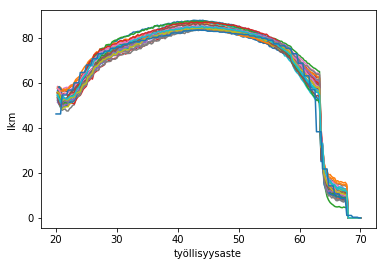

best_emp 20
Vaikutus työllisyyteen keskiarvo 1817427.6 htv, mediaani 1814796.0 htv
                        keskiarvo 1827641.5333333334 työllistä, mediaani 1823379.5 työllistä


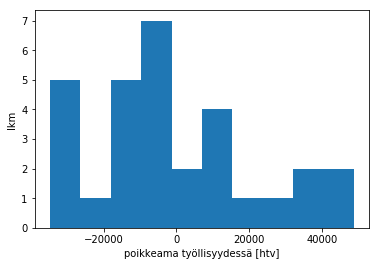

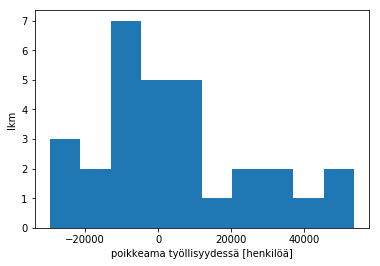

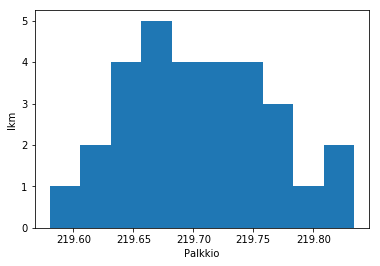

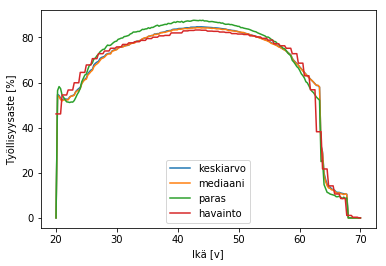

In [5]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=30,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/distrib_base',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

In [ ]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc2.render_distrib(load='results/distrib_base_v',n=30,stats_results='results/distrib_stats')


# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

In [3]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
poistomalli='best/putki/malli_putki'
cc1_putki.run_distrib(n=30,startn=15,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=poistomalli,plot=True,cont=True,start_from=perusmalli,results='results/putki/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)


Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki False
include_pinkslip True

No mortality included
computing 15
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








----------------------------------
| explained_variance | 0.973     |
| fps                | 2642      |
| nupdates           | 1         |
| policy_entropy     | 0.95      |
| policy_loss        | -0.000585 |
| total_timesteps    | 0         |
| value_loss         | 0.333     |
----------------------

---------------------------------
| explained_variance | 0.438    |
| fps                | 2806     |
| nupdates           | 20       |
| policy_entropy     | 0.766    |
| policy_loss        | -11.6    |
| total_timesteps    | 414523   |
| value_loss         | 254      |
---------------------------------
---------------------------------
| explained_variance | 0.582    |
| fps                | 2762     |
| nupdates           | 30       |
| policy_entropy     | 0.776    |
| policy_loss        | -9.31    |
| total_timesteps    | 632693   |
| value_loss         | 154      |
---------------------------------
---------------------------------
| explained_variance | 0.76     |
| fps                | 2752     |
| nupdates           | 40       |
| policy_entropy     | 0.824    |
| policy_loss        | -4.87    |
| total_timesteps    | 850863   |
| value_loss         | 37.8     |
---------------------------------
---------------------------------
| explained_variance | 0.863    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 2706     |
| nupdates           | 290      |
| policy_entropy     | 0.972    |
| policy_loss        | -0.018   |
| total_timesteps    | 6305113  |
| value_loss         | 0.343    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 2710     |
| nupdates           | 300      |
| policy_entropy     | 0.975    |
| policy_loss        | -0.0259  |
| total_timesteps    | 6523283  |
| value_loss         | 0.288    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2713     |
| nupdates           | 310      |
| policy_entropy     | 0.986    |
| policy_loss        | -0.0533  |
| total_timesteps    | 6741453  |
| value_loss         | 0.338    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

computing 16
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.973    |
| fps                | 2648     |
| nupdates           | 1        |
| policy_entropy     | 0.962    |
| policy_loss        | -0.0138  |
| total_timesteps    | 0        |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.754    |
| fps                | 2881     |
| nupdates           | 10       |
| policy_entropy     | 0.673    |
| policy_loss        | 4.9      |
| total_timesteps    | 196353   |
| value_loss         | 54.9     |
---------------------------------
---------------------------------
| explained_variance | 0.898    |
| fps                | 2824     |
| nupdates           | 20       |
| policy_entropy     | 0.631    |
| policy_loss        | -0.547   |
| total_timesteps    | 414523   |
| value_loss         | 2.25     |
---------------------------------

---------------------------------
| explained_variance | 0.977    |
| fps                | 2811     |
| nupdates           | 270      |
| policy_entropy     | 0.947    |
| policy_loss        | -0.00161 |
| total_timesteps    | 5868773  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2811     |
| nupdates           | 280      |
| policy_entropy     | 0.96     |
| policy_loss        | -0.0159  |
| total_timesteps    | 6086943  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 2811     |
| nupdates           | 290      |
| policy_entropy     | 0.952    |
| policy_loss        | -0.0376  |
| total_timesteps    | 6305113  |
| value_loss         | 0.348    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

computing 17
train...
phase 1
batch 9 learning rate 0.125 scaled 0.375
training...
---------------------------------
| explained_variance | 0.976    |
| fps                | 2632     |
| nupdates           | 1        |
| policy_entropy     | 0.938    |
| policy_loss        | -0.0089  |
| total_timesteps    | 0        |
| value_loss         | 0.295    |
---------------------------------
---------------------------------
| explained_variance | 0.523    |
| fps                | 2876     |
| nupdates           | 10       |
| policy_entropy     | 0.376    |
| policy_loss        | 4.34     |
| total_timesteps    | 196353   |
| value_loss         | 165      |
---------------------------------
---------------------------------
| explained_variance | 0.275    |
| fps                | 2836     |
| nupdates           | 20       |
| policy_entropy     | 0.144    |
| policy_loss        | -2.18    |
| total_timesteps    | 414523   |
| value_loss         | 285      |
---------------------------------

---------------------------------
| explained_variance | 0.97     |
| fps                | 2804     |
| nupdates           | 270      |
| policy_entropy     | 0.708    |
| policy_loss        | -0.0455  |
| total_timesteps    | 5868773  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 2802     |
| nupdates           | 280      |
| policy_entropy     | 0.868    |
| policy_loss        | -0.0371  |
| total_timesteps    | 6086943  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2801     |
| nupdates           | 290      |
| policy_entropy     | 0.907    |
| policy_loss        | -0.0122  |
| total_timesteps    | 6305113  |
| value_loss         | 0.335    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

KeyboardInterrupt: 

In [ ]:
cc1_putki_b=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki_b.render_distrib(load='results/putki/distrib_poisto_v')
cc1_putki_b.compare_simstats('results/putki/distrib_poisto_v','results/putki/distrib_poisto_v')                    
